# Import Libraries

First, we will import the libraries necessary to analyze the data.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preperation

In [154]:
df = pd.read_csv("./cause_of_deaths.csv")

Let's take a look at what the data looks like.

In [155]:
df.head()

Country/Territory Code  Year  Meningitis  \
0       Afghanistan  AFG  1990        2159   
1       Afghanistan  AFG  1991        2218   
2       Afghanistan  AFG  1992        2475   
3       Afghanistan  AFG  1993        2812   
4       Afghanistan  AFG  1994        3027   

   Alzheimer's Disease and Other Dementias  Parkinson's Disease  \
0                                     1116                  371   
1                                     1136                  374   
2                                     1162                  378   
3                                     1187                  384   
4                                     1211                  391   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  ...  \
0                      2087       93      1370                    1538  ...   
1                      2153      189      1391                    2001  ...   
2                      2441      239      1514                    2299  ...   
3                      2837      108      1687                    2589  ...   
4                      3081      211      1809                    2849  ...   

   Diabetes Mellitus  Chronic Kidney Disease  Poisonings  \
0               2108                    3709         338   
1               2120                    3724         351   
2               2153                    3776         386   
3               2195                    3862         425   
4               2231                    3932         451   

   Protein-Energy Malnutrition  Road Injuries  Chronic Respiratory Diseases  \
0                         2054           4154                          5945   
1                         2119           4472                          6050   
2                         2404           5106                          6223   
3                         2797           5681                          6445   
4                         3038           6001                          6664   

   Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
0                                        2673                5005   
1                                        2728                5120   
2                                        2830                5335   
3                                        2943                5568   
4                                        3027                5739   

   Fire, Heat, and Hot Substances  Acute Hepatitis  
0                             323             2985  
1                             332             3092  
2                             360             3325  
3                             396             3601  
4                             420             3816  

[5 rows x 34 columns]

When looking into the source data, Kaggle rated its Usability a 10/10, so I'll briefly check for any null values.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [157]:
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

Looks good to go! Let's take a deeper look at the data.

In [158]:
df.describe()

Year    Meningitis  Alzheimer's Disease and Other Dementias  \
count  6120.000000   6120.000000                              6120.000000   
mean   2004.500000   1719.701307                              4864.189379   
std       8.656149   6672.006930                             18220.659072   
min    1990.000000      0.000000                                 0.000000   
25%    1997.000000     15.000000                                90.000000   
50%    2004.500000    109.000000                               666.500000   
75%    2012.000000    847.250000                              2456.250000   
max    2019.000000  98358.000000                            320715.000000   

       Parkinson's Disease  Nutritional Deficiencies        Malaria  \
count          6120.000000               6120.000000    6120.000000   
mean           1173.169118               2253.600000    4140.960131   
std            4616.156238              10483.633601   18427.753137   
min               0.000000                  0.000000       0.000000   
25%              27.000000                  9.000000       0.000000   
50%             164.000000                119.000000       0.000000   
75%             609.250000               1167.250000     393.000000   
max           76990.000000             268223.000000  280604.000000   

            Drowning  Interpersonal Violence  Maternal Disorders  \
count    6120.000000             6120.000000         6120.000000   
mean     1683.333170             2083.797222         1262.589216   
std      8877.018366             6917.006075         6057.973183   
min         0.000000                0.000000            0.000000   
25%        34.000000               40.000000            5.000000   
50%       177.000000              265.000000           54.000000   
75%       698.000000              877.000000          734.000000   
max    153773.000000            69640.000000       107929.000000   

            HIV/AIDS  ...  Diabetes Mellitus  Chronic Kidney Disease  \
count    6120.000000  ...        6120.000000             6120.000000   
mean     5941.898529  ...        5138.704575             4724.132680   
std     21011.962487  ...       16773.081040            16470.429969   
min         0.000000  ...           1.000000                0.000000   
25%        11.000000  ...         236.000000              145.750000   
50%       136.000000  ...        1087.000000              822.000000   
75%      1879.000000  ...        2954.000000             2922.500000   
max    305491.000000  ...      273089.000000           222922.000000   

         Poisonings  Protein-Energy Malnutrition  Road Injuries  \
count   6120.000000                  6120.000000    6120.000000   
mean     425.013399                  1965.994281    5930.795588   
std     2022.640521                  8255.999063   24097.784291   
min        0.000000                     0.000000       0.000000   
25%        6.000000                     5.000000     174.750000   
50%       52.500000                    92.000000     966.500000   
75%      254.000000                  1042.500000    3435.250000   
max    30883.000000                202241.000000  329237.000000   

       Chronic Respiratory Diseases  \
count                  6.120000e+03   
mean                   1.709237e+04   
std                    1.051572e+05   
min                    1.000000e+00   
25%                    2.890000e+02   
50%                    1.689000e+03   
75%                    5.249750e+03   
max                    1.366039e+06   

       Cirrhosis and Other Chronic Liver Diseases  Digestive Diseases  \
count                                 6120.000000         6120.000000   
mean                                  6124.072059        10725.267157   
std                                  20688.118580        37228.051096   
min                                      0.000000            0.000000   
25%                                    154.000000          284.000000   
50%                     

In [159]:
df.shape

(6120, 34)

6120 rows and 34 columns.

In [160]:
df.size

208080

In [161]:
df['Year'].nunique()

30

A 30 year timespan that spans from 1990 - 2019

In [162]:
df['Country/Territory'].nunique()

204

Now that we have an idea of the data, let's clean it up a little.



# Data Analysis



Let's see the columns again.

In [163]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

Let's shorten some of the column names to make the visualization labels readable.

In [164]:
df.columns = ['Country/Territory', 'Code', 'Year', 'Meningitis',
              'Dementias', "Parkinson's Disease",
              'Nutritional Deficiencies', 'Malaria', 'Drowning',
              'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
              'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
              'Lower Respiratory Infections', 'Neonatal Disorders',
              'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
              'Diarrheal Diseases', 'Environmental Heat & Cold Exposure',
              'Neoplasms', 'Conflict & Terrorism', 'Diabetes Mellitus',
              'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
              'Road Injuries', 'Chronic Respiratory Diseases',
              'Chronic Liver Diseases', 'Digestive Diseases',
              'Fire, Heat, & Hot Substances', 'Acute Hepatitis']

df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis', 'Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat & Cold Exposure', 'Neoplasms',
       'Conflict & Terrorism', 'Diabetes Mellitus', 'Chronic Kidney Disease',
       'Poisonings', 'Protein-Energy Malnutrition', 'Road Injuries',
       'Chronic Respiratory Diseases', 'Chronic Liver Diseases',
       'Digestive Diseases', 'Fire, Heat, & Hot Substances',
       'Acute Hepatitis'],
      dtype='object')

In [165]:
df['Country/Territory'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'G

In [166]:
df['Country/Territory'].replace(to_replace = 'Democratic Republic of Congo', value = 'Congo', inplace=True)
df['Country/Territory'].replace(to_replace = 'Saint Vincent and the Grenadines', value = 'St. Vincent & the Grenadines', inplace=True)

# Data Analysis

The top 5 countries for each cause of death.

In [167]:
causes_of_death = ['Meningitis', 'Dementias', "Parkinson's Disease", 
                   'Nutritional Deficiencies', 'Malaria', 'Drowning',
                   'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
                   'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
                   'Lower Respiratory Infections', 'Neonatal Disorders',
                   'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
                   'Diarrheal Diseases', 'Environmental Heat & Cold Exposure', 'Neoplasms',
                   'Conflict & Terrorism', 'Diabetes Mellitus', 'Chronic Kidney Disease',
                   'Poisonings', 'Protein-Energy Malnutrition', 'Road Injuries',
                   'Chronic Respiratory Diseases', 'Chronic Liver Diseases',
                   'Digestive Diseases', 'Fire, Heat, & Hot Substances',
                   'Acute Hepatitis'
                  ]

# sort alphabetically to make finding specific cause easier
causes_of_death.sort()

<ipython-input-168-abf0be27a867>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


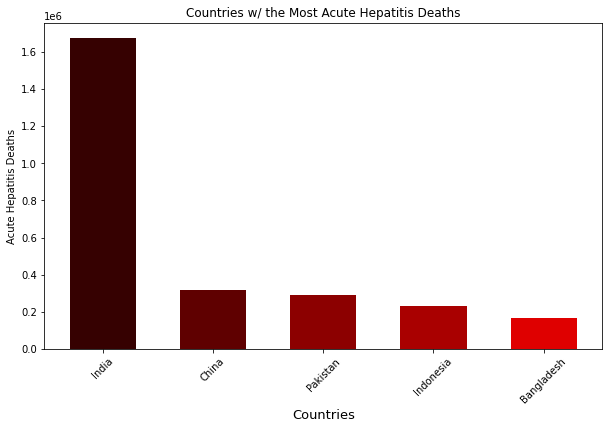

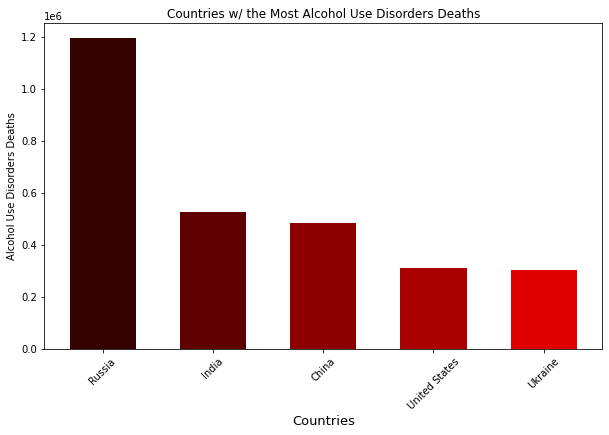

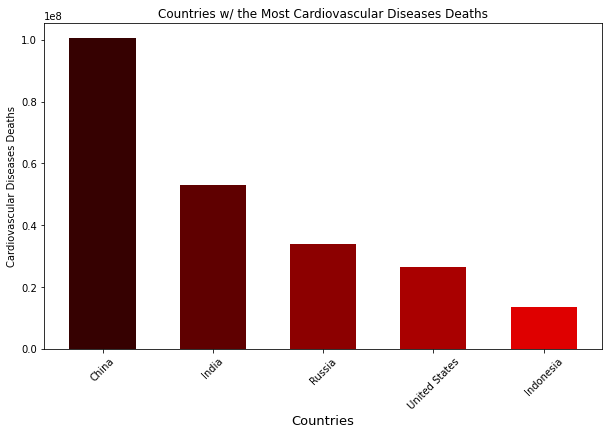

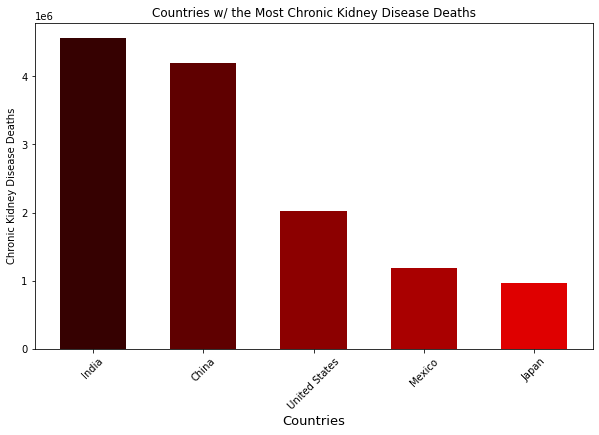

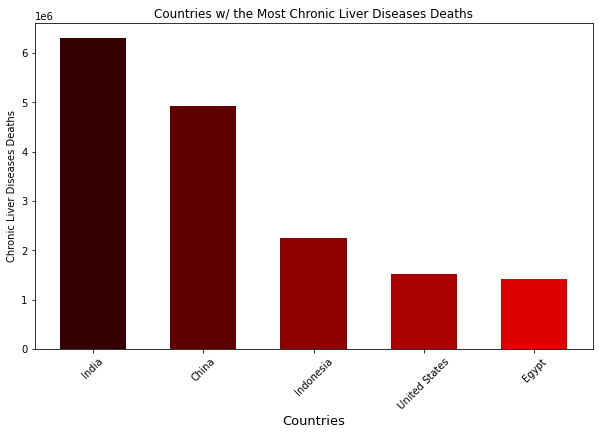

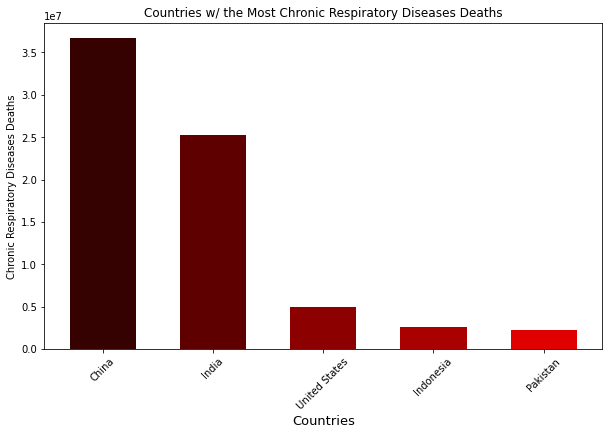

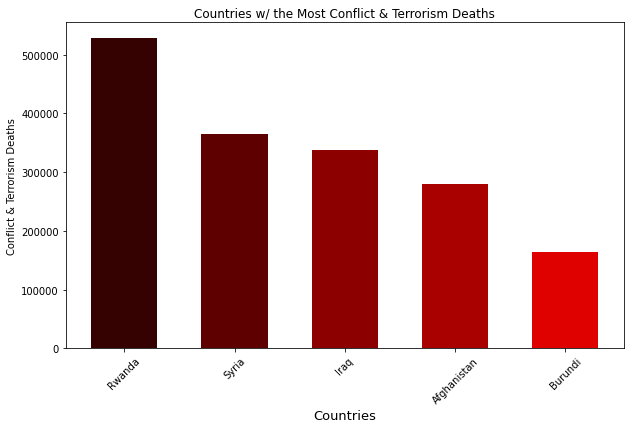

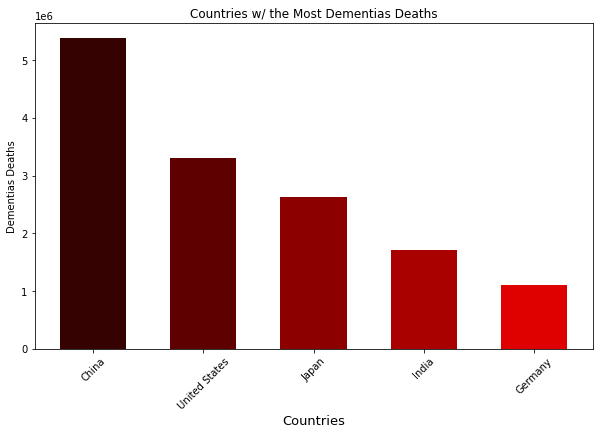

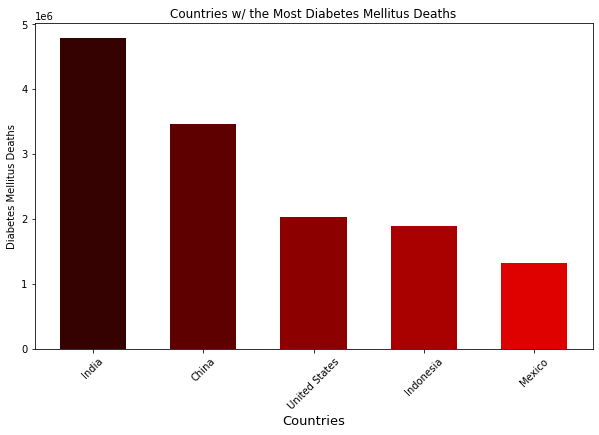

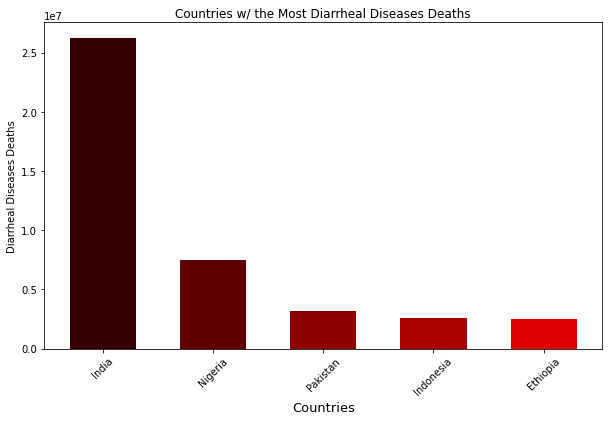

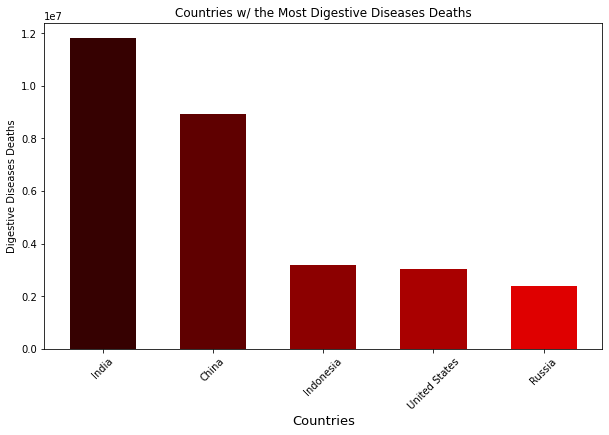

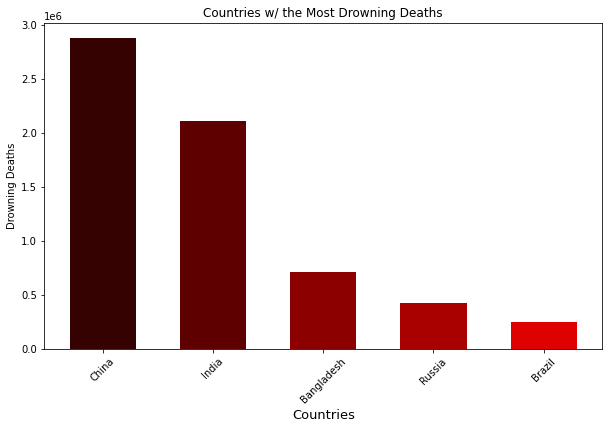

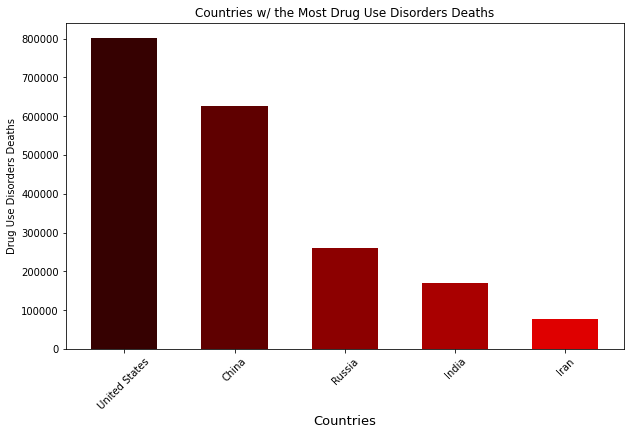

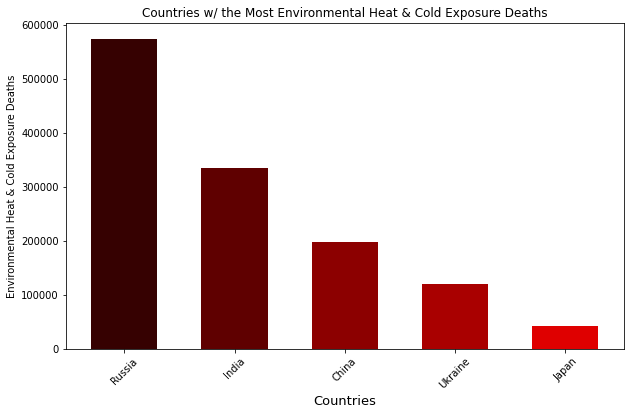

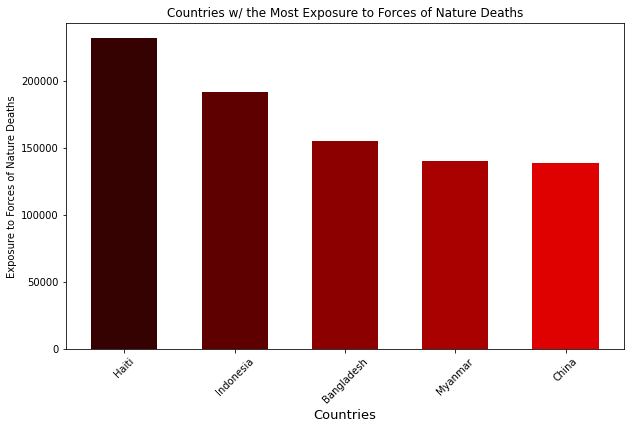

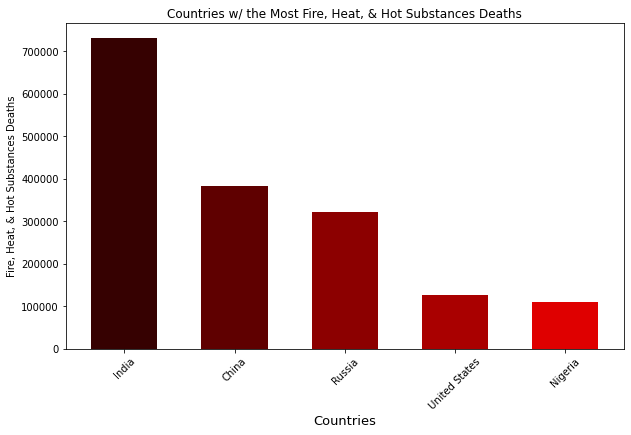

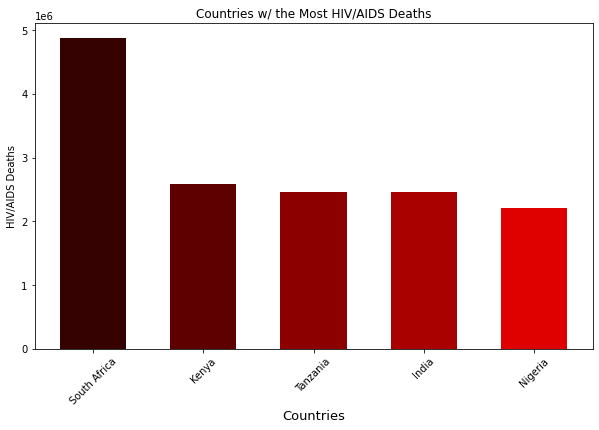

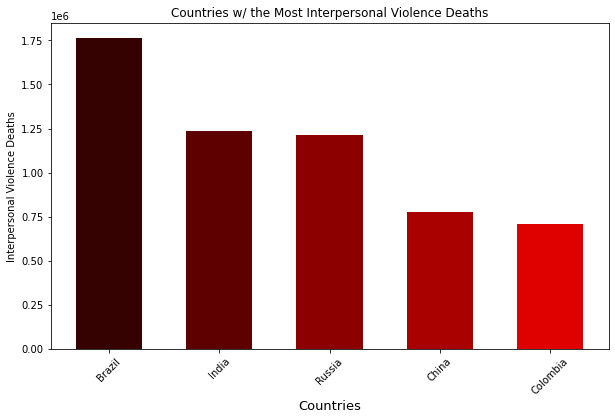

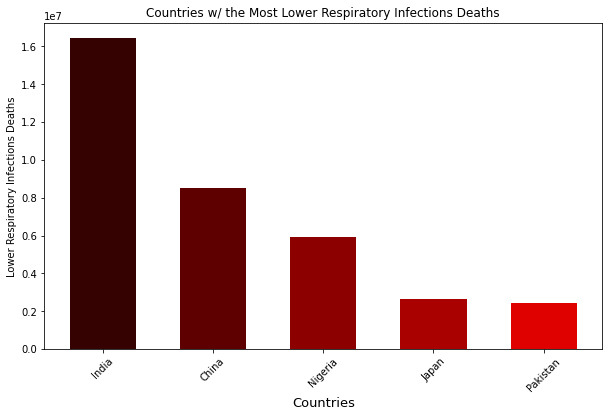

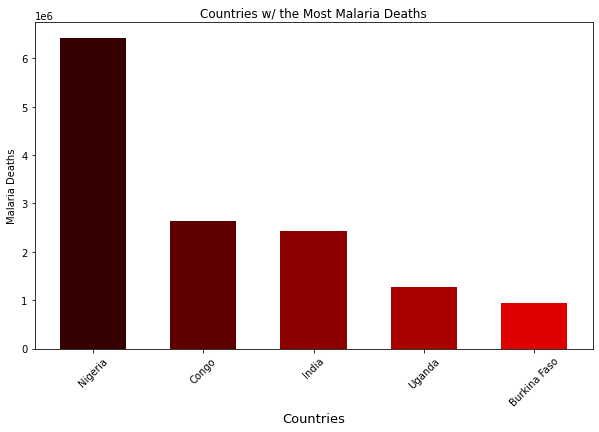

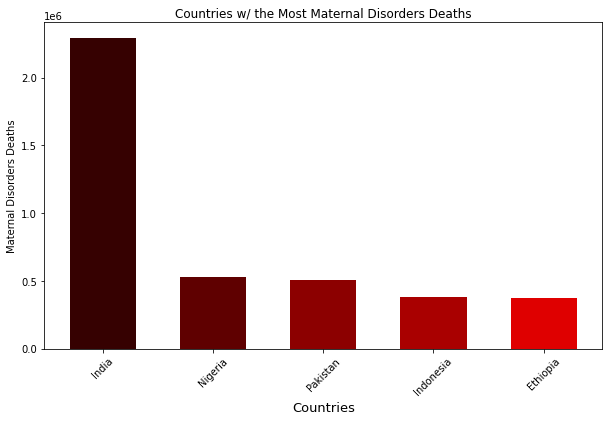

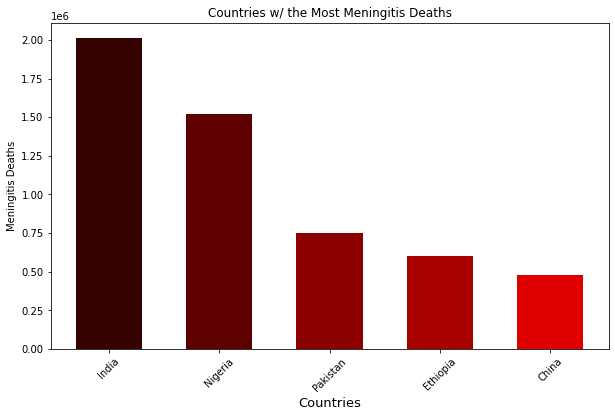

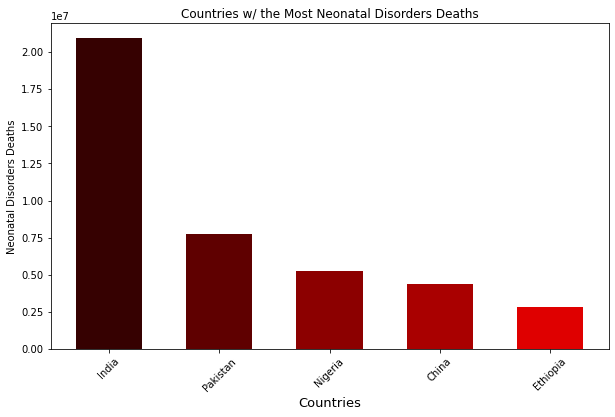

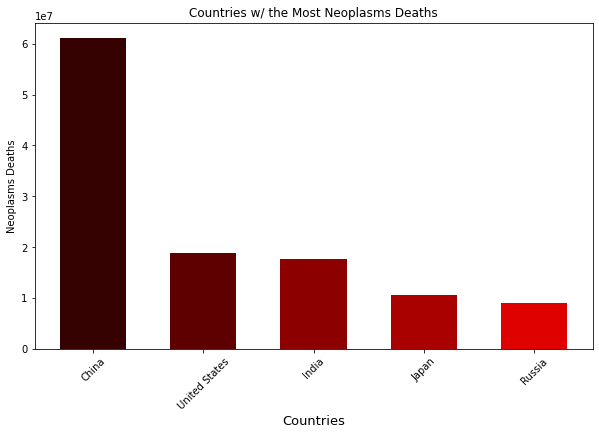

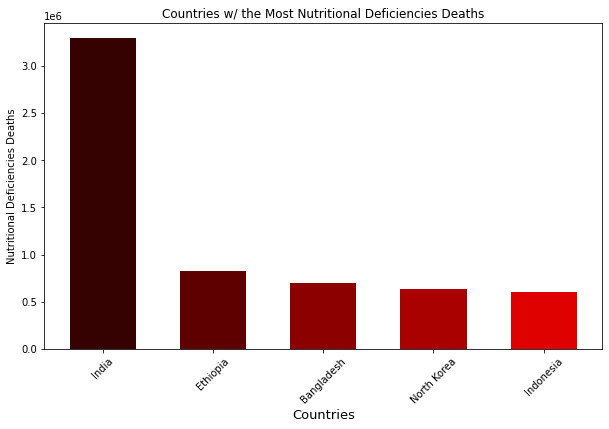

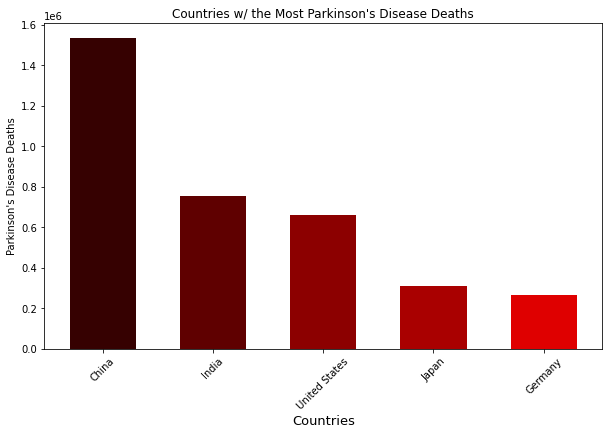

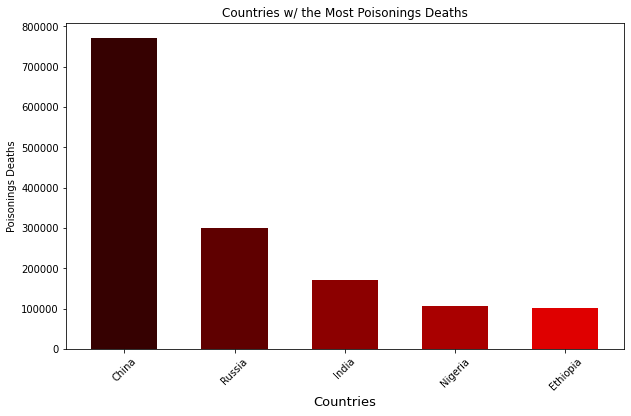

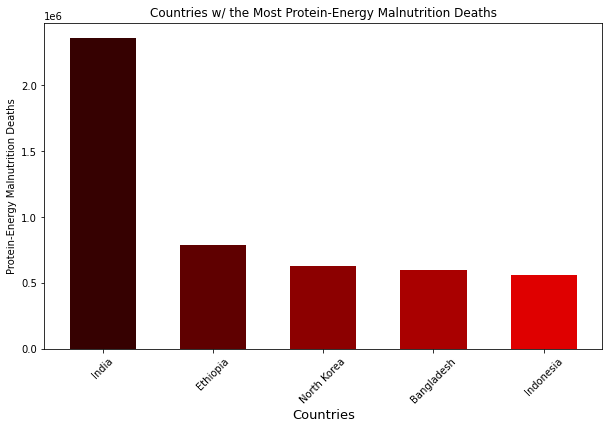

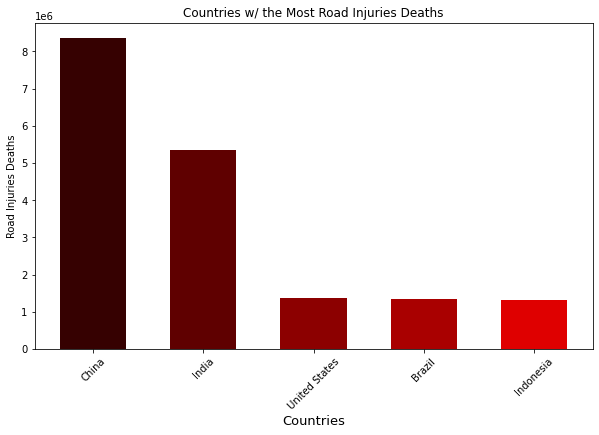

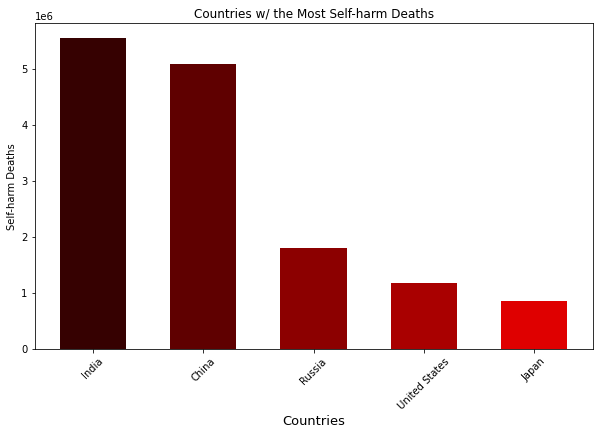

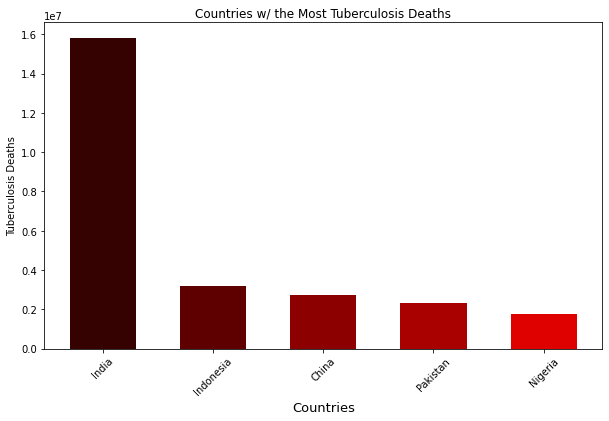

In [168]:
# Steps through each cause of death in each country/territory and sums up each country's deaths
for cause in causes_of_death:
    # Retrieves the top 5 countries/territories with the highest overall deaths spanning all years
    data = df.groupby(['Country/Territory'])[cause].sum().sort_values(ascending=False)[:5]

    # configurations for the bar graphs
    plt.figure(figsize=(10, 6))
    plt.bar(data = data, x = data.index, height = data.values, width=.6, color = ['#360101','#5f0000','#8c0000','#a90000','#df0000'])
    plt.xticks(rotation = 45)
    plt.xlabel('Countries', size= 13)
    plt.ylabel(cause +' Deaths')
    plt.title('Countries w/ the Most ' + cause +' Deaths')

In [182]:
# drop the year column so we can aggregate the deaths from each cause
df2 = df.drop(labels='Year', axis=1).groupby(by='Country/Territory').sum().reset_index()

Here, we'll show **each** country's top 5 causes of death

<ipython-input-183-9b509efd02ff>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6))


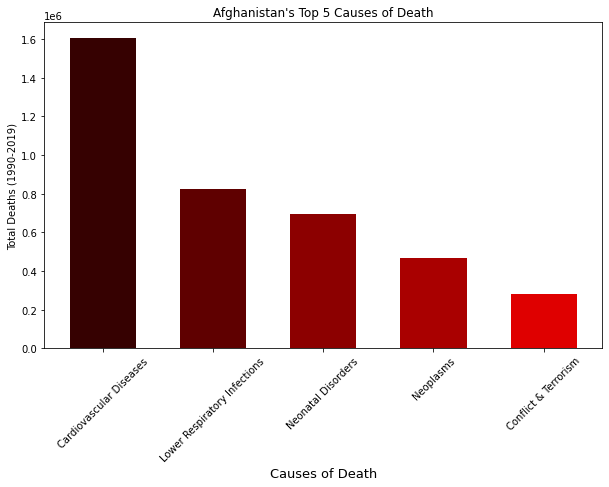

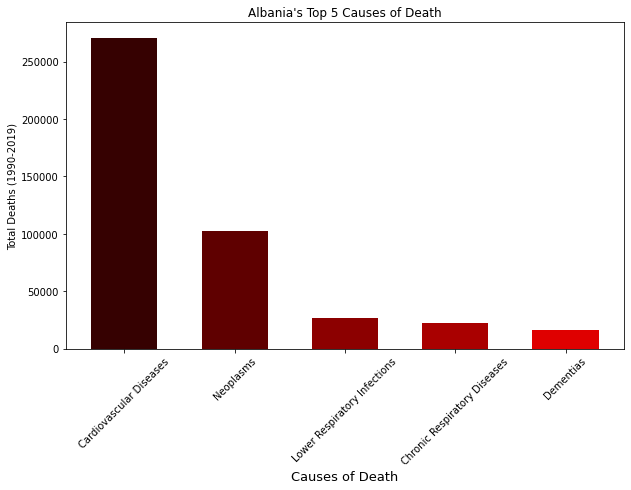

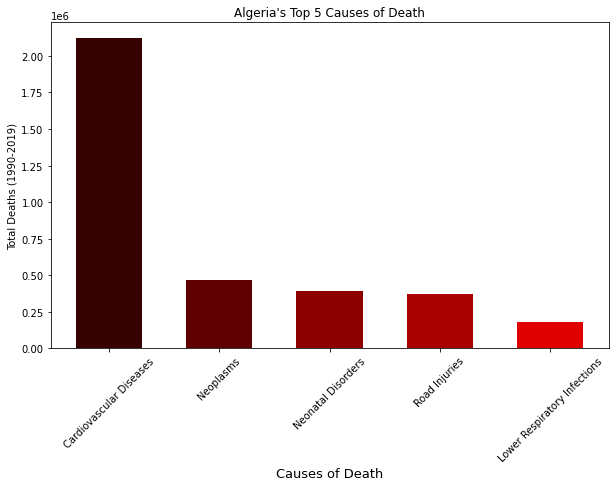

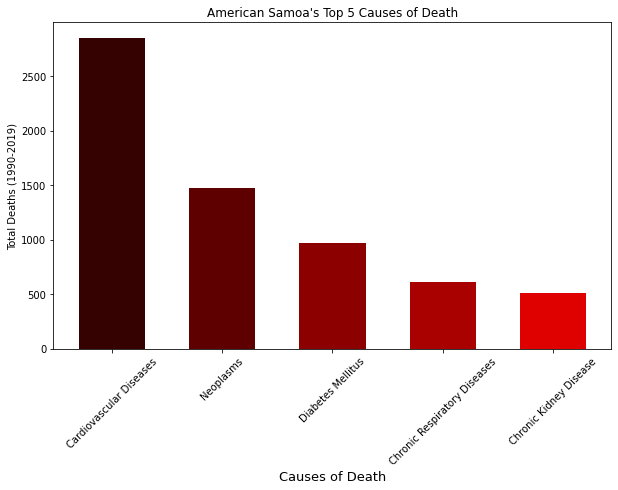

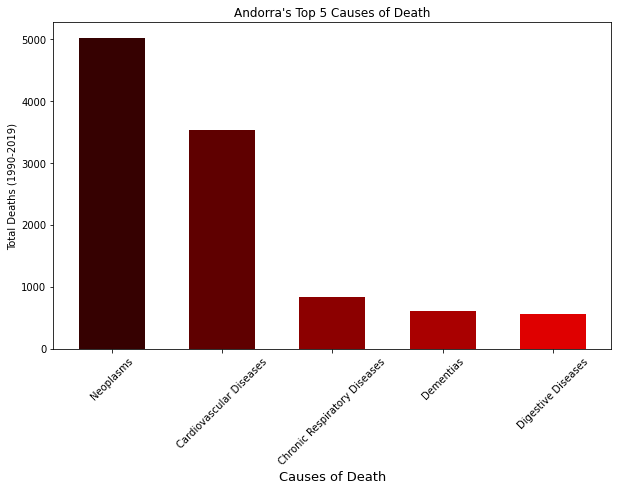

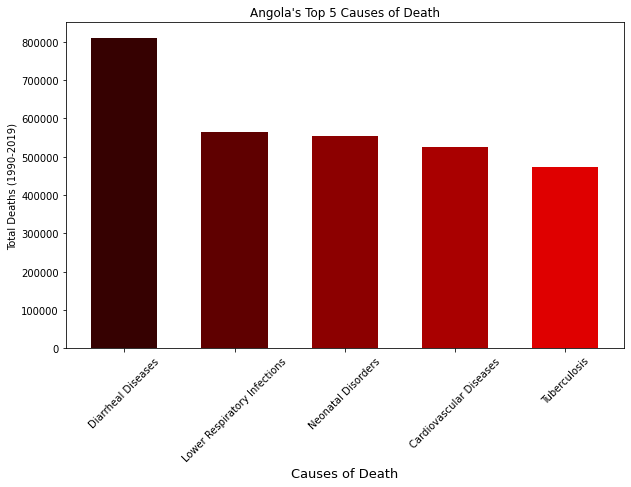

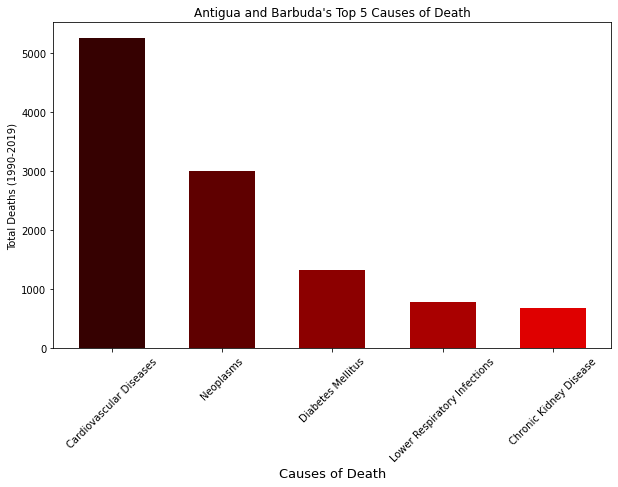

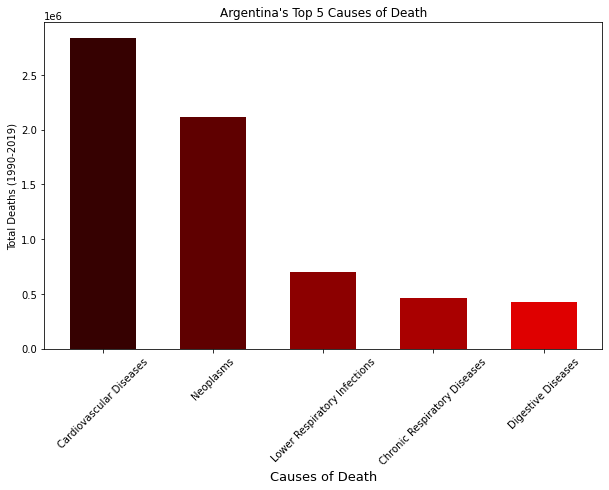

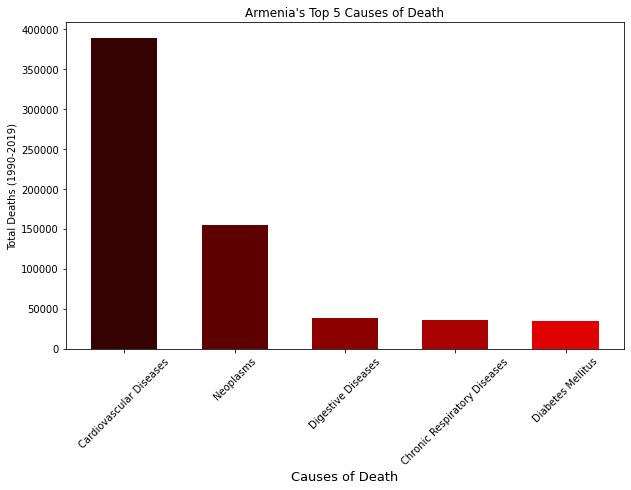

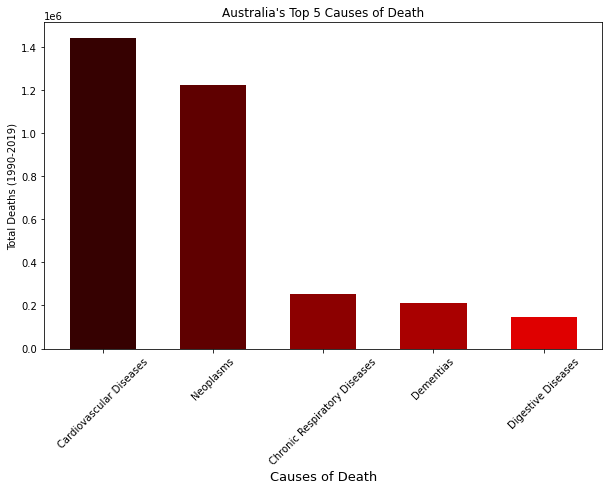

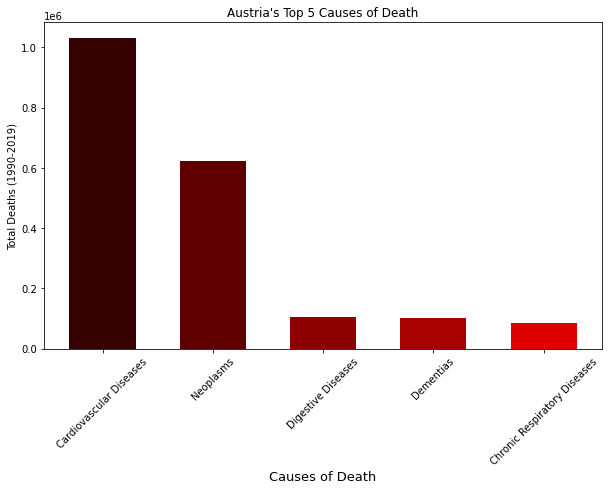

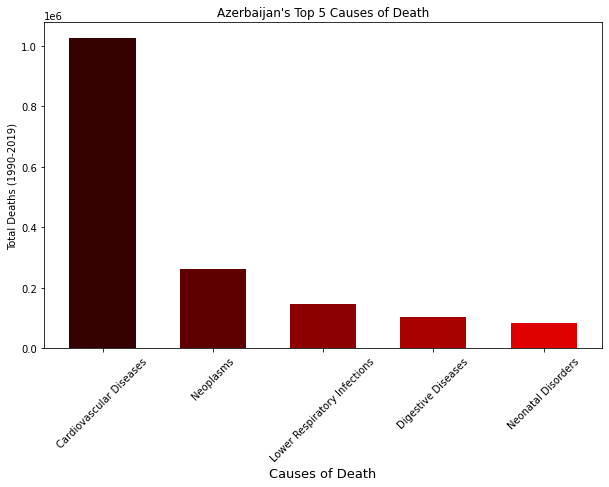

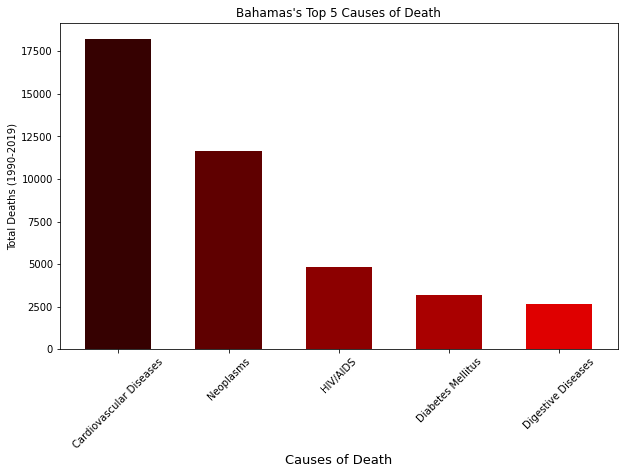

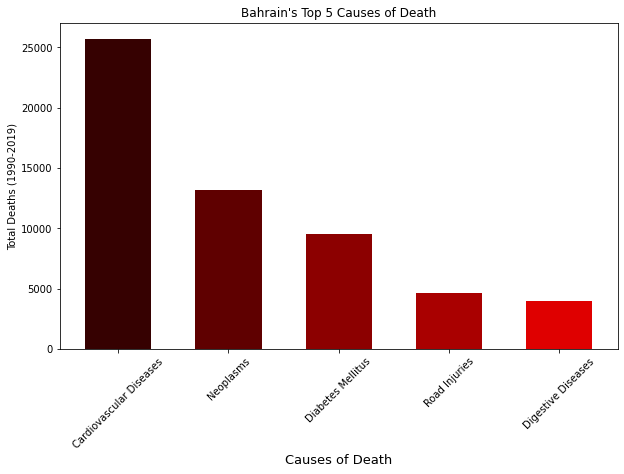

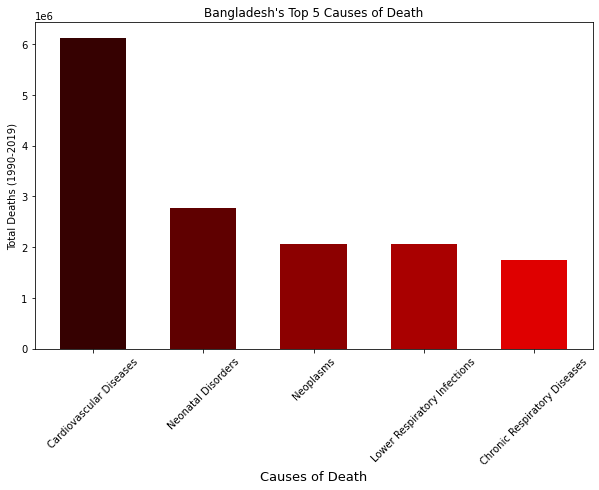

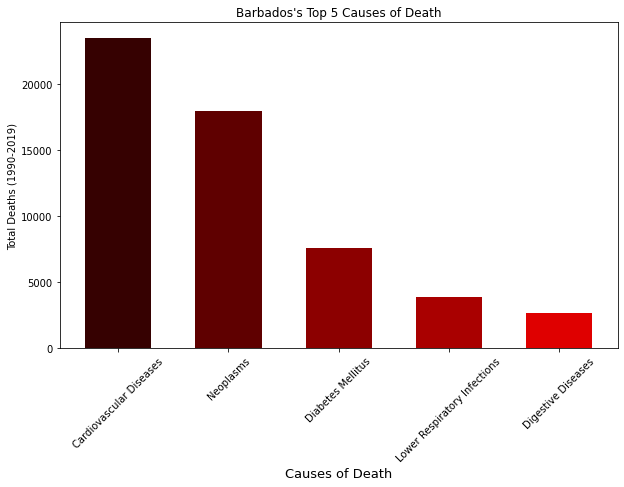

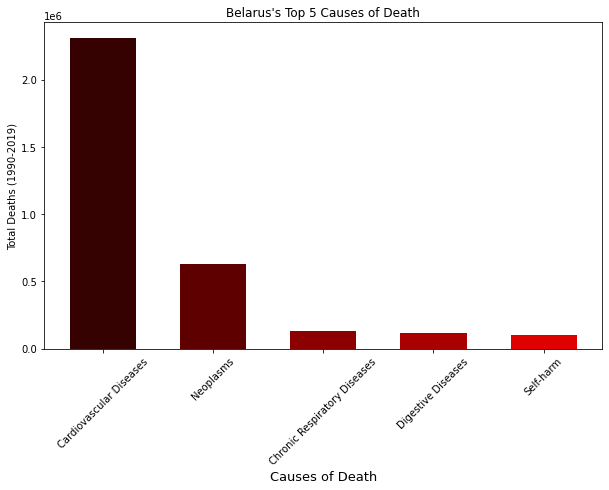

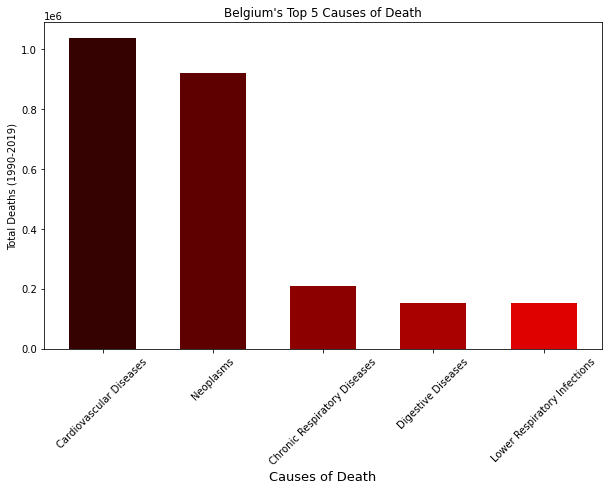

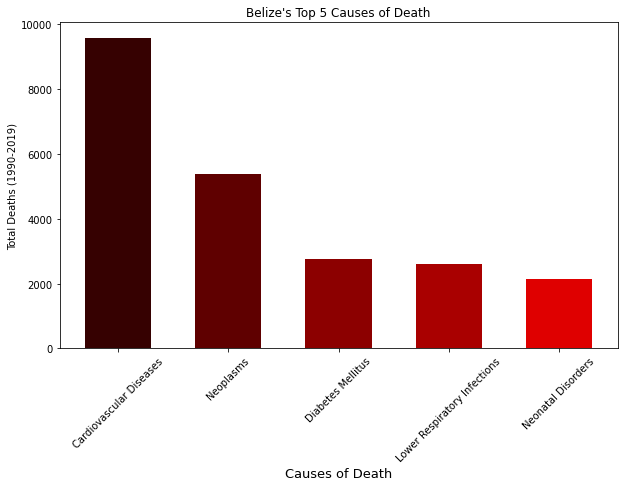

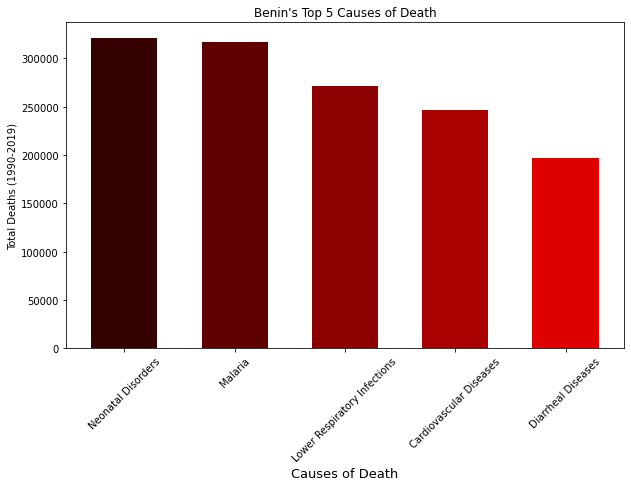

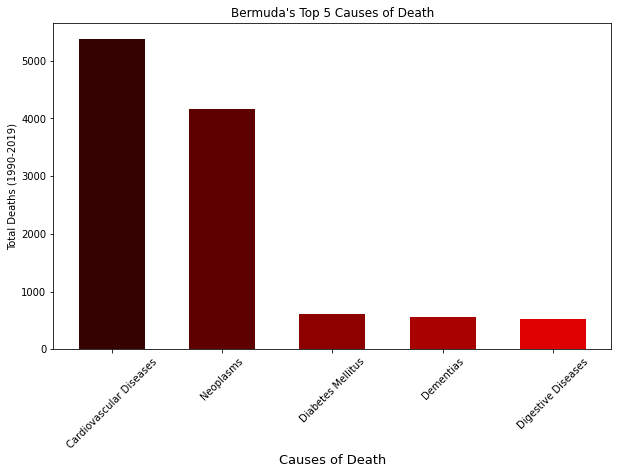

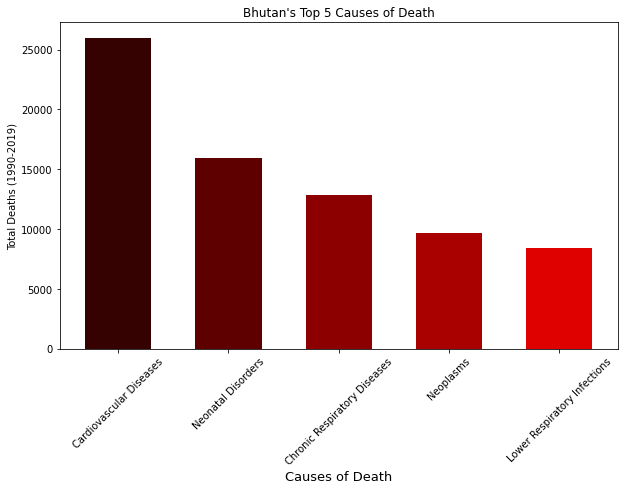

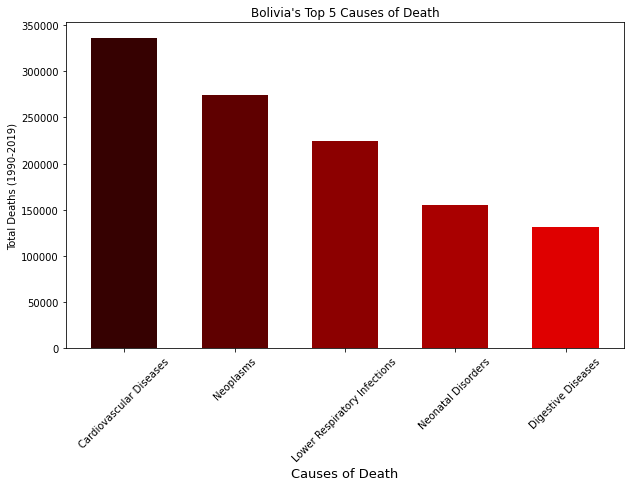

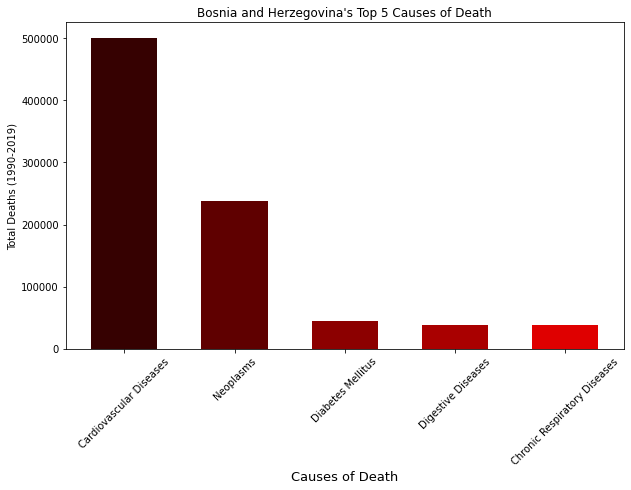

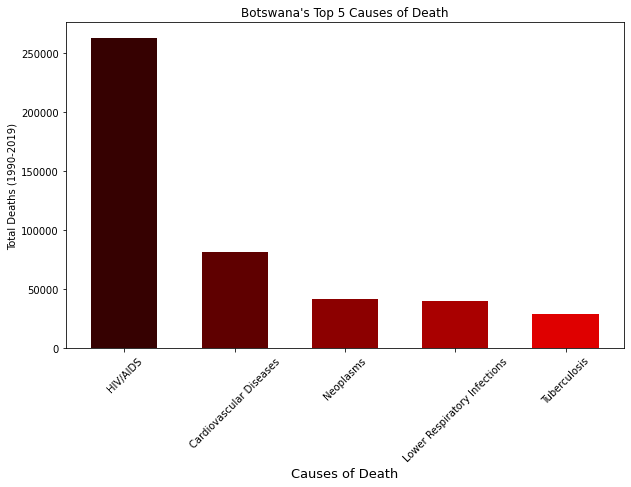

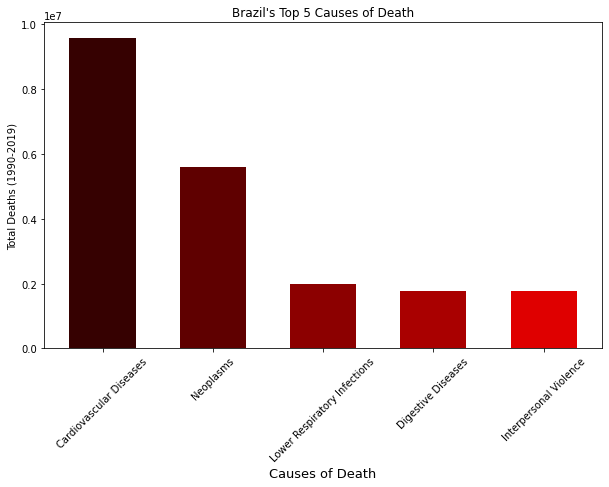

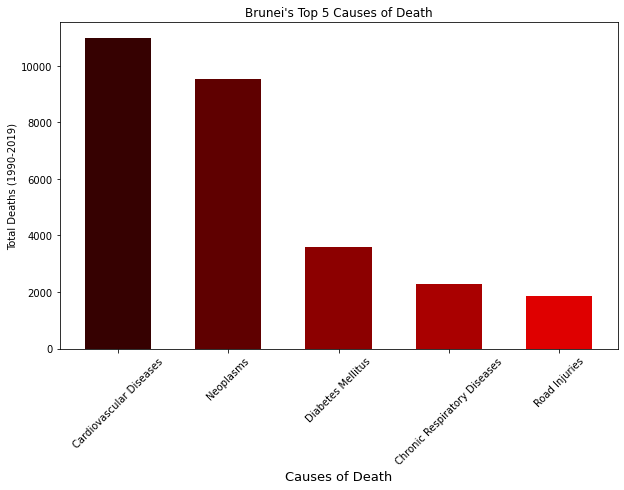

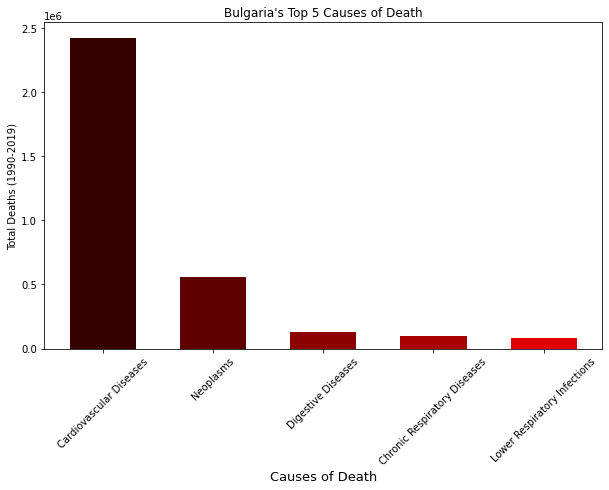

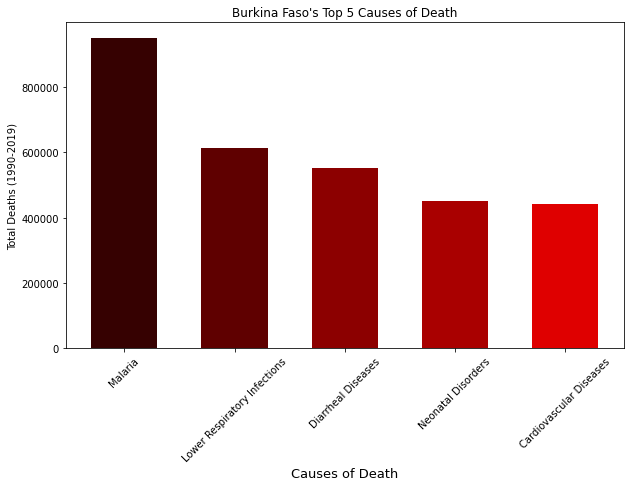

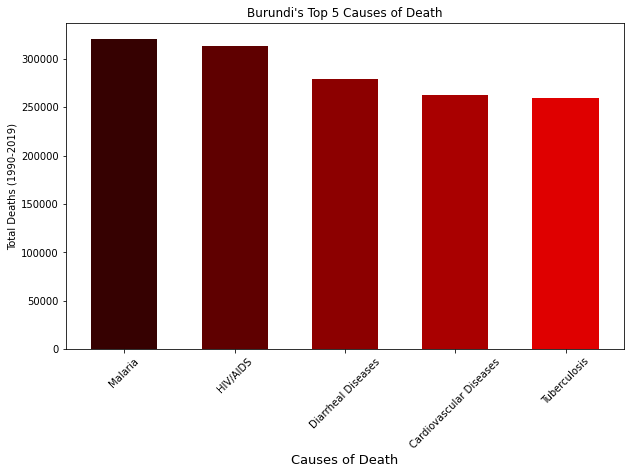

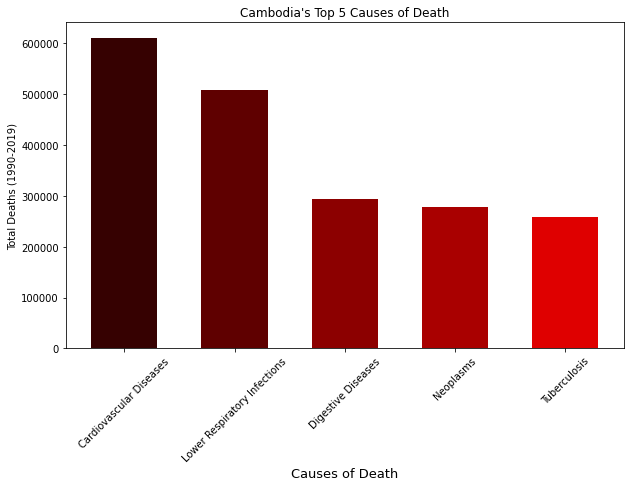

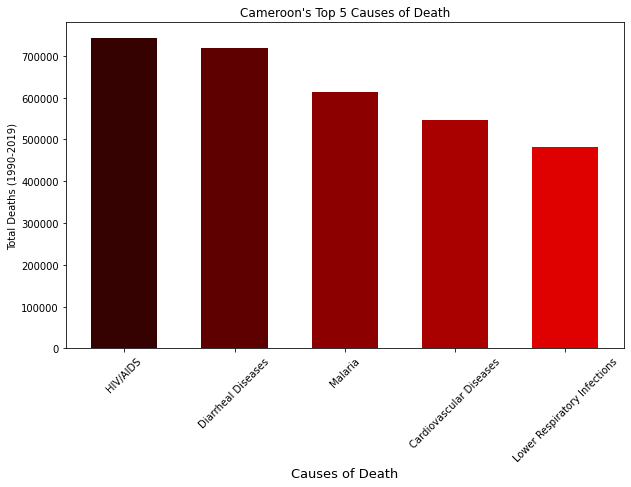

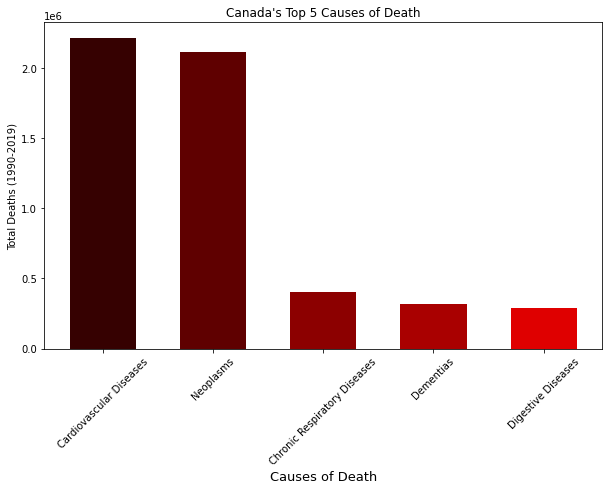

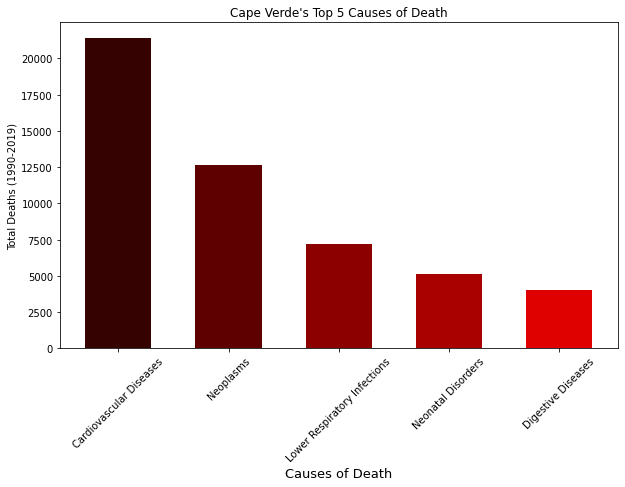

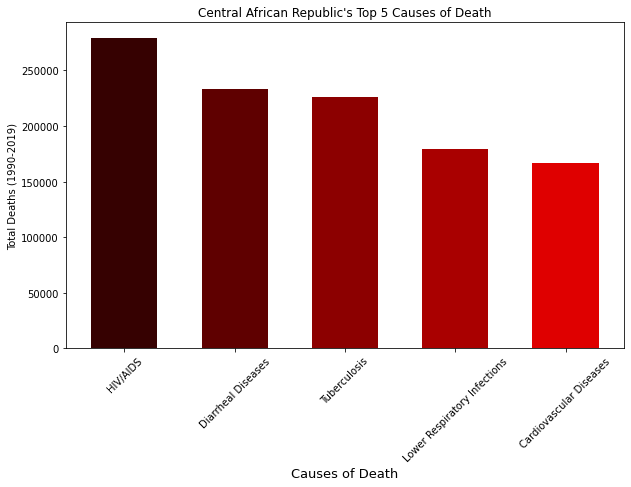

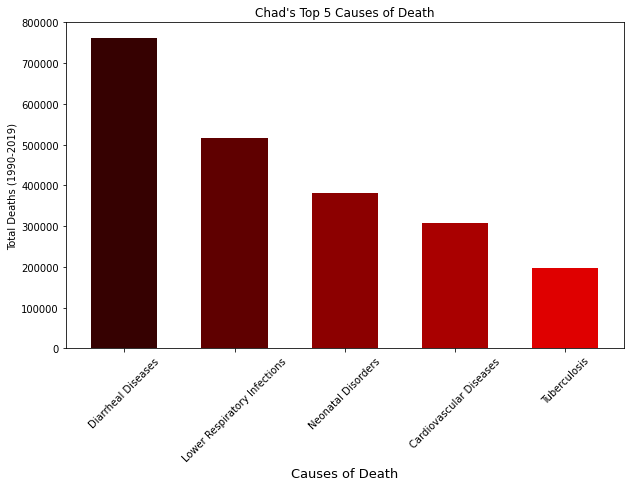

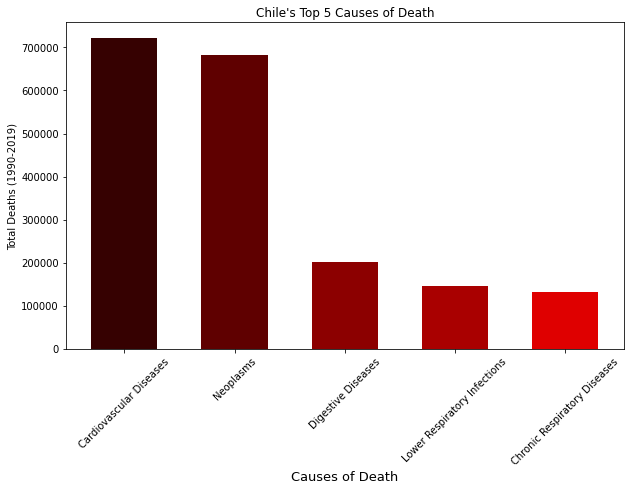

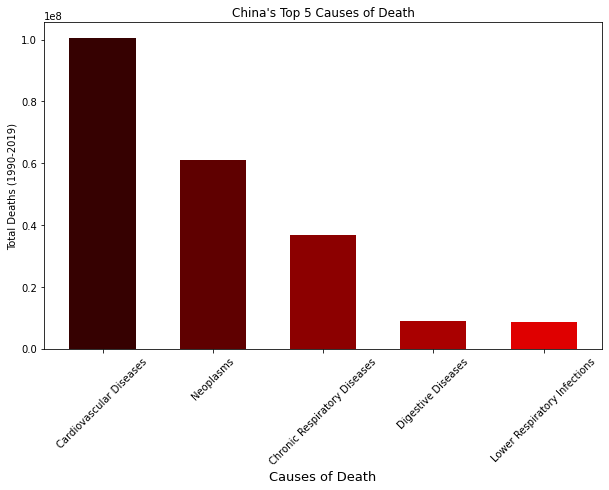

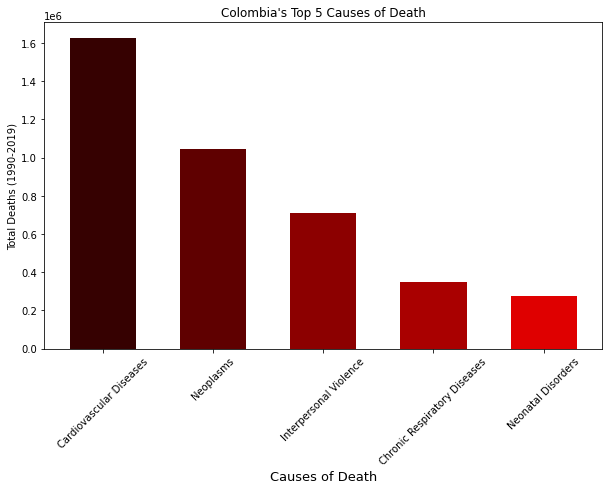

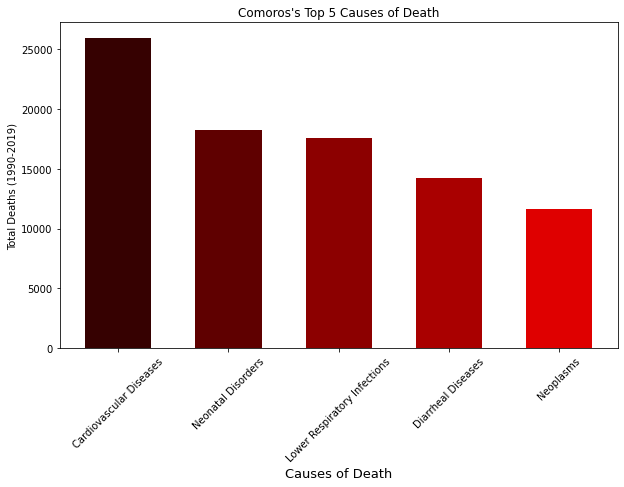

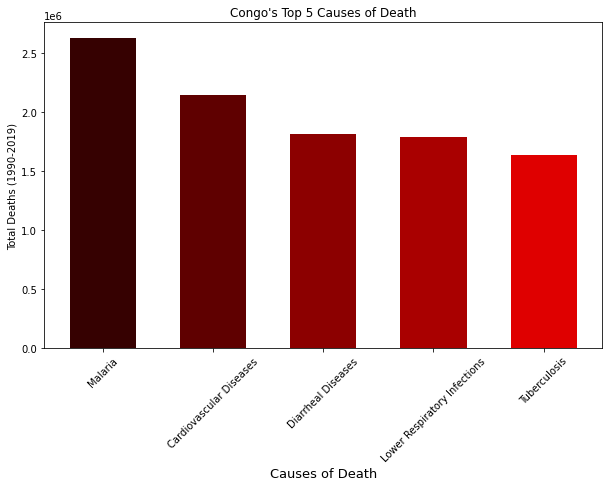

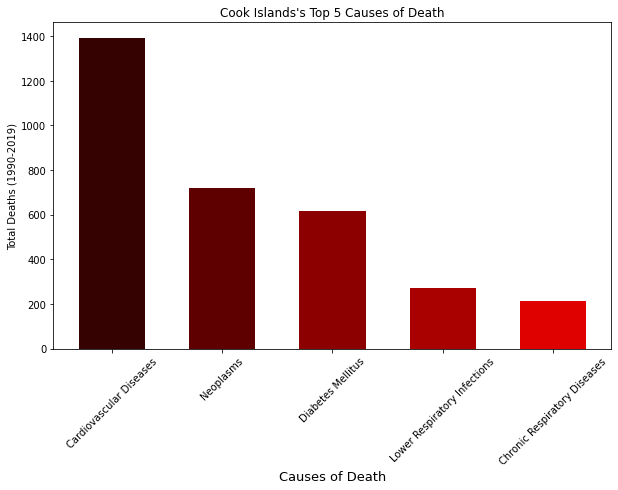

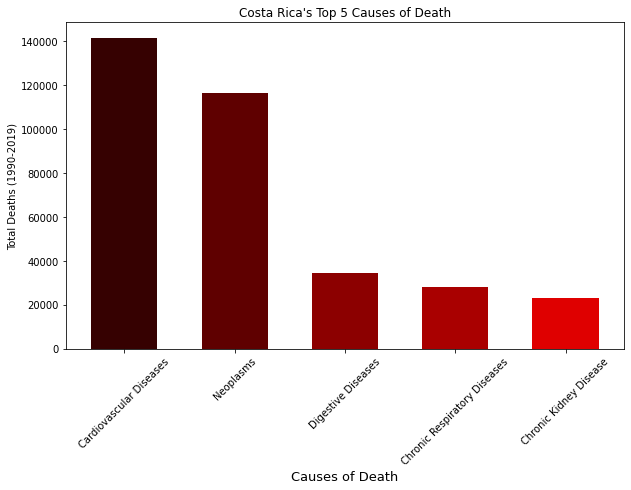

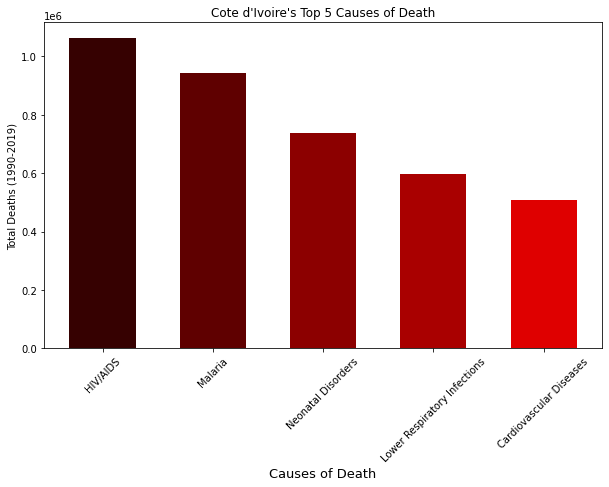

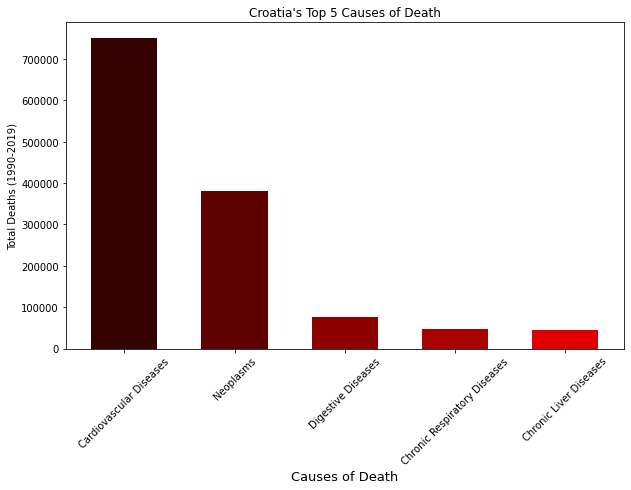

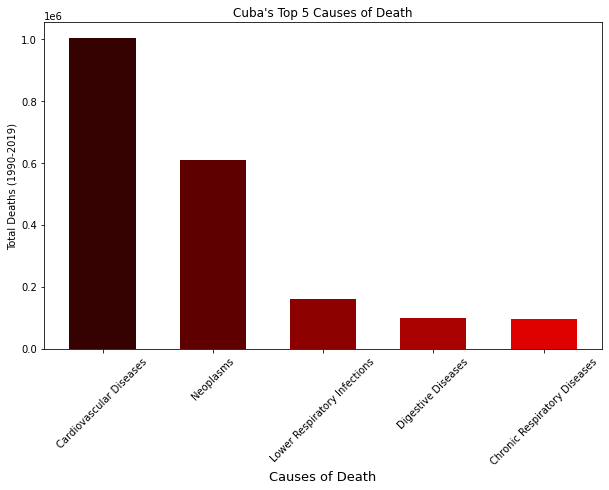

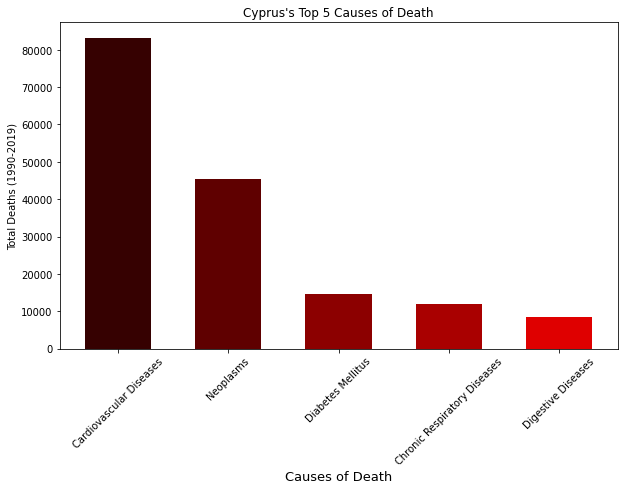

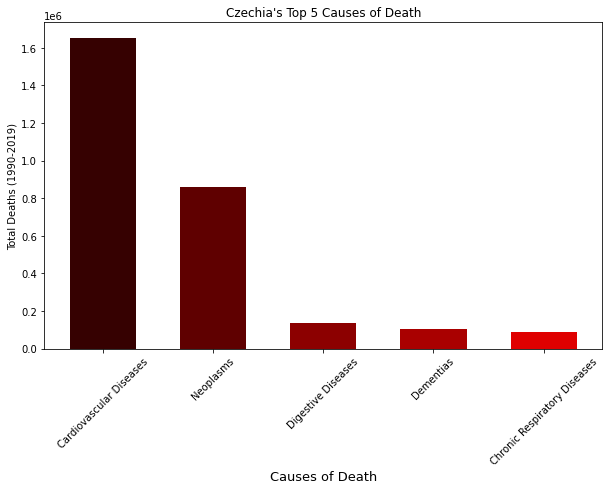

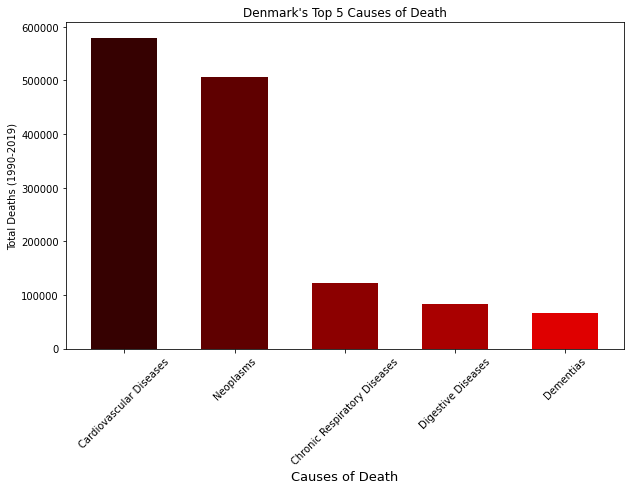

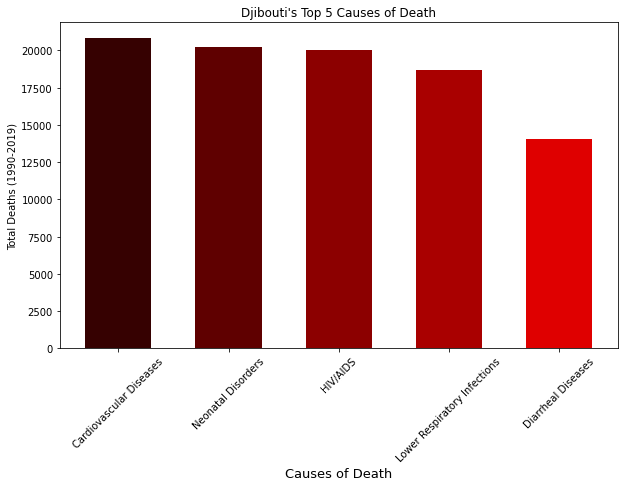

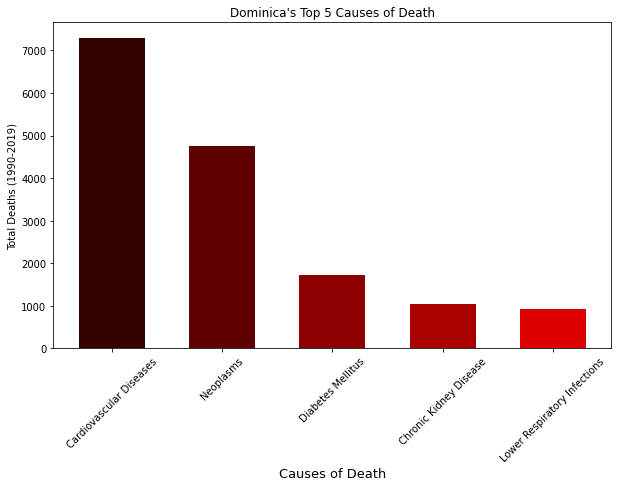

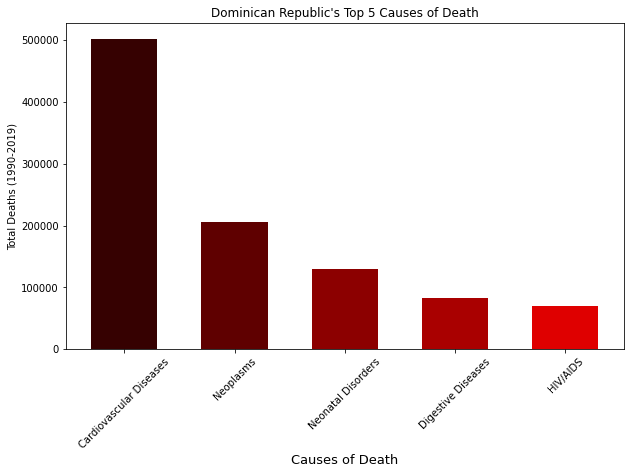

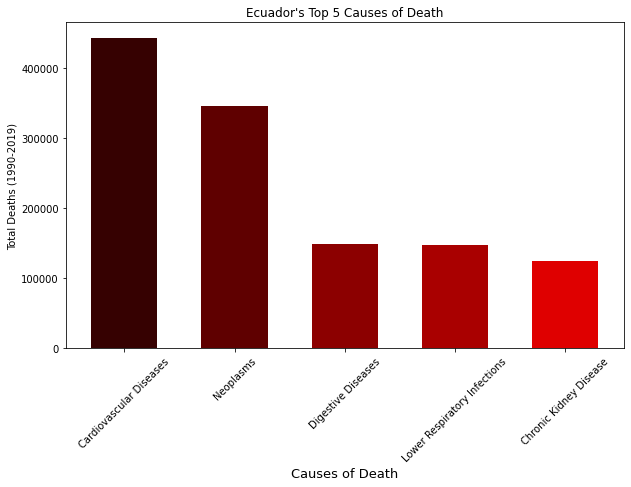

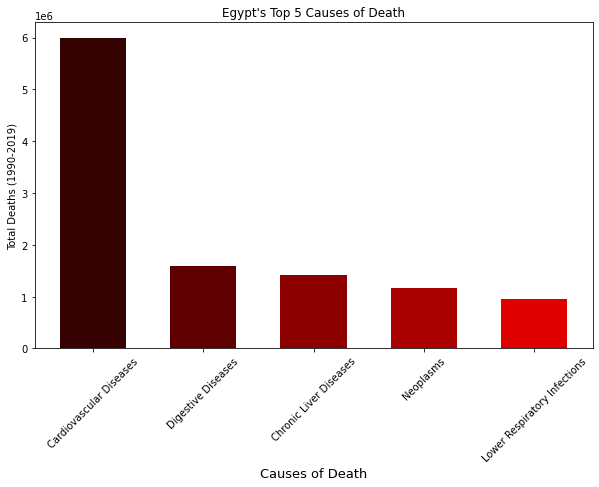

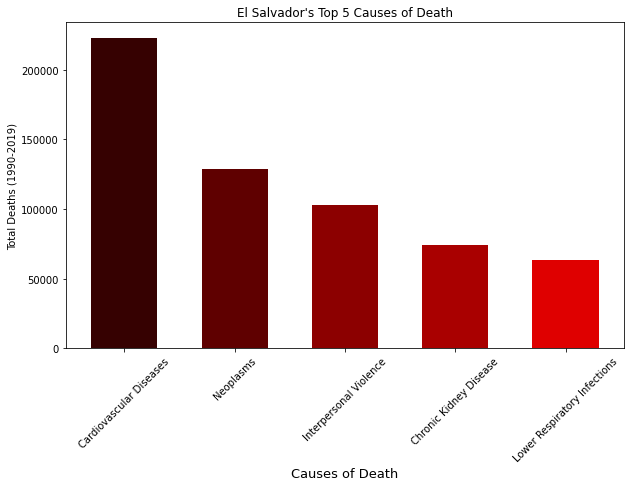

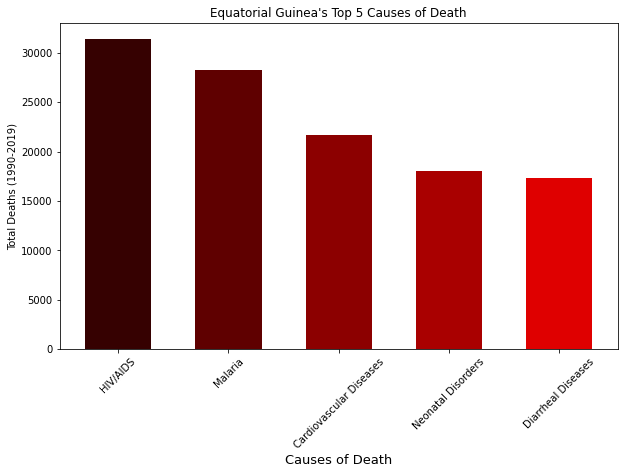

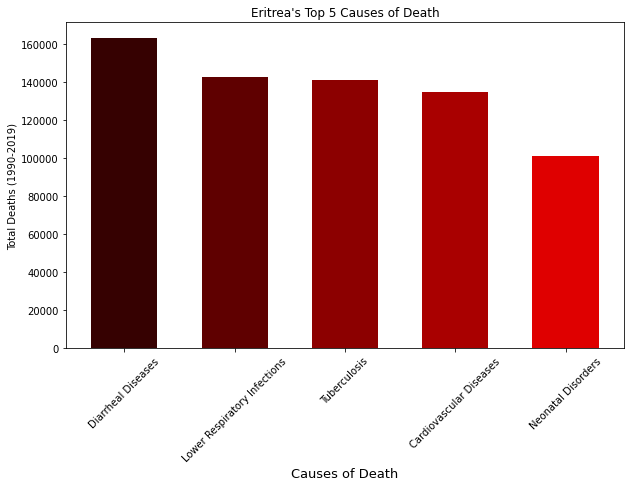

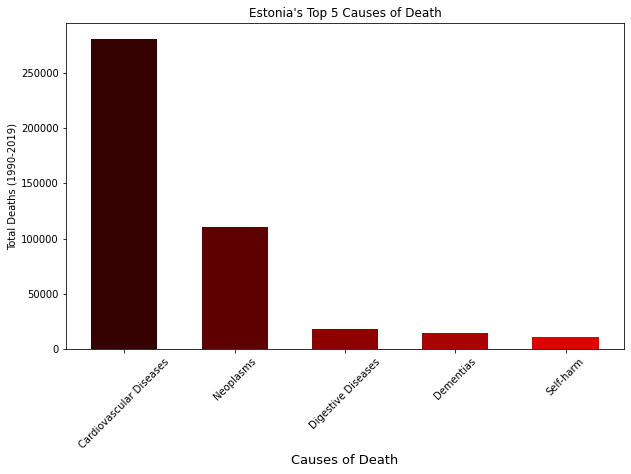

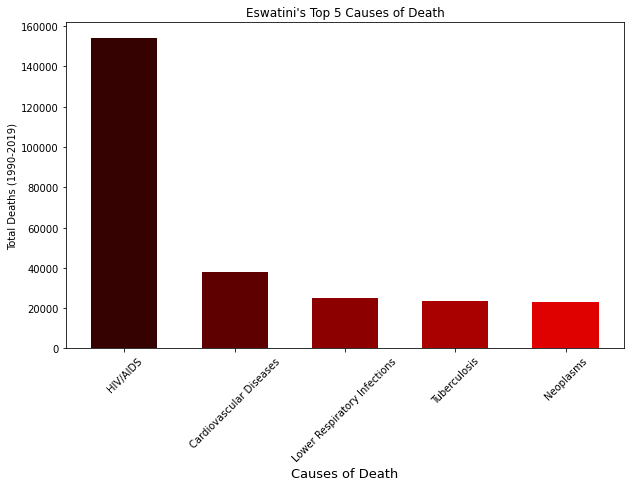

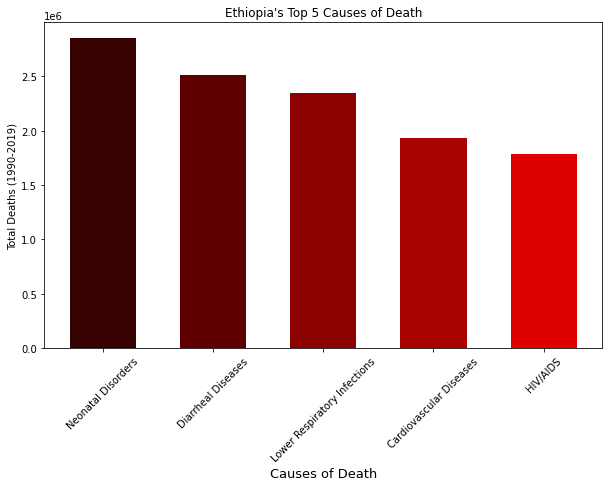

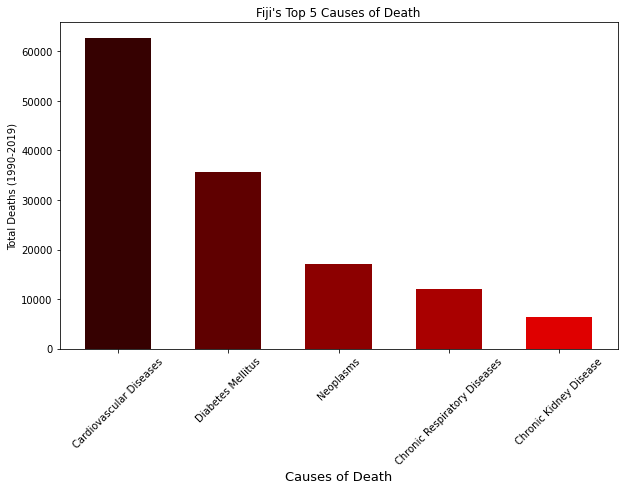

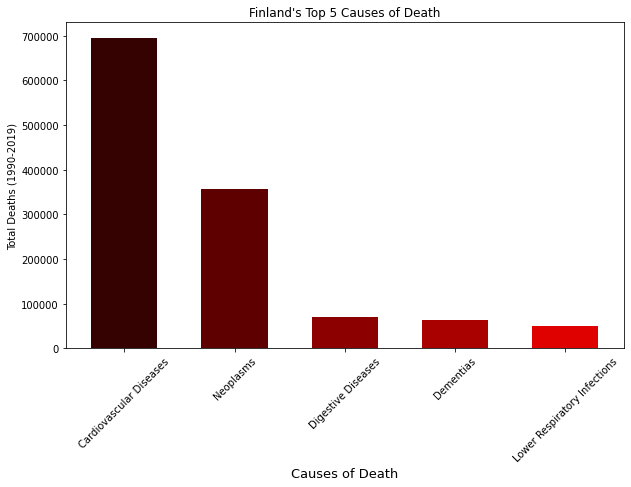

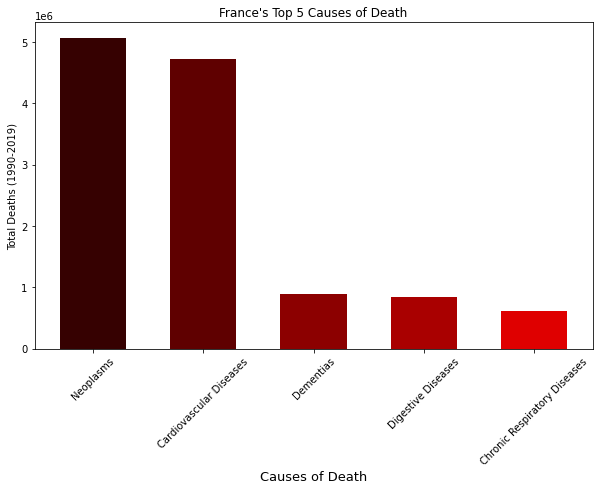

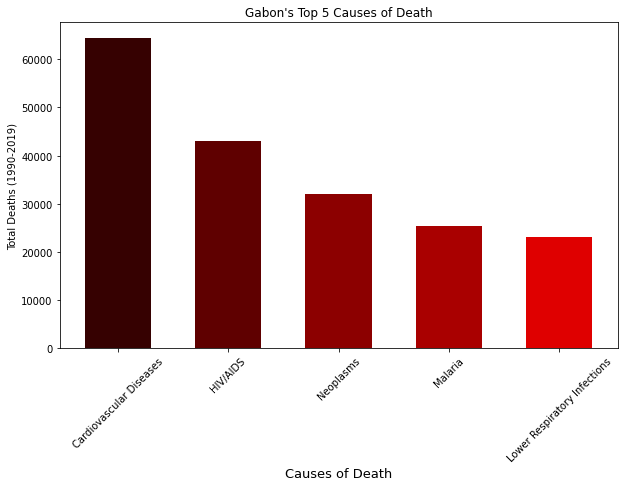

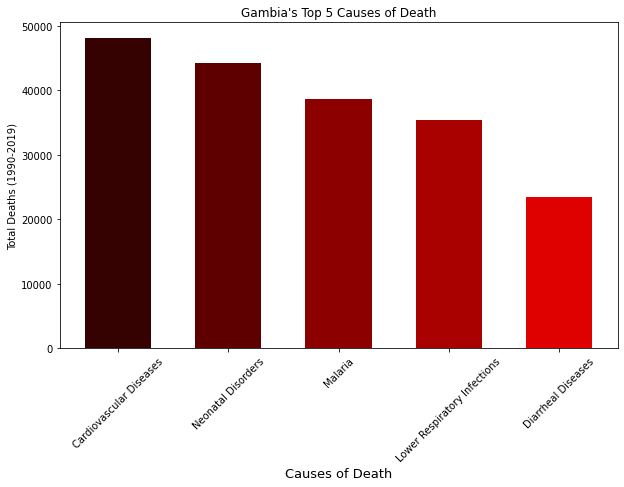

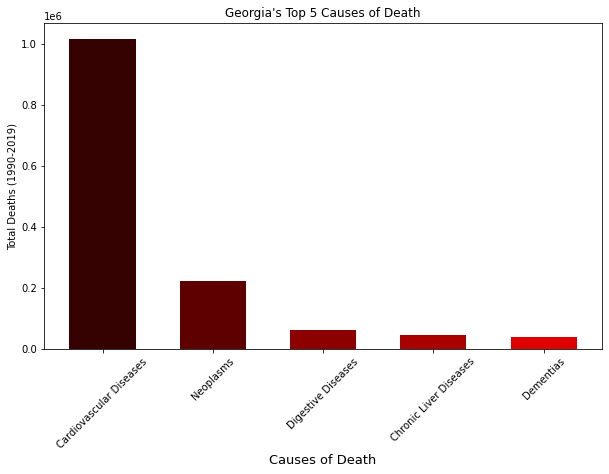

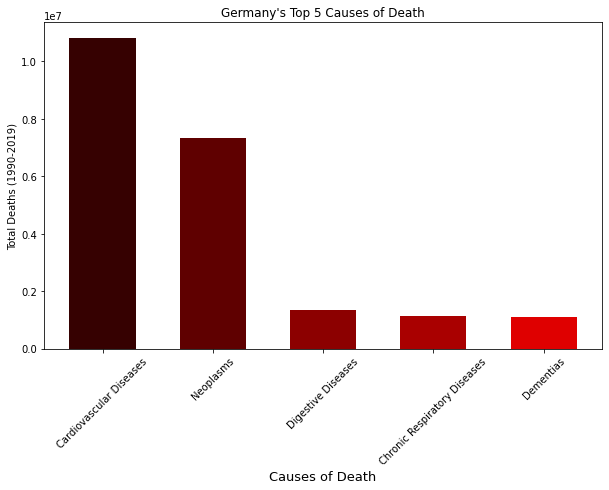

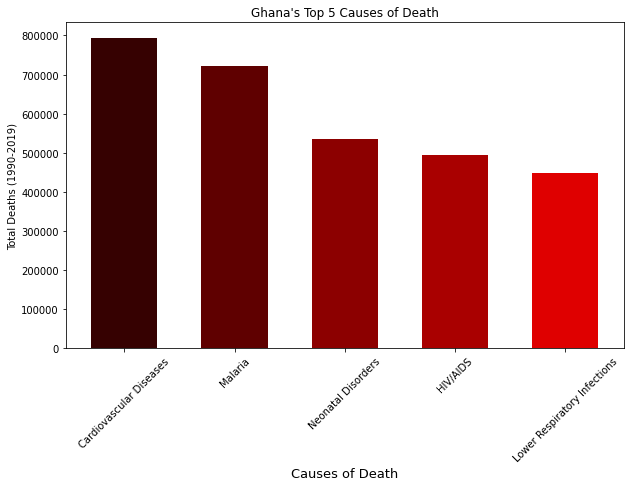

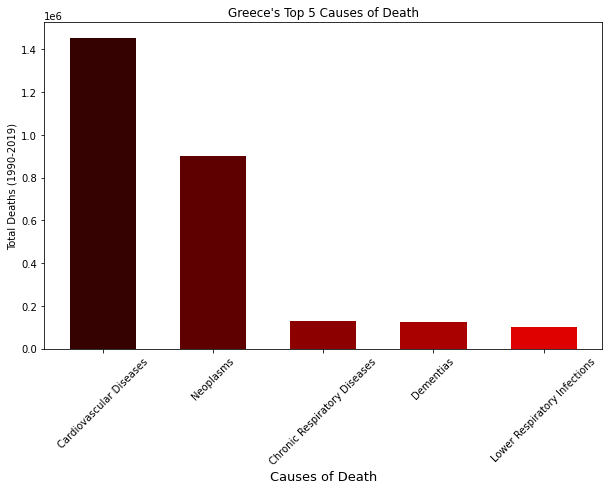

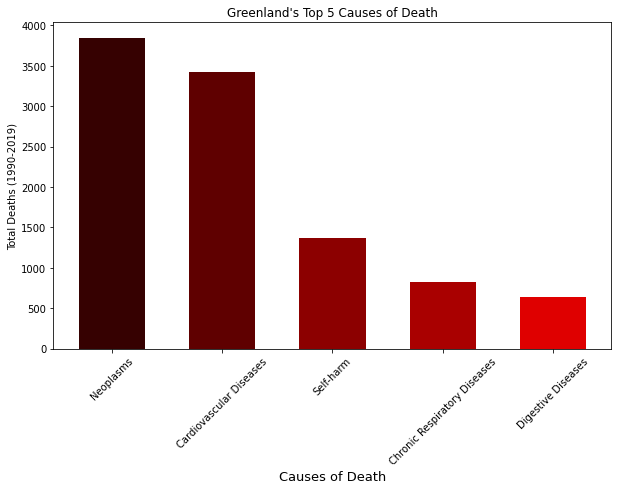

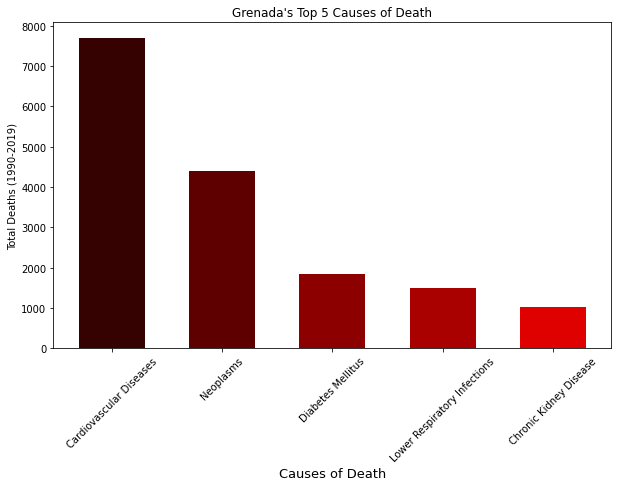

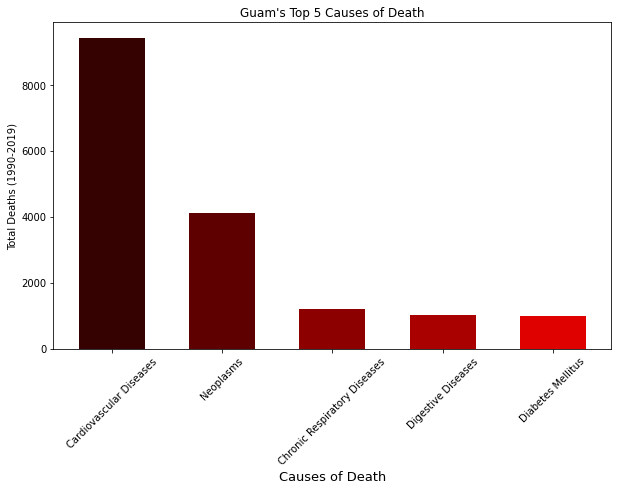

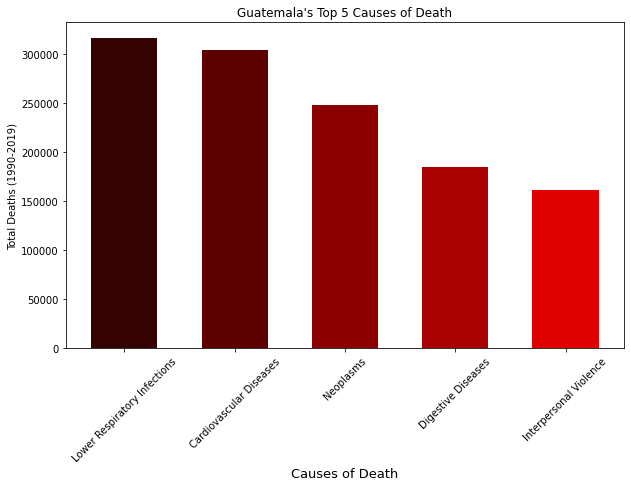

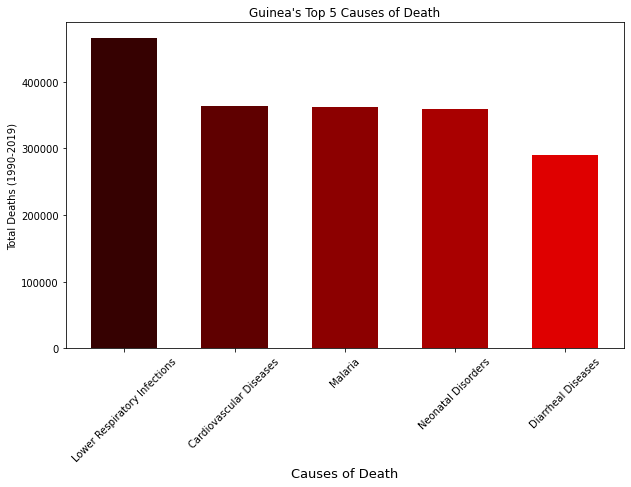

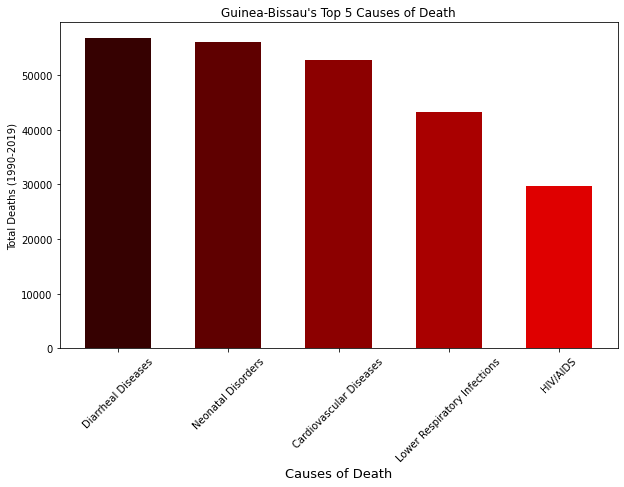

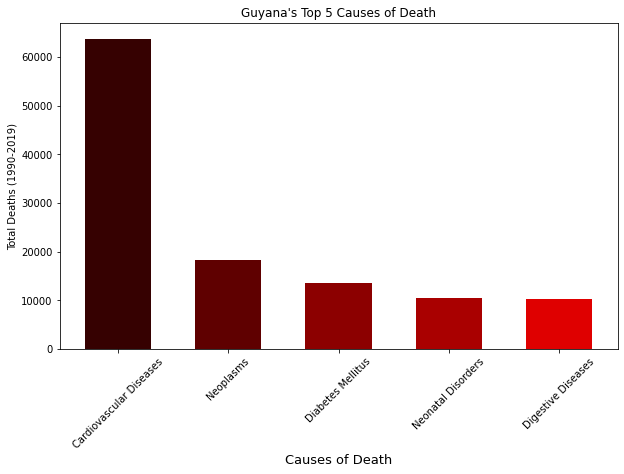

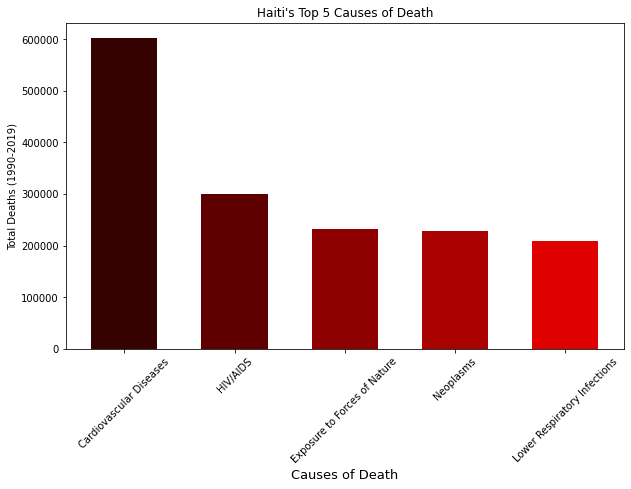

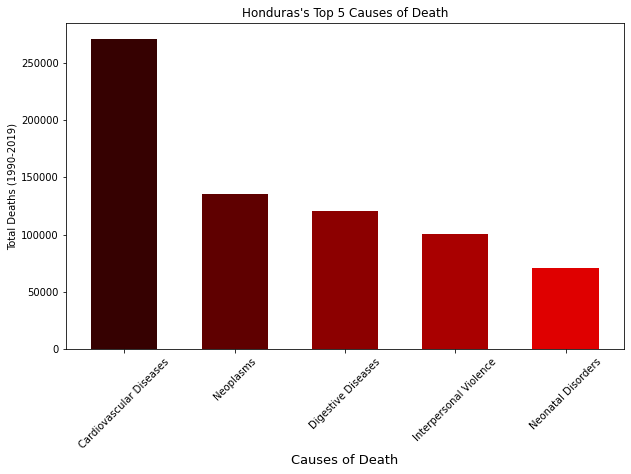

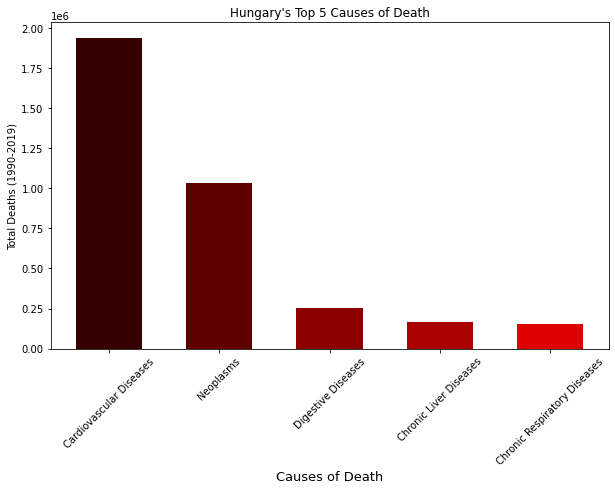

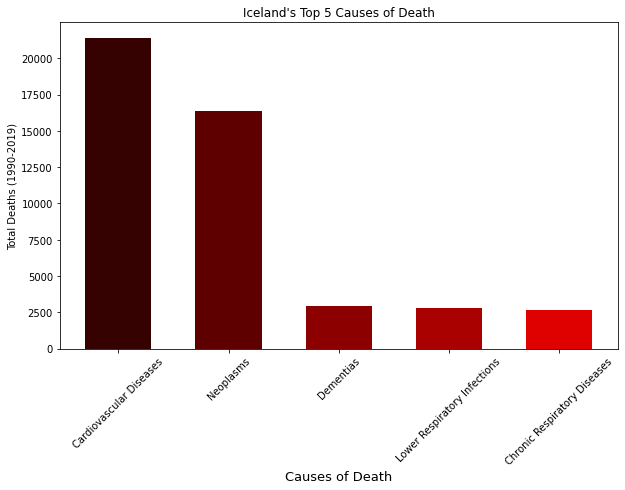

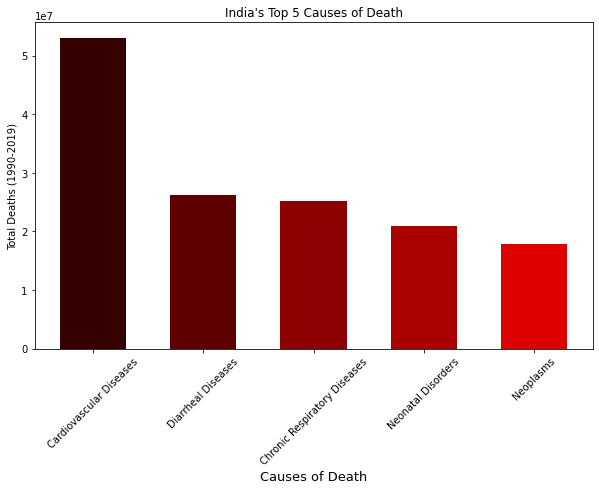

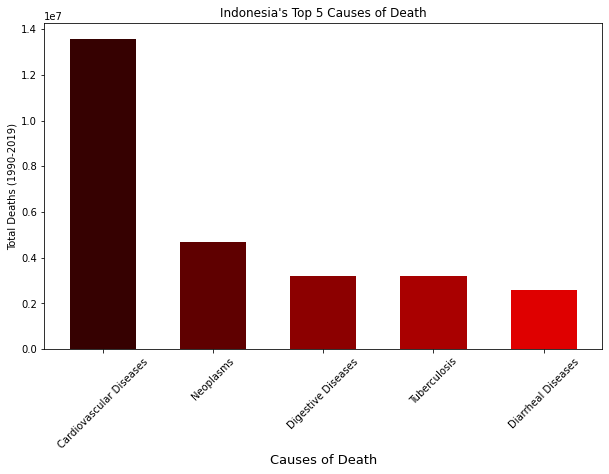

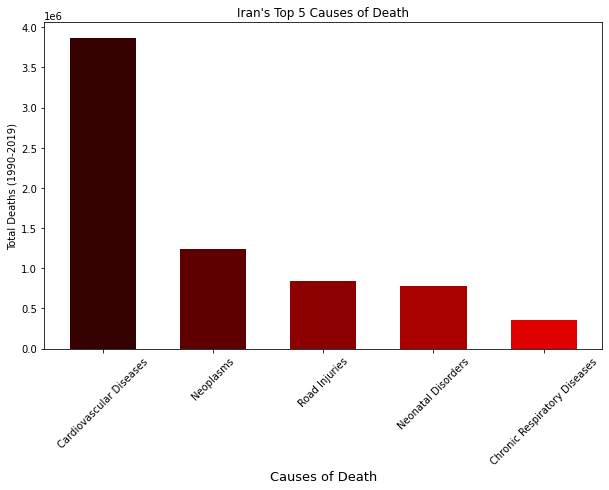

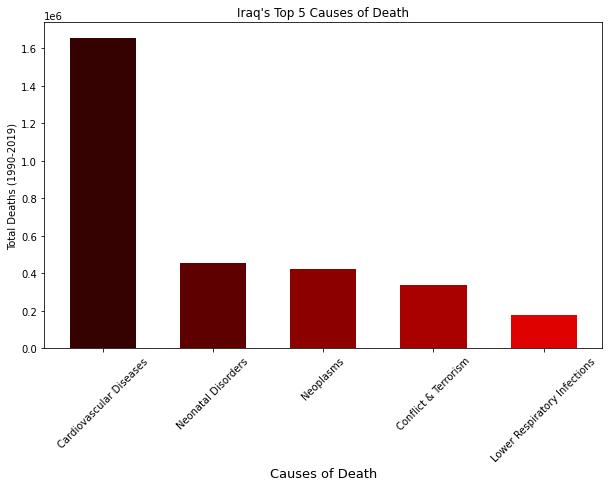

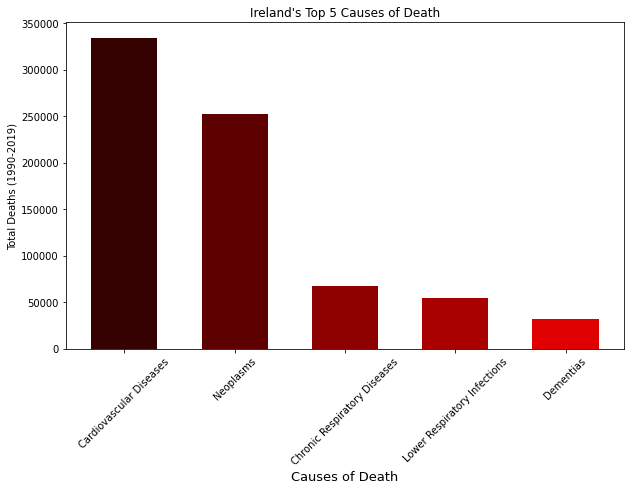

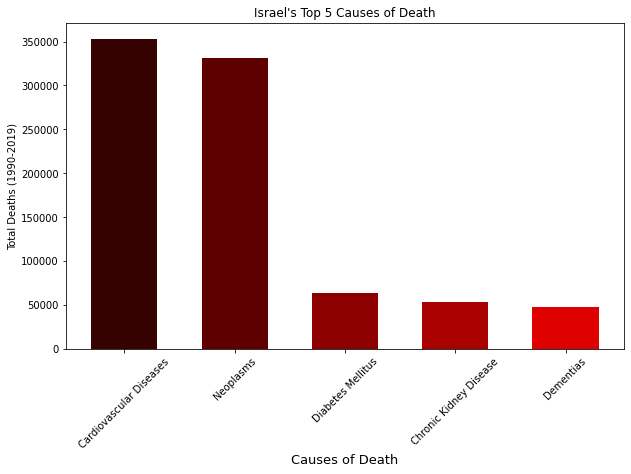

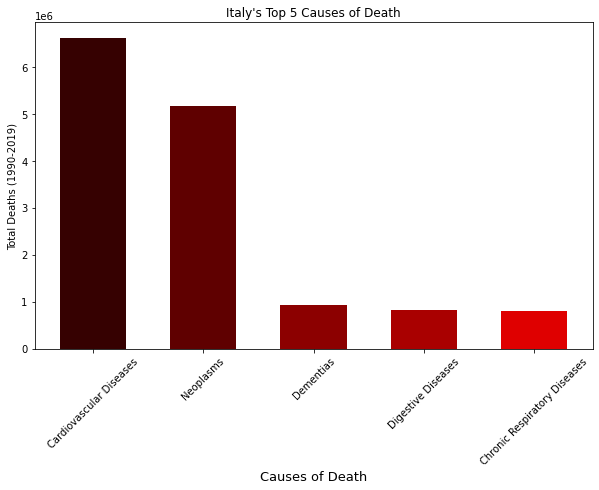

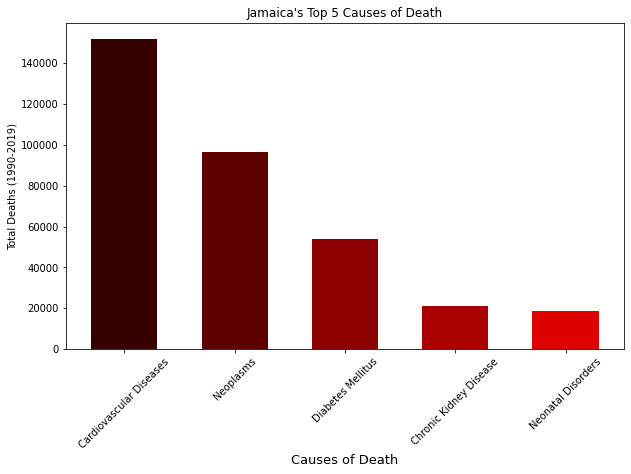

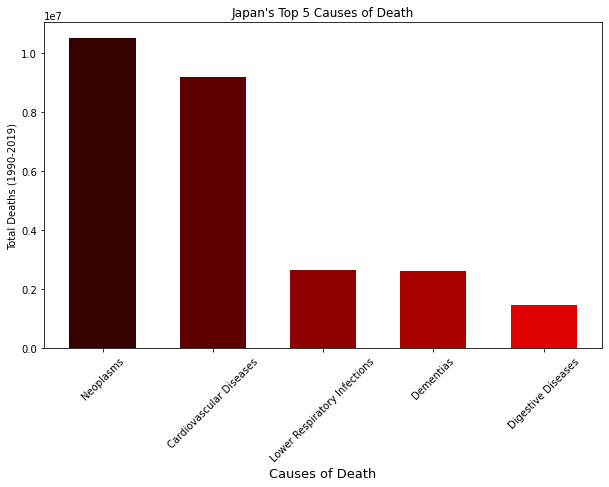

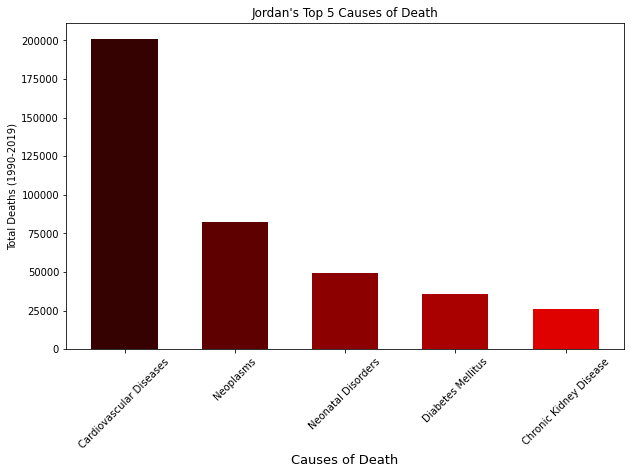

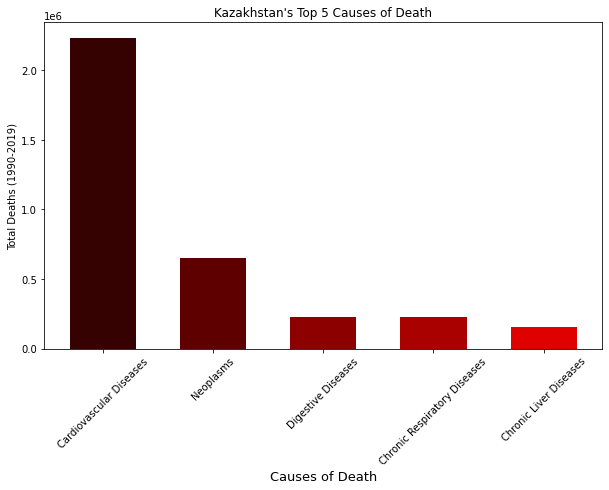

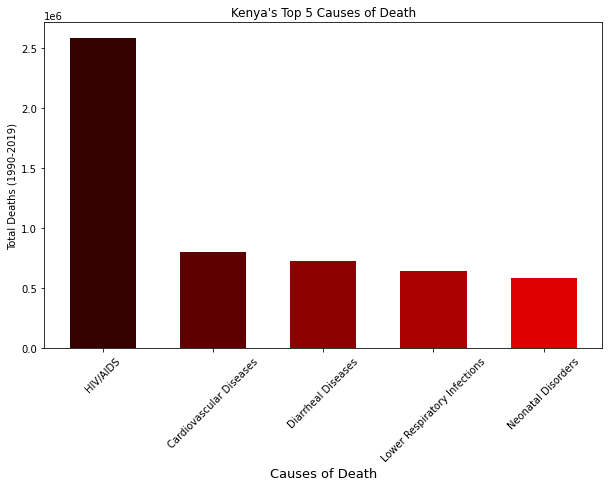

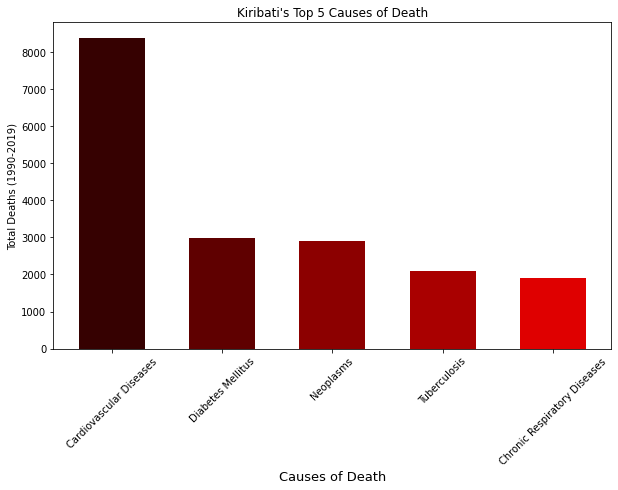

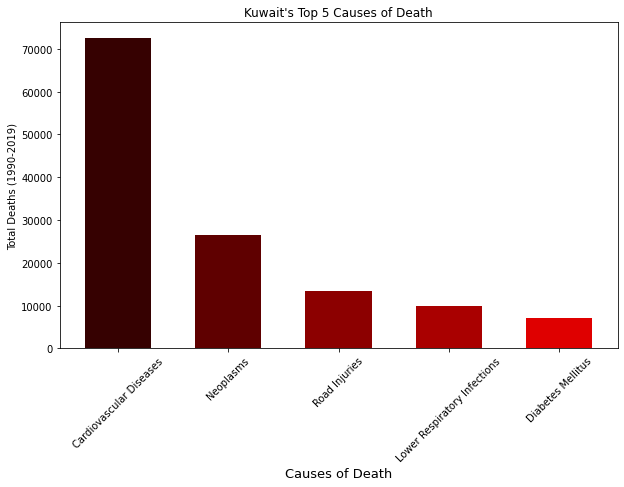

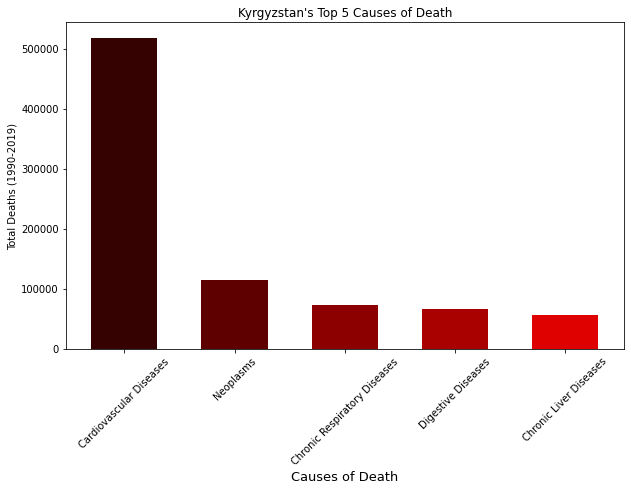

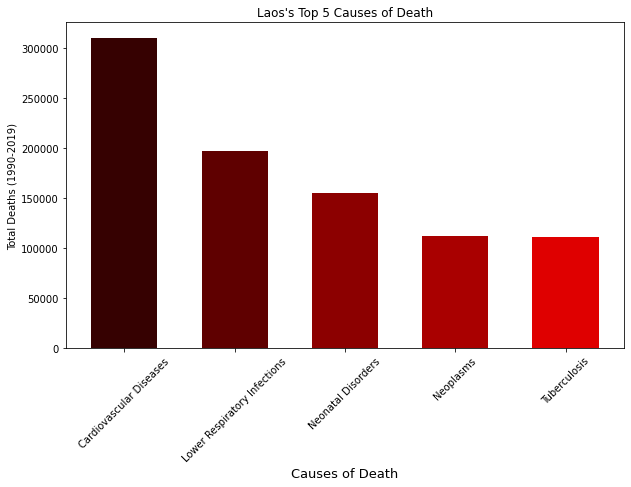

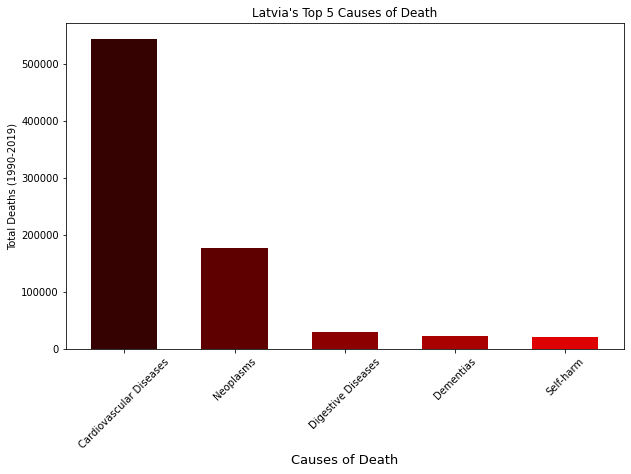

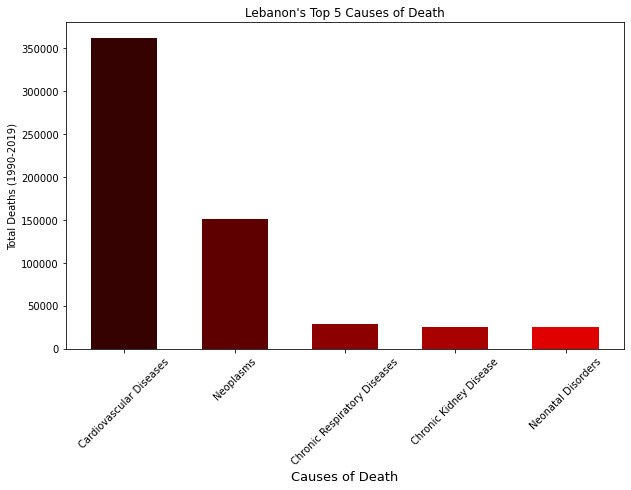

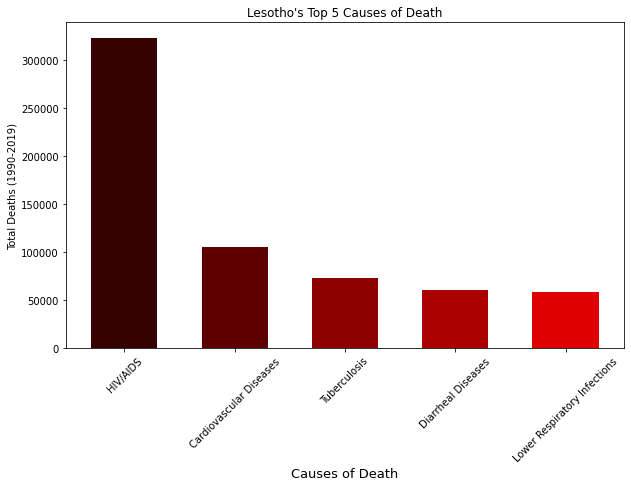

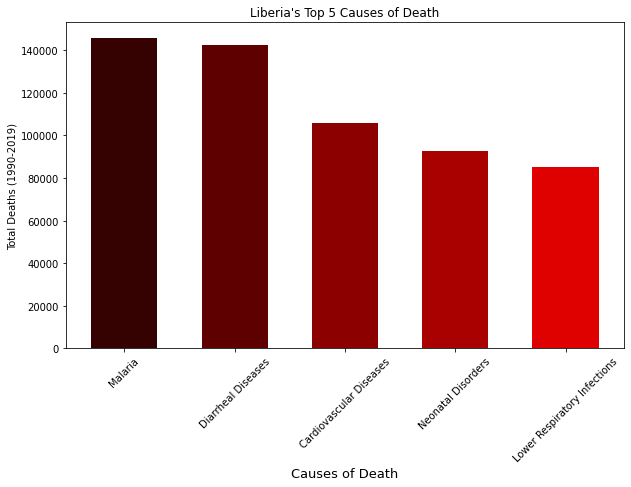

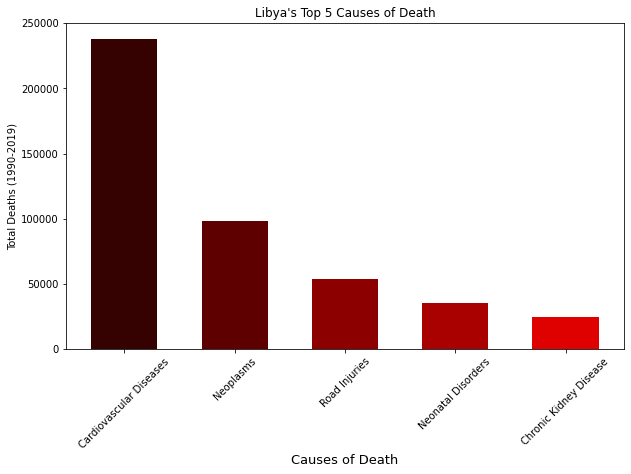

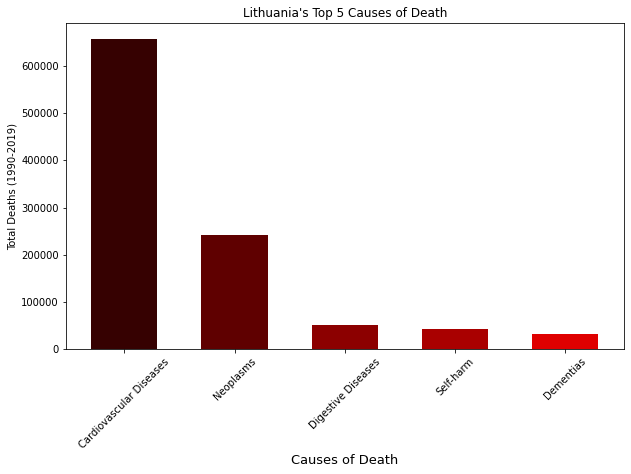

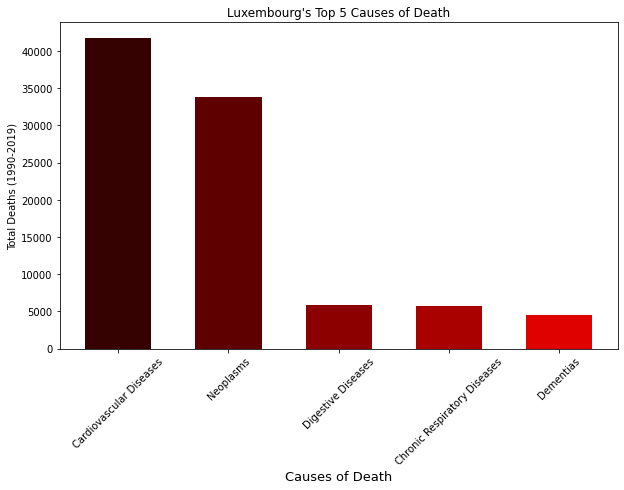

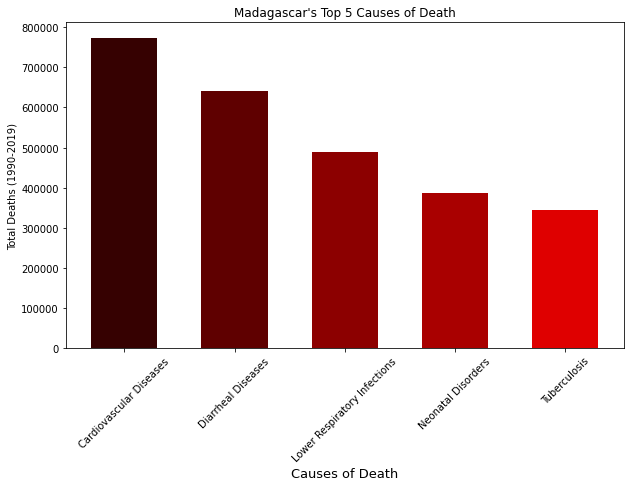

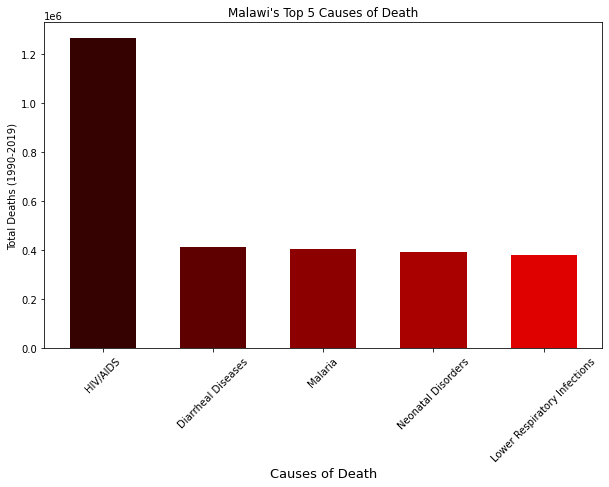

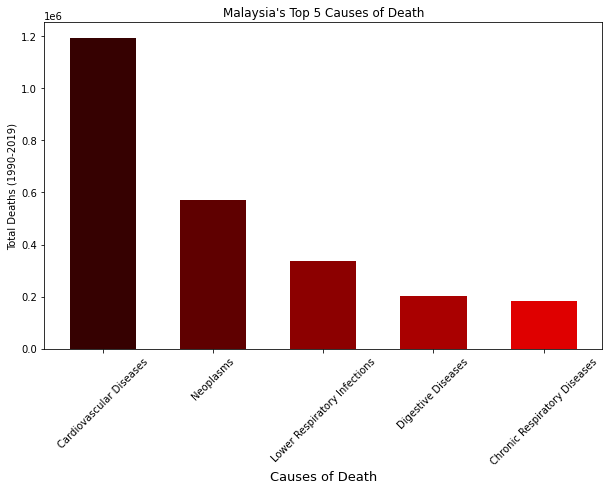

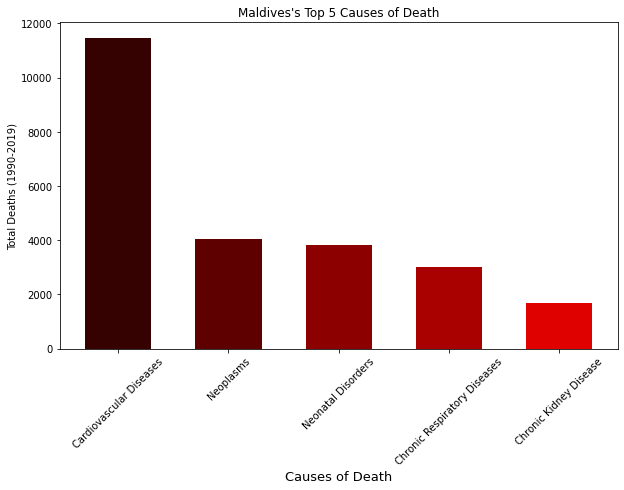

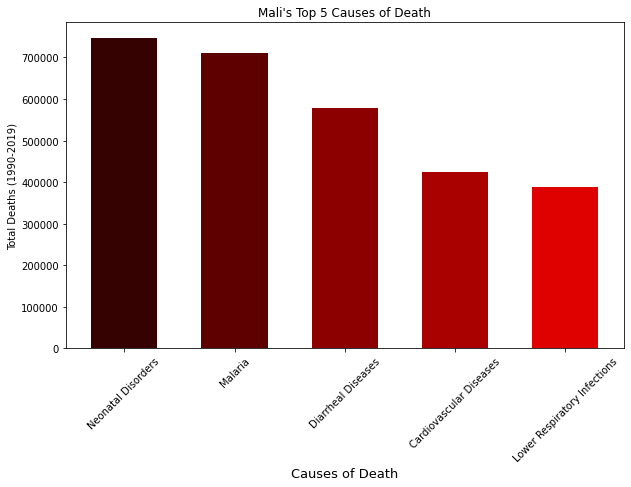

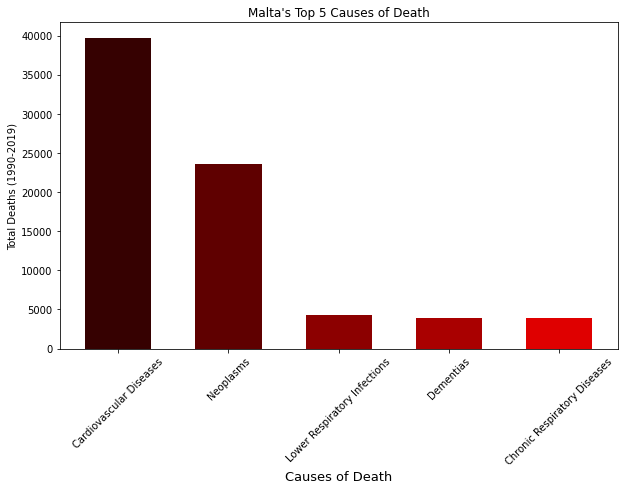

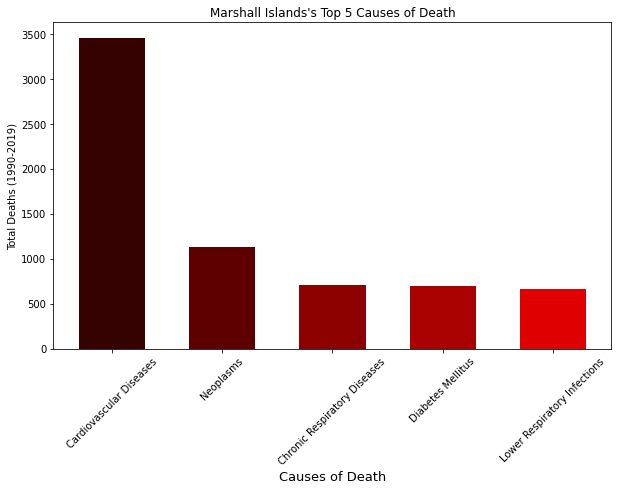

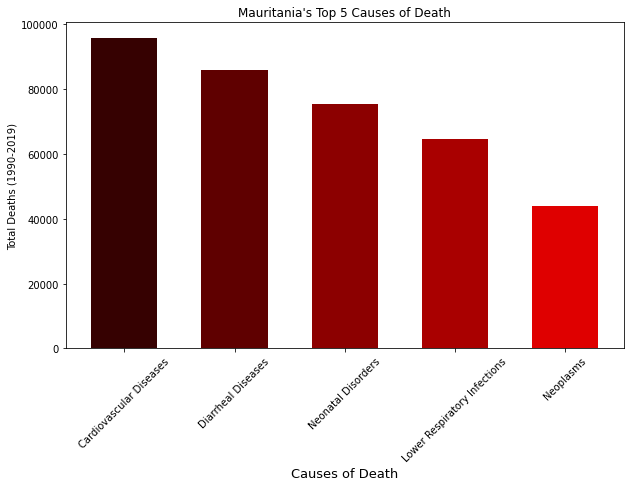

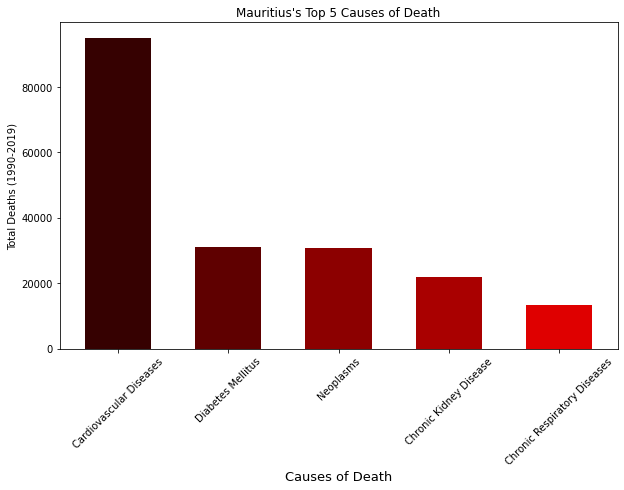

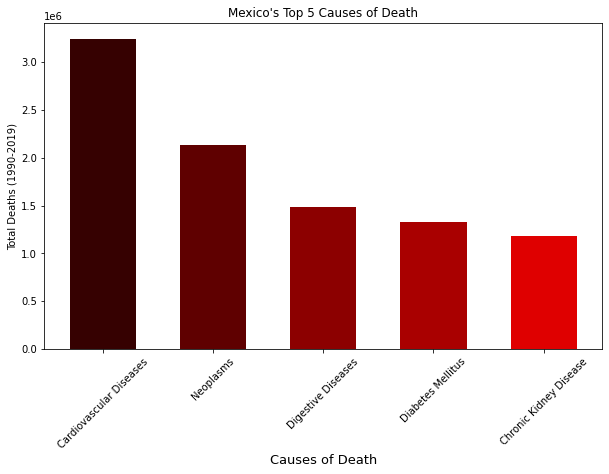

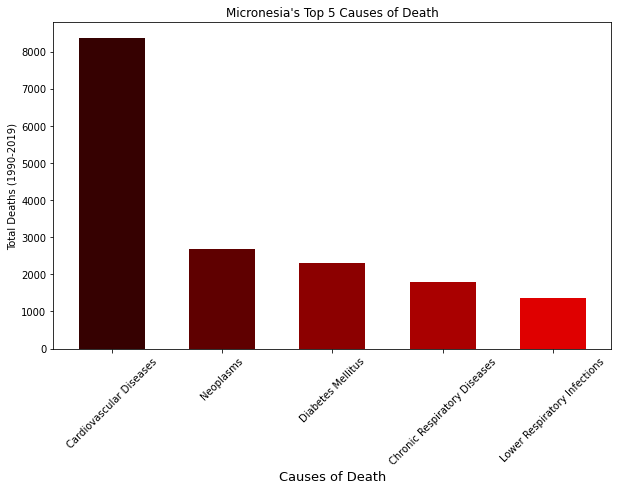

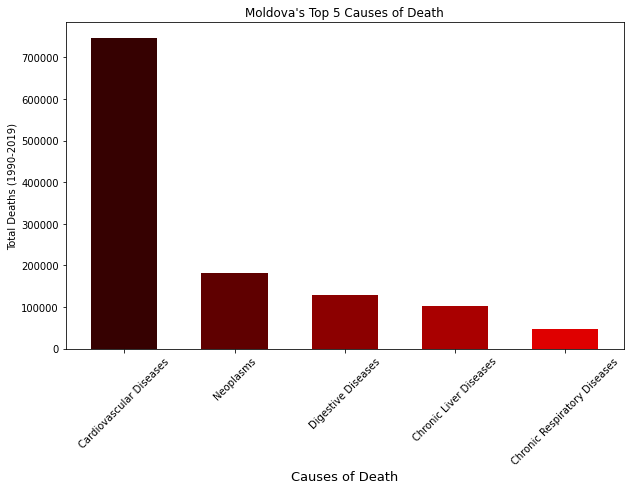

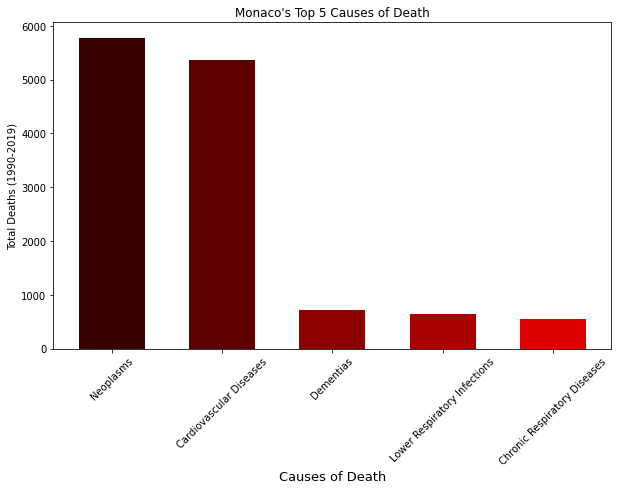

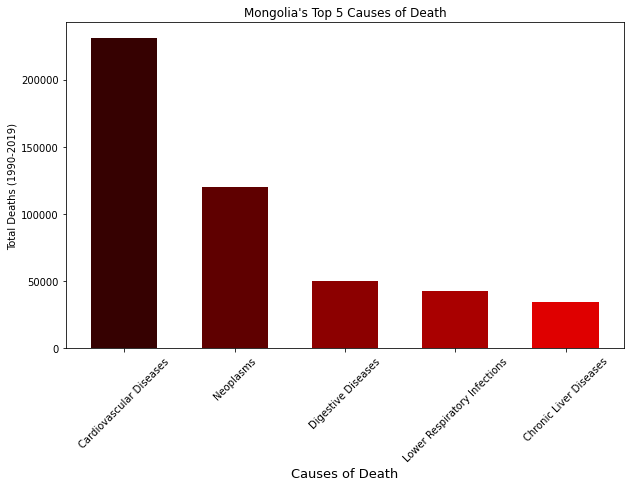

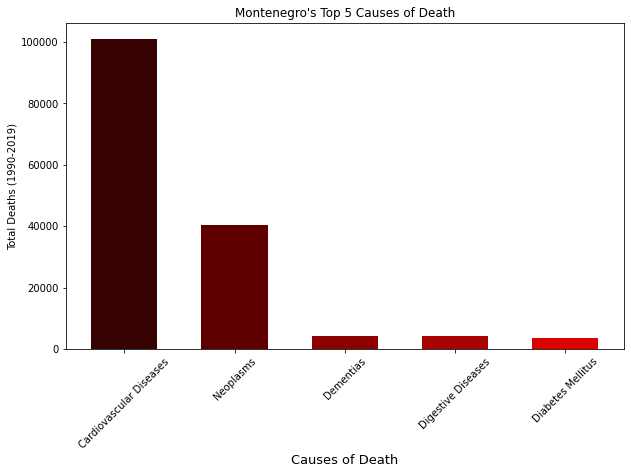

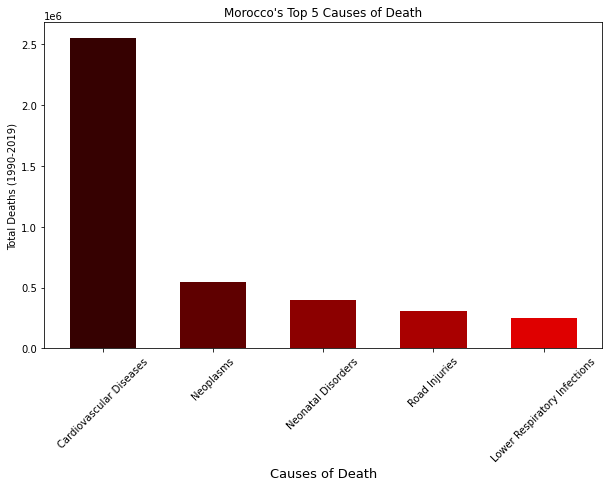

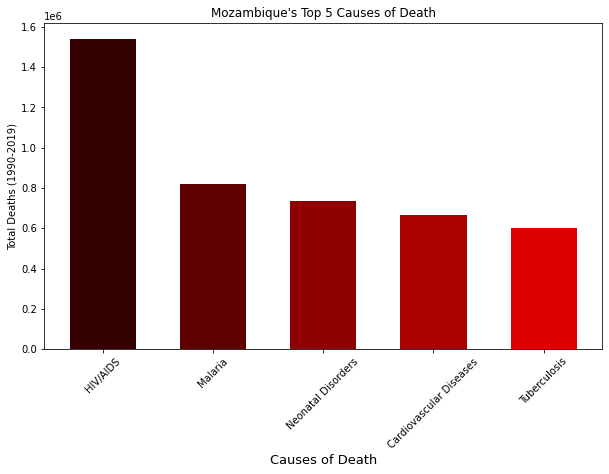

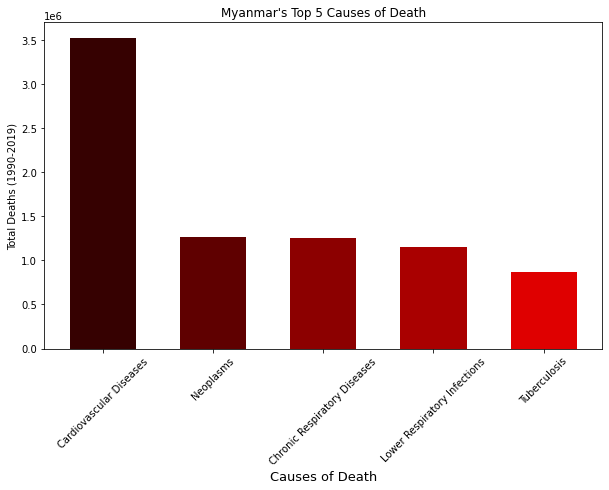

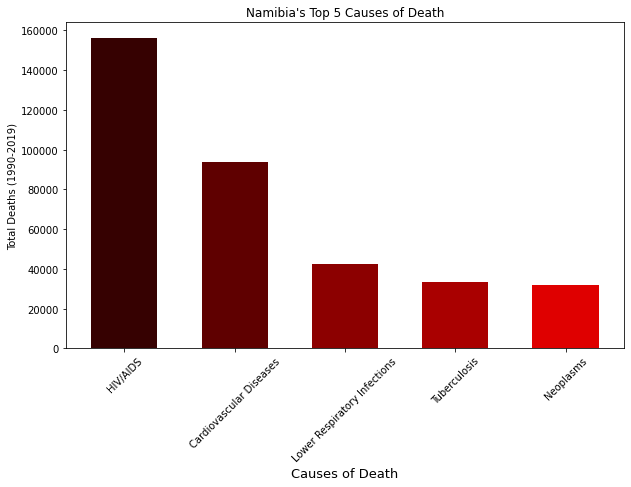

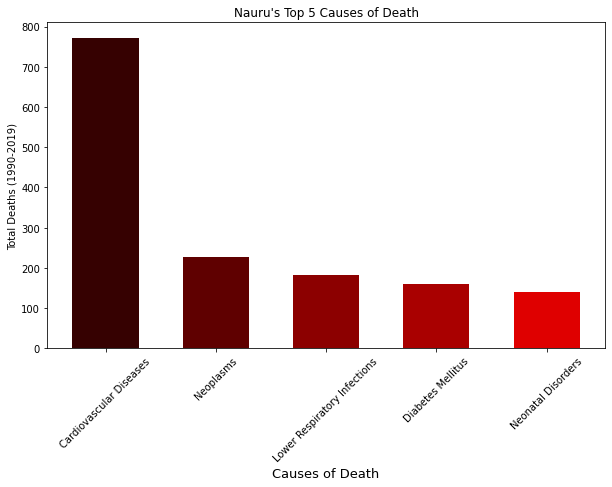

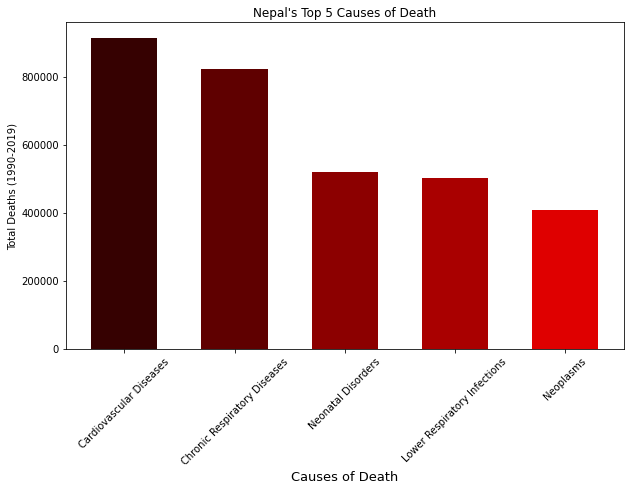

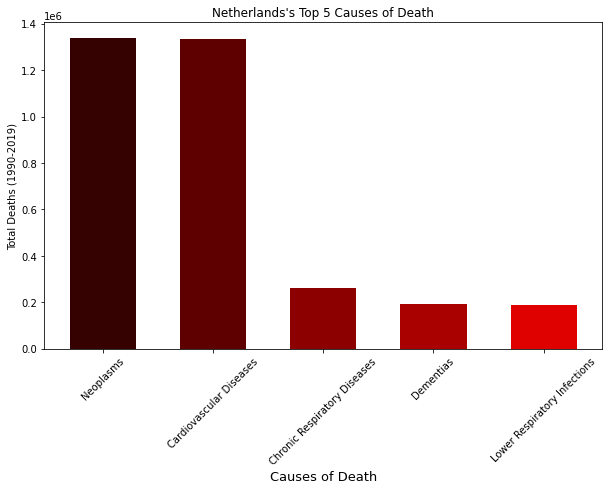

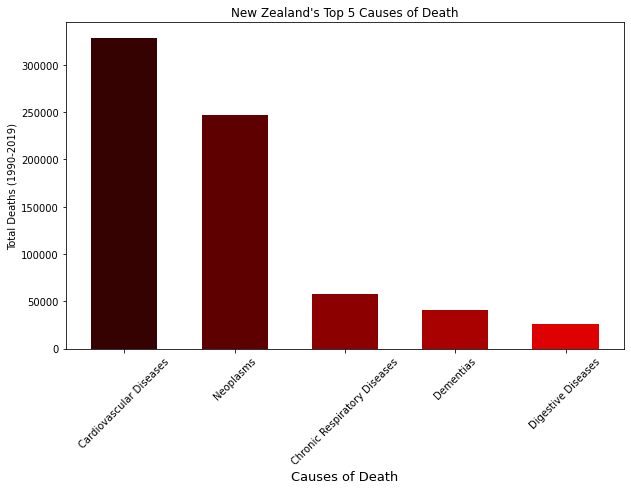

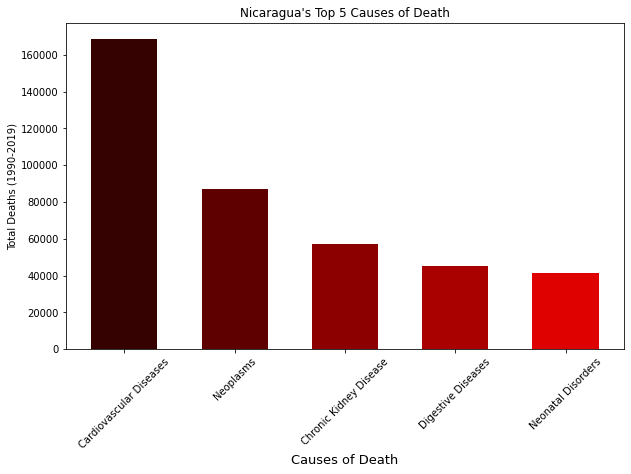

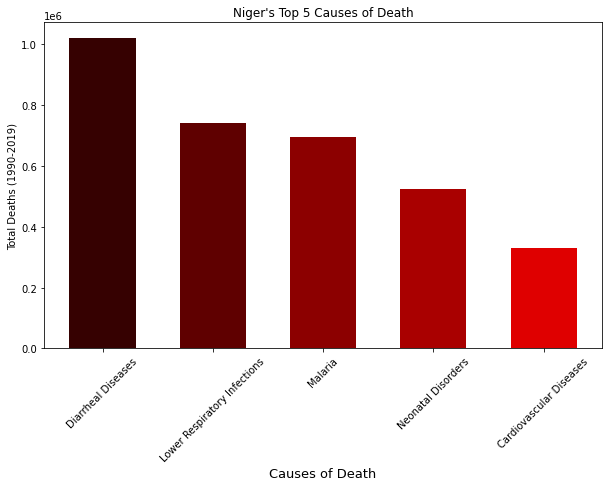

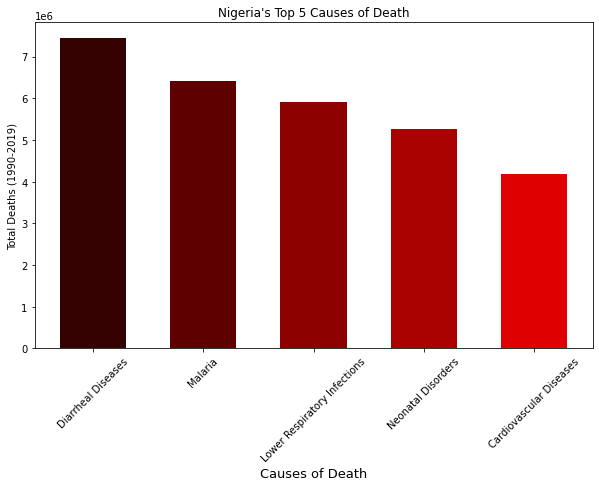

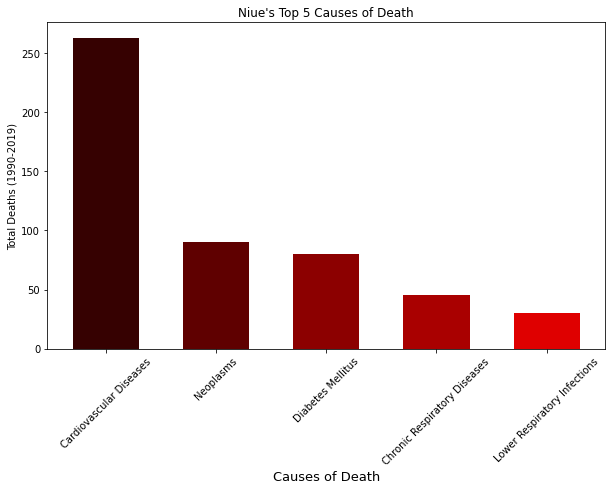

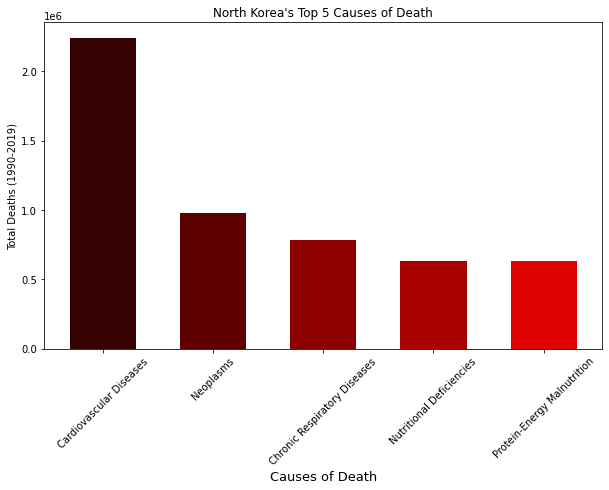

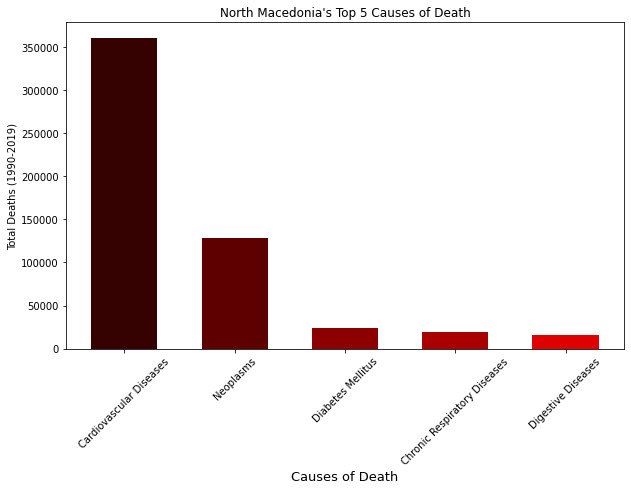

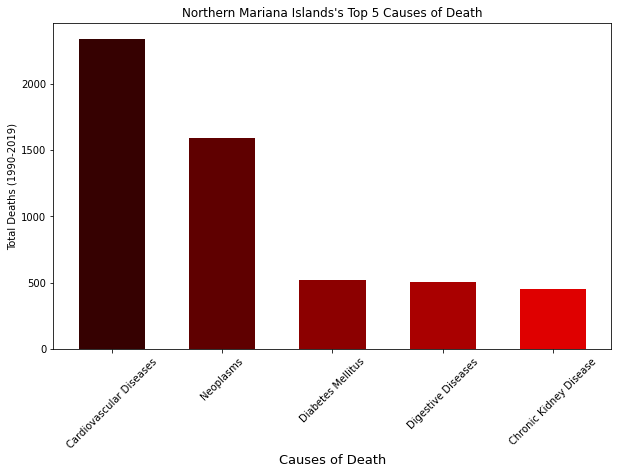

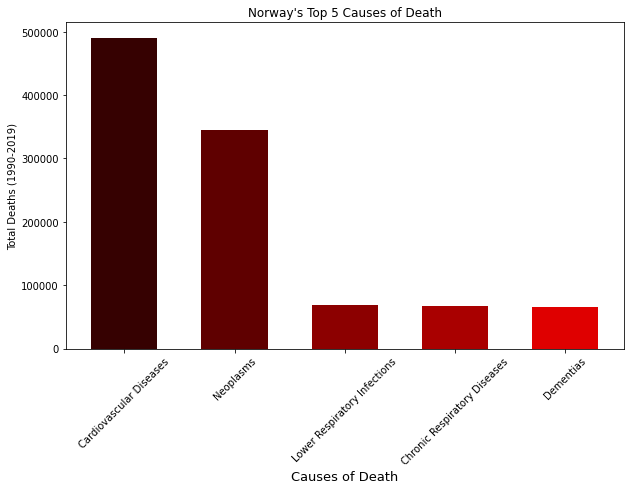

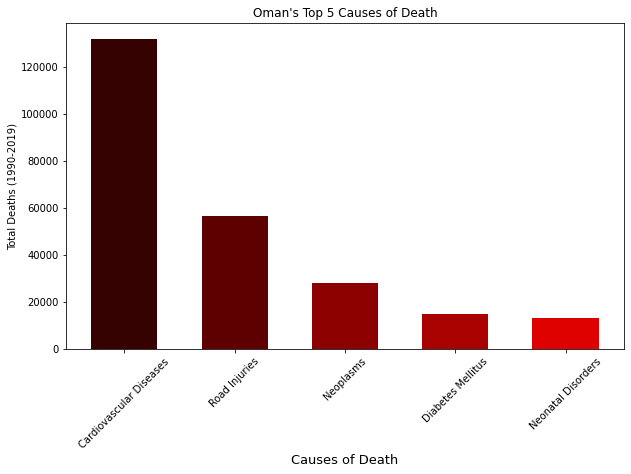

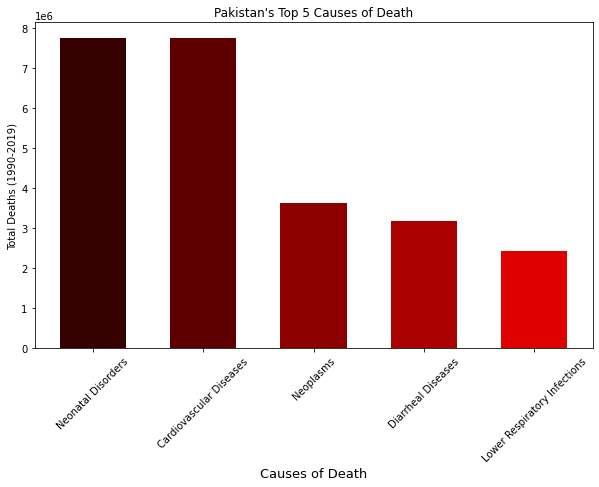

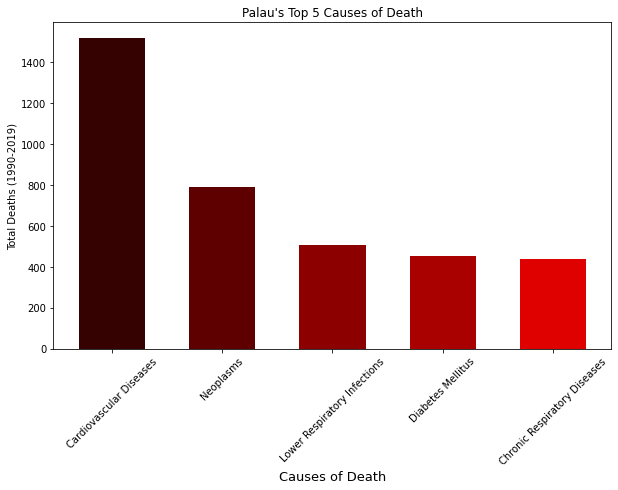

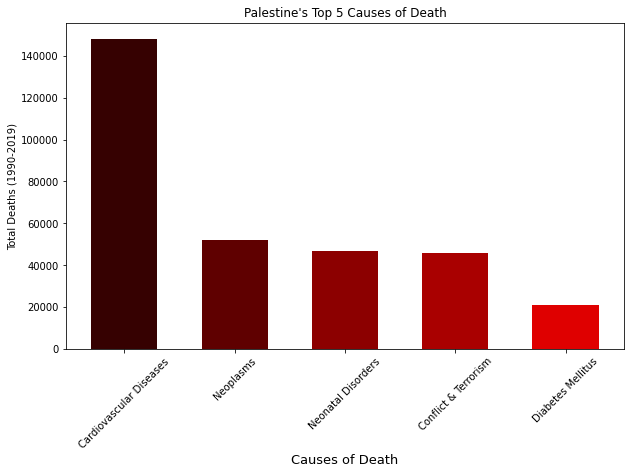

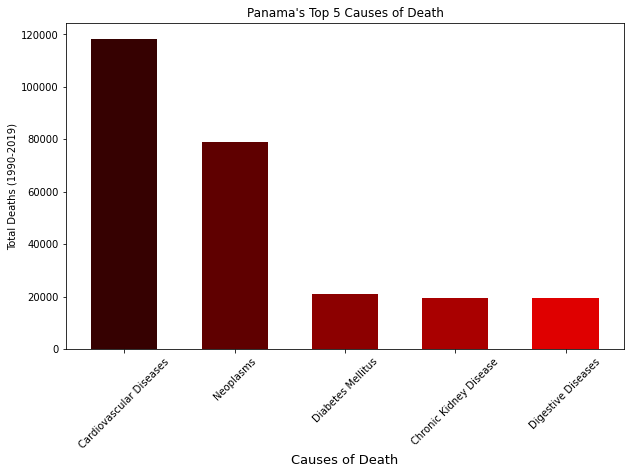

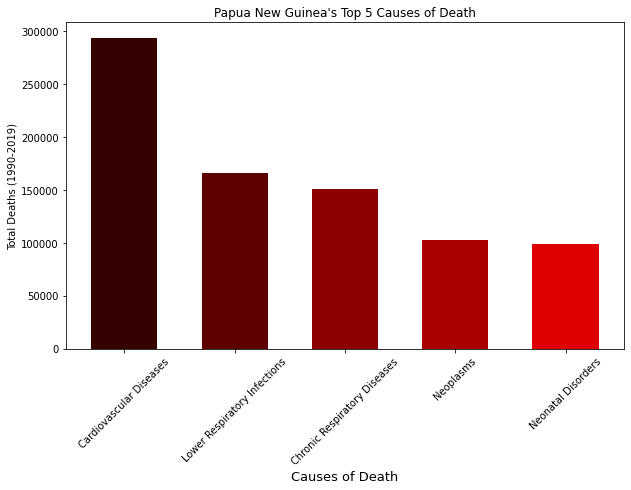

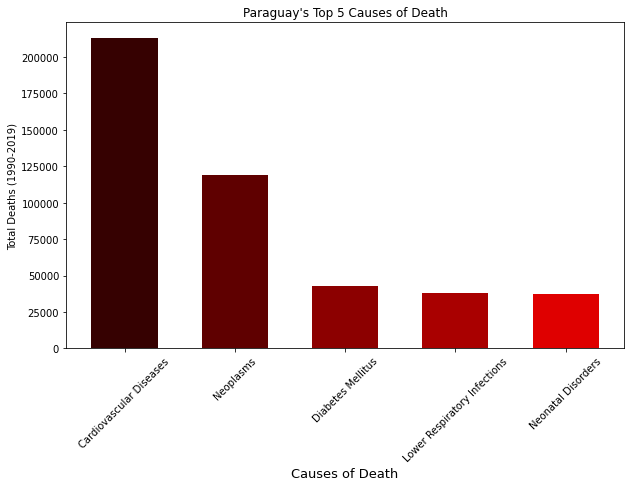

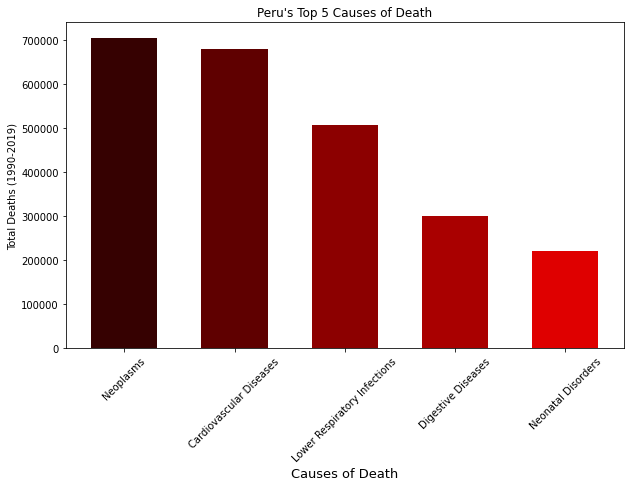

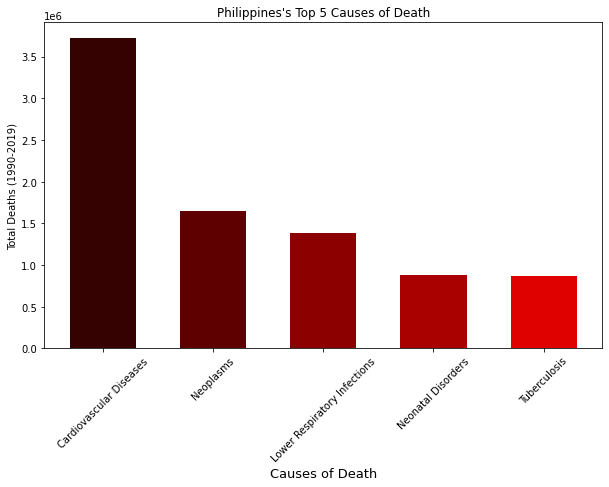

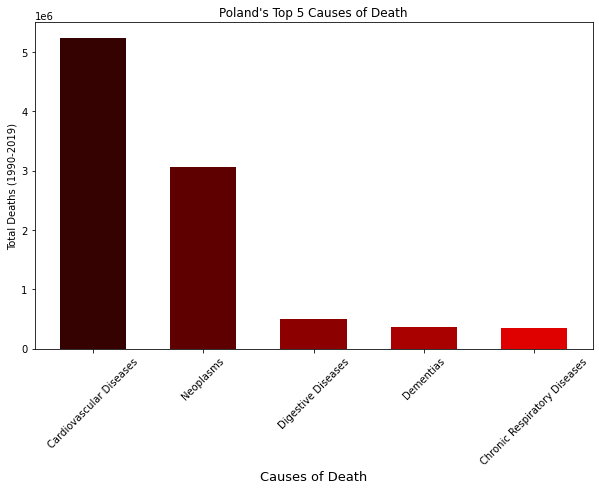

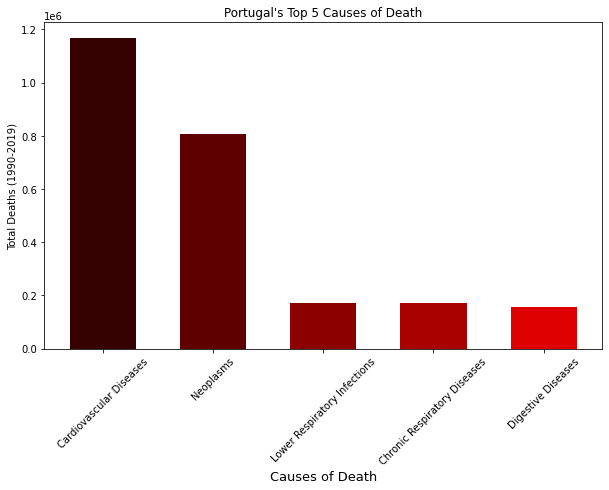

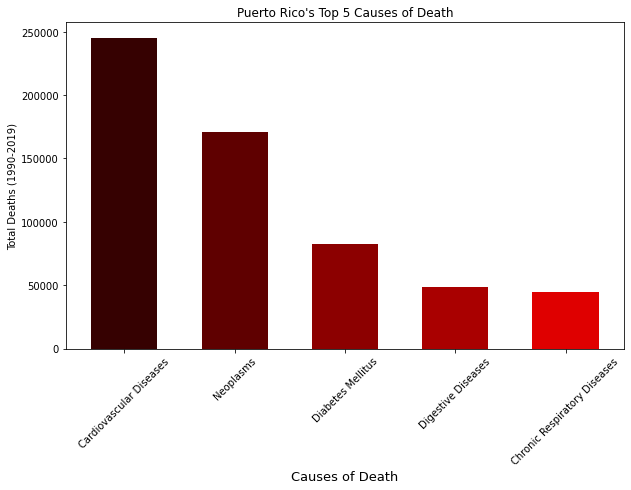

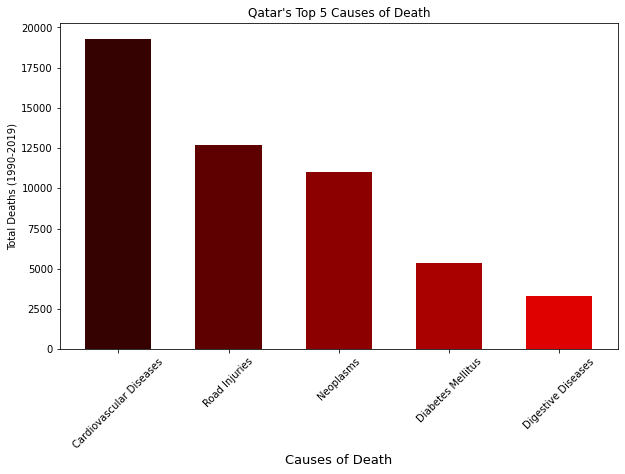

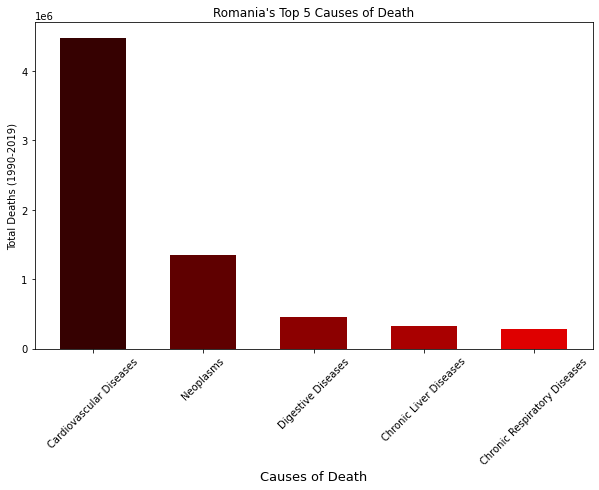

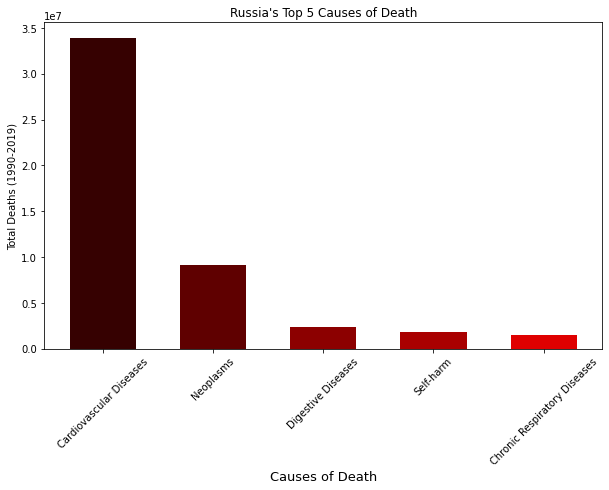

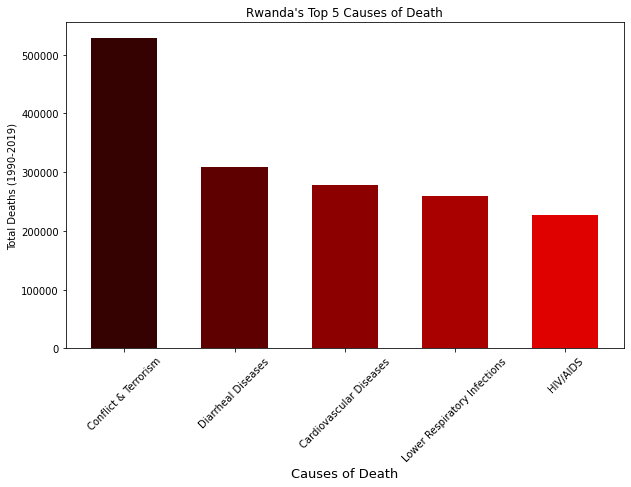

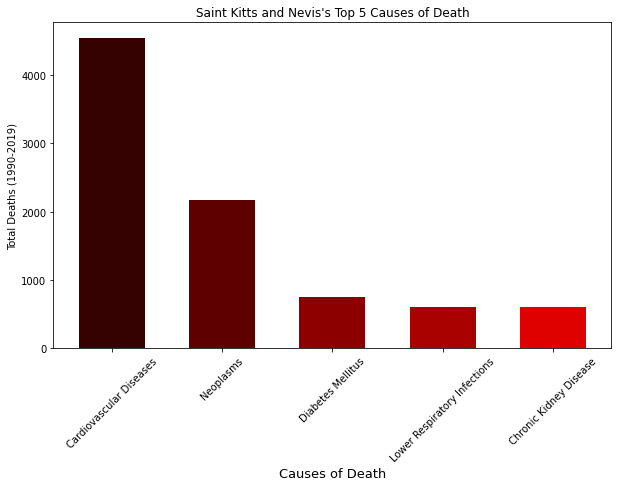

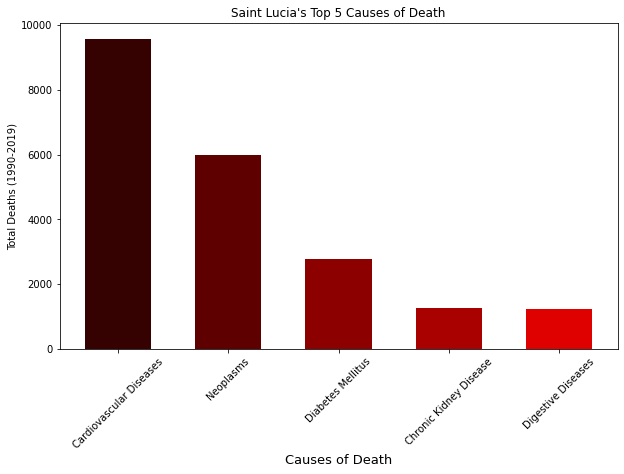

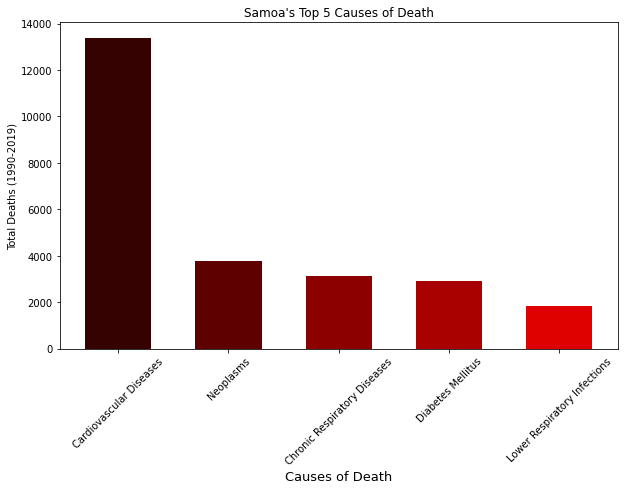

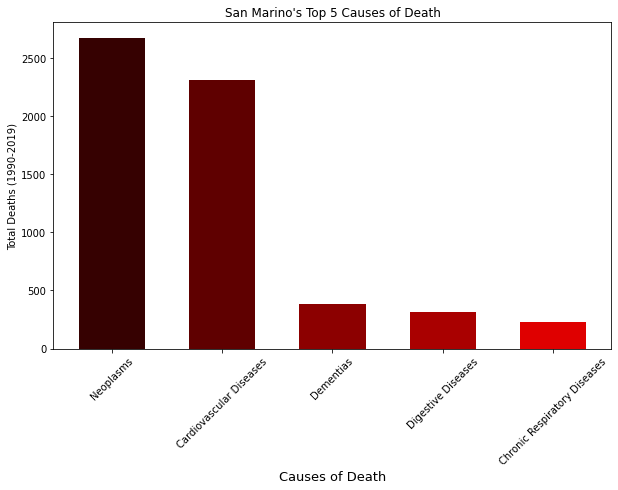

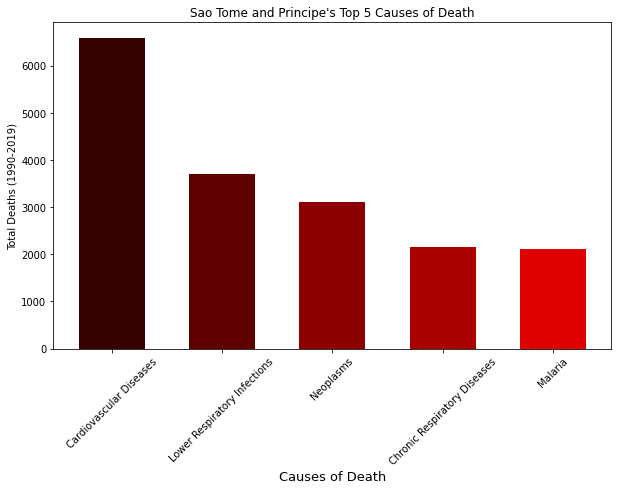

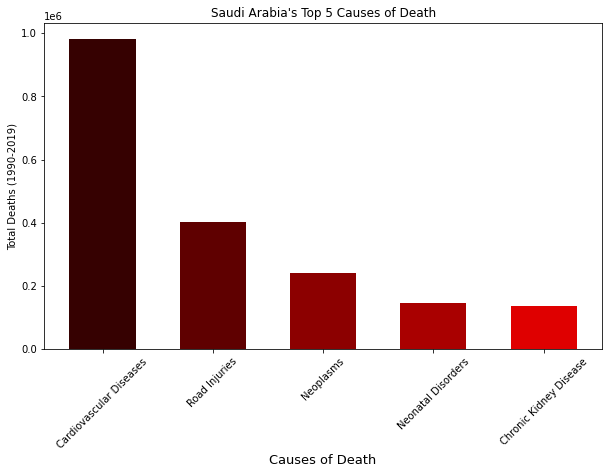

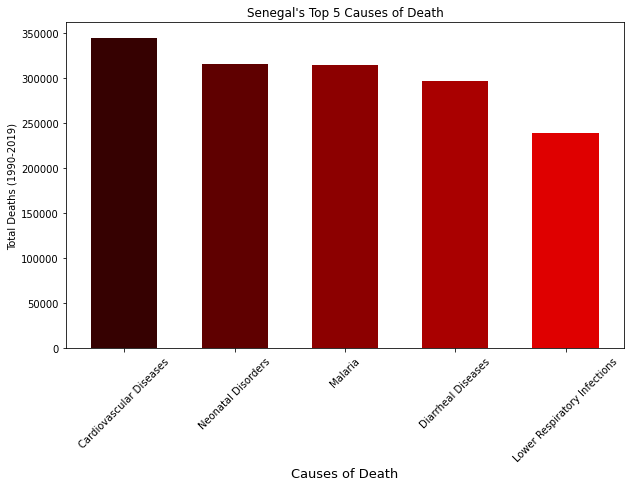

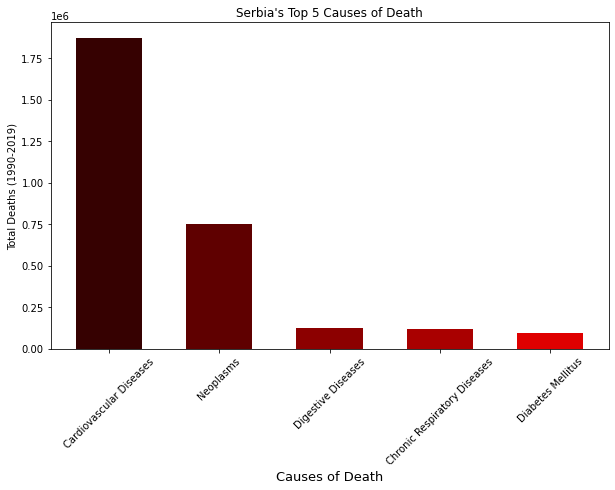

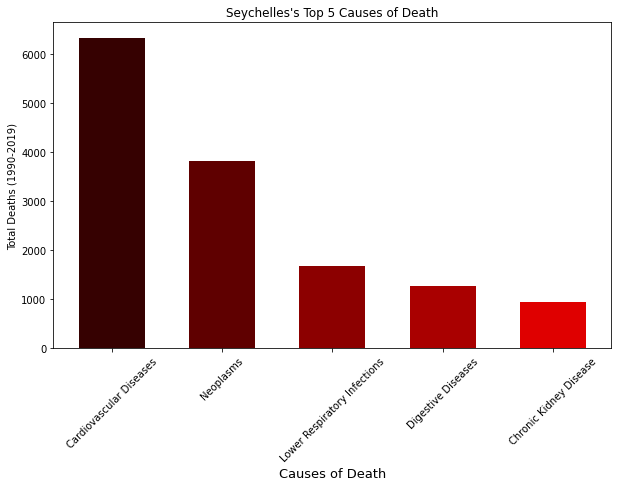

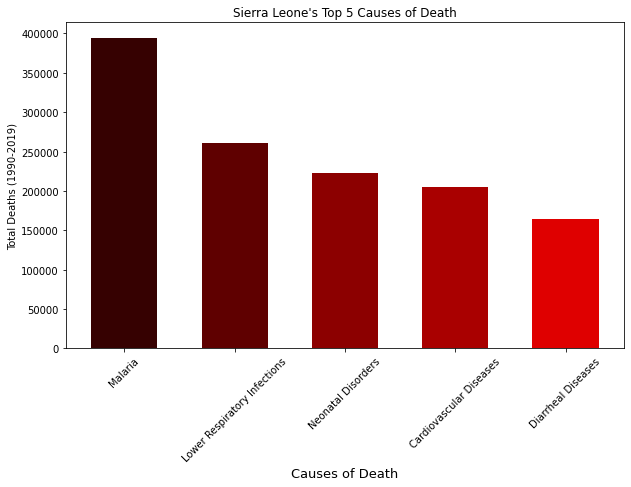

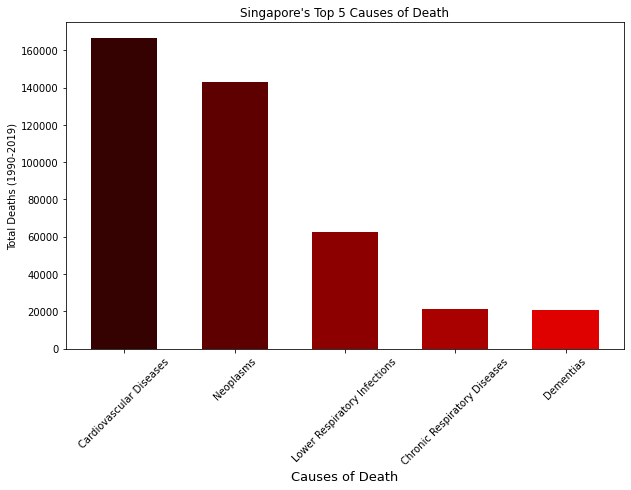

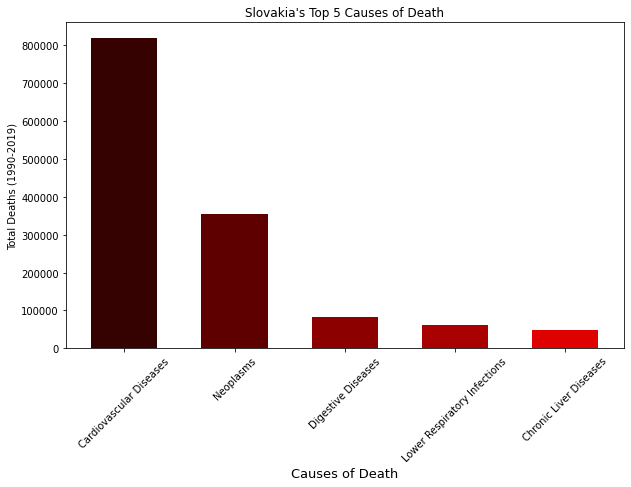

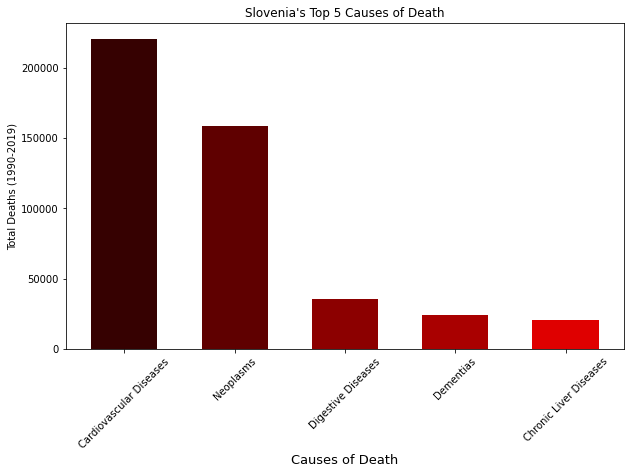

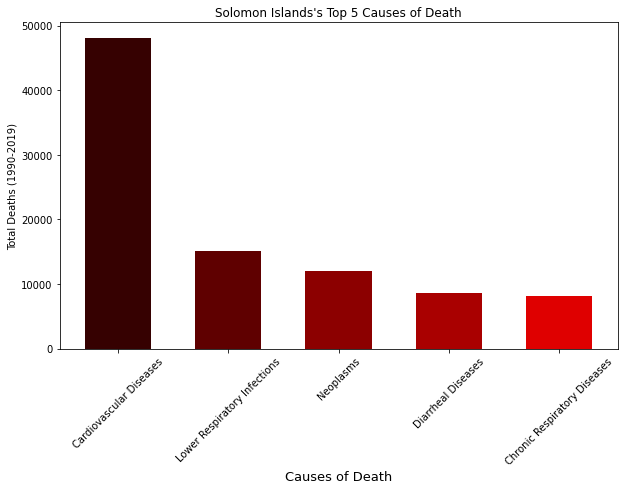

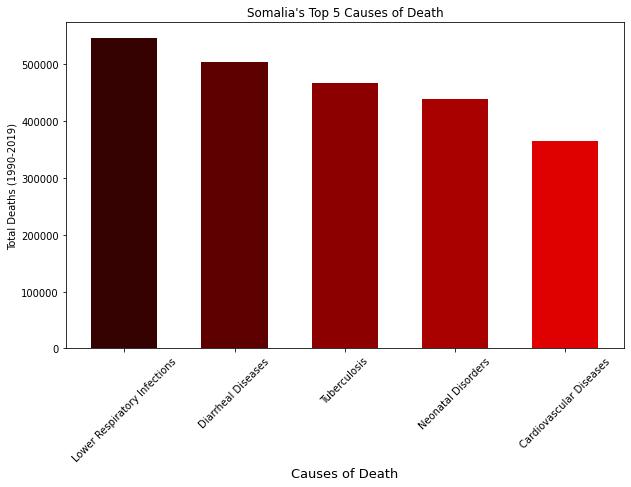

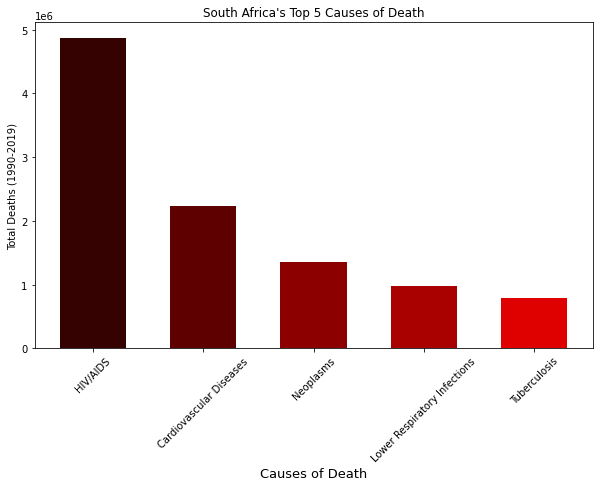

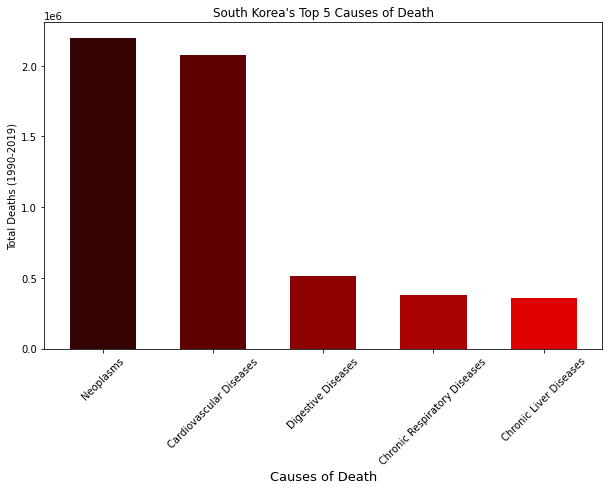

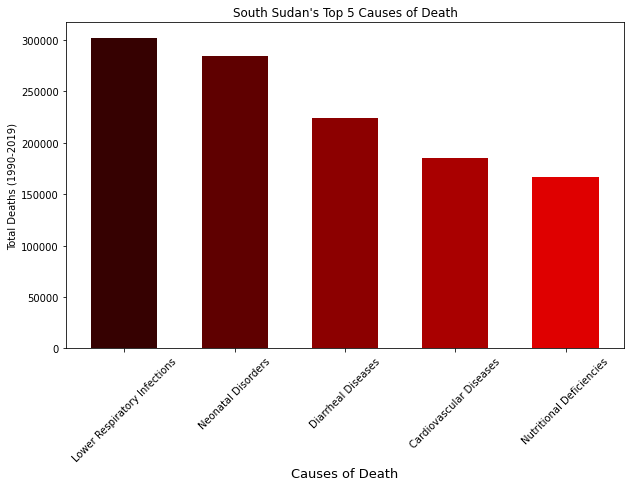

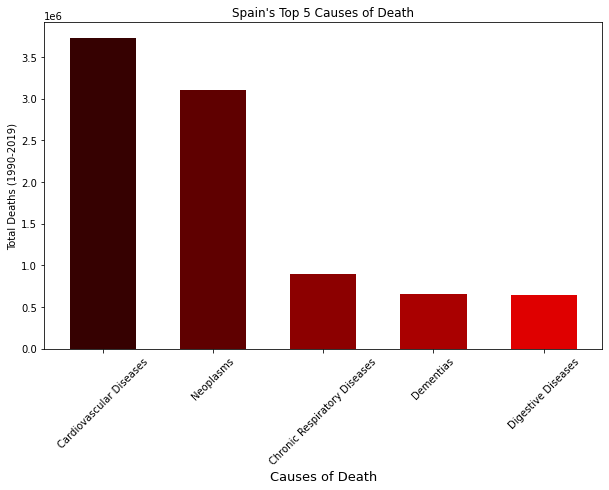

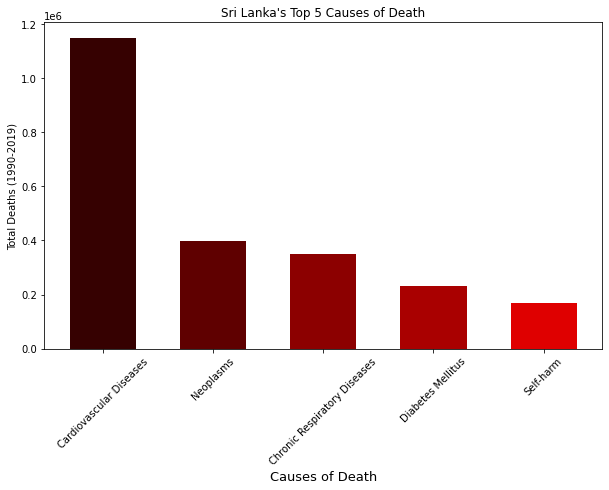

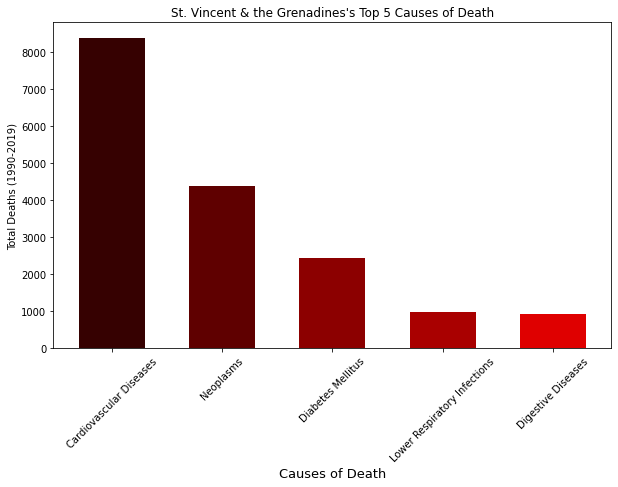

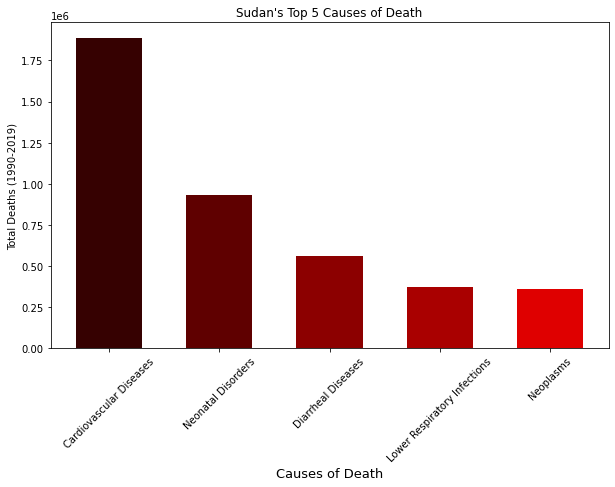

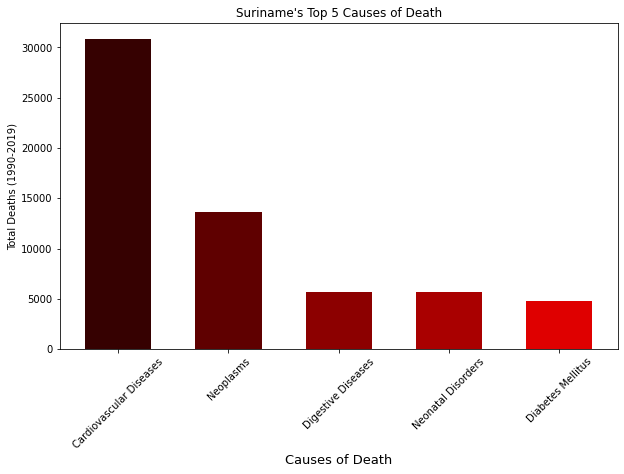

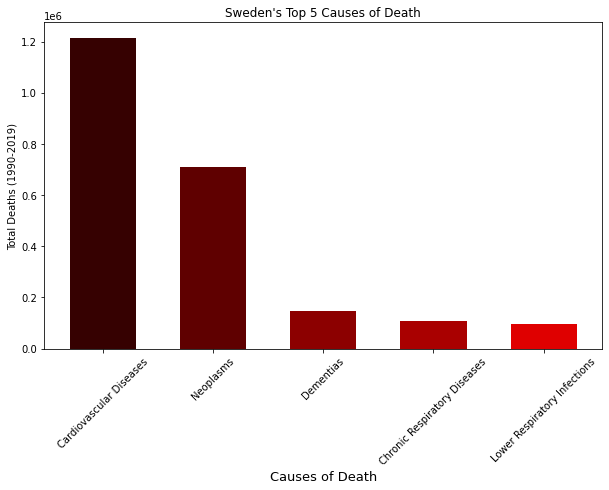

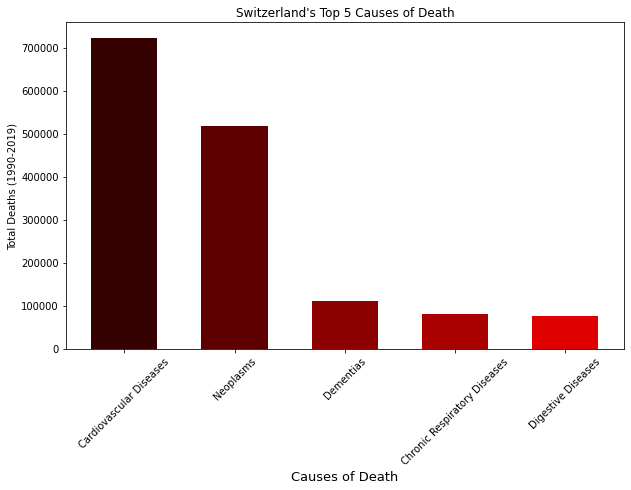

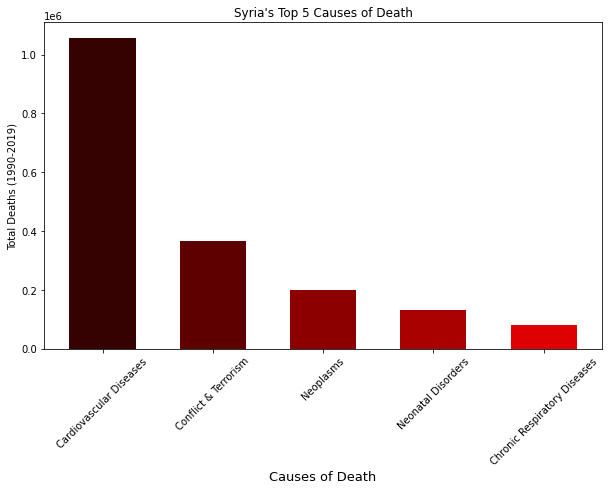

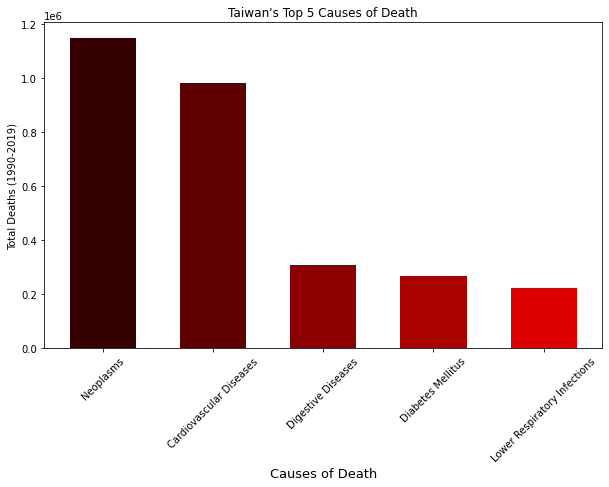

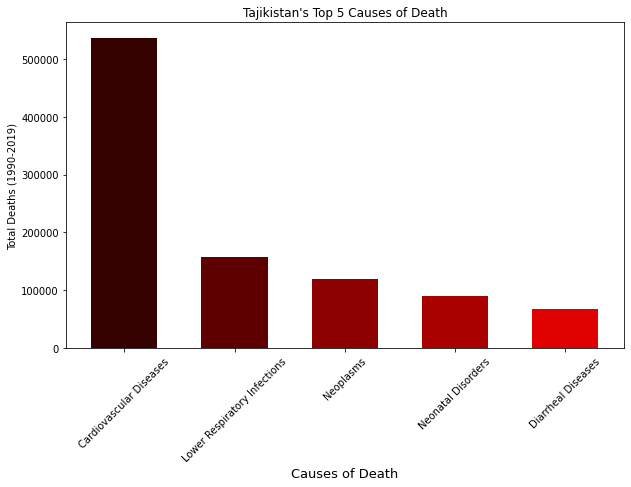

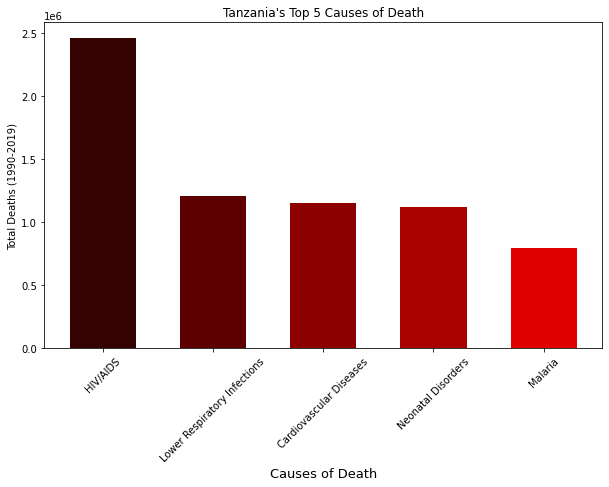

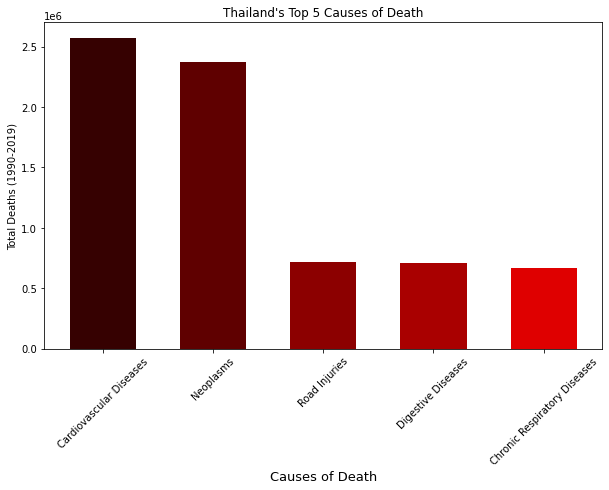

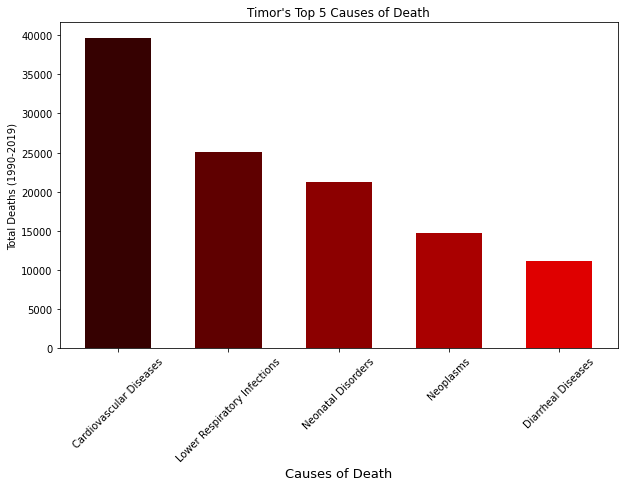

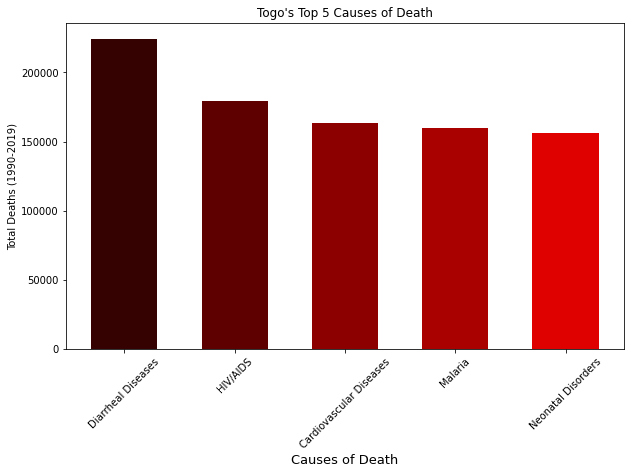

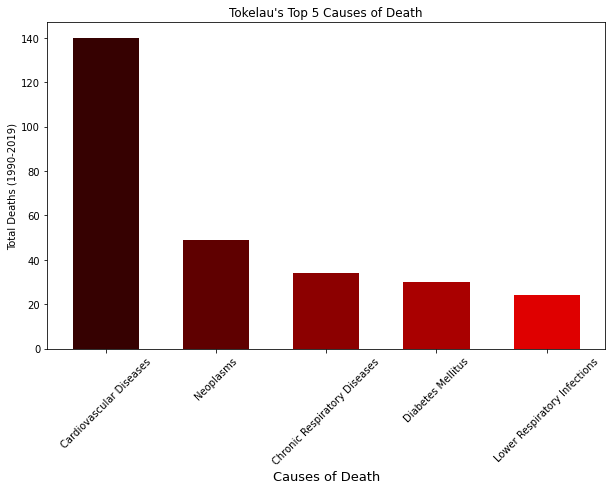

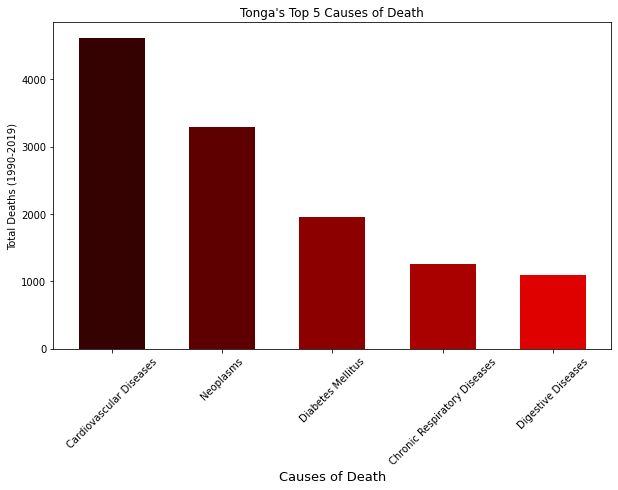

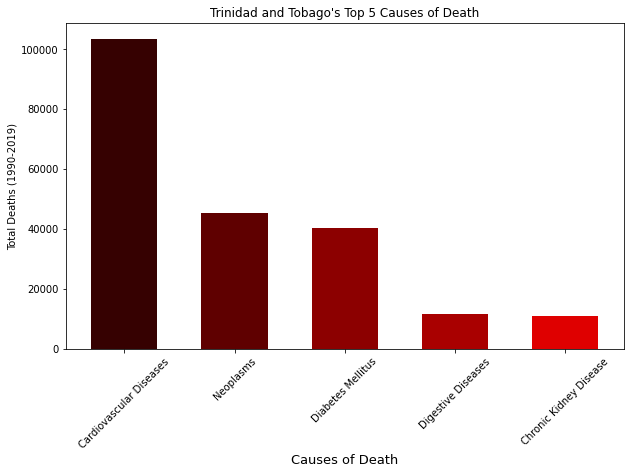

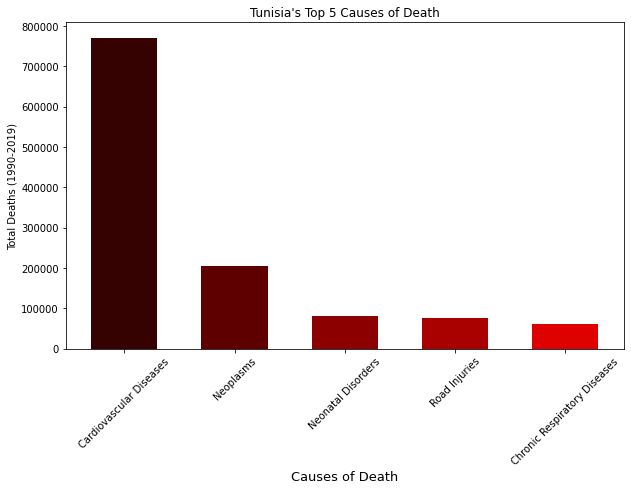

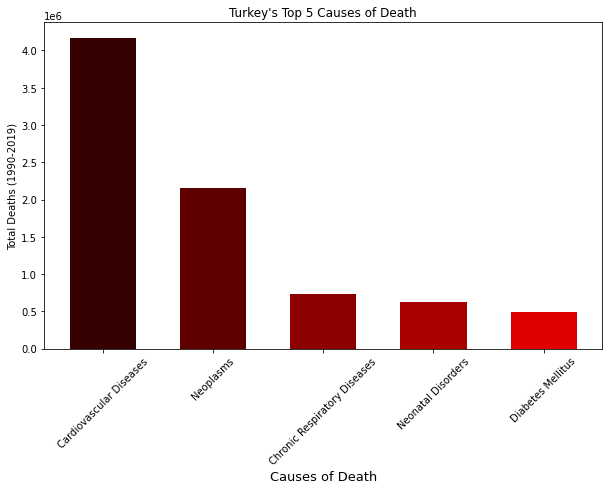

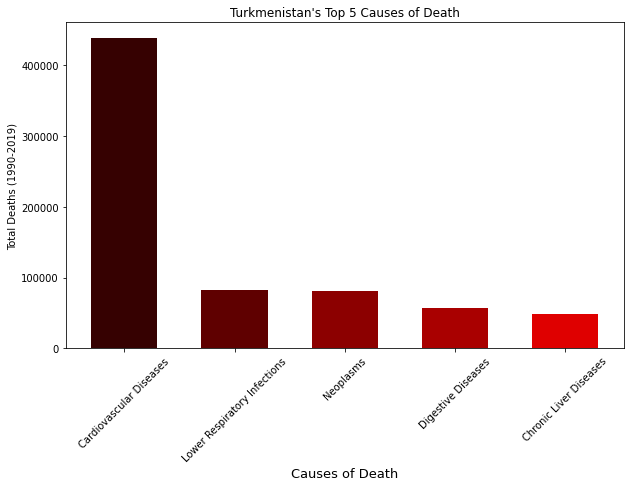

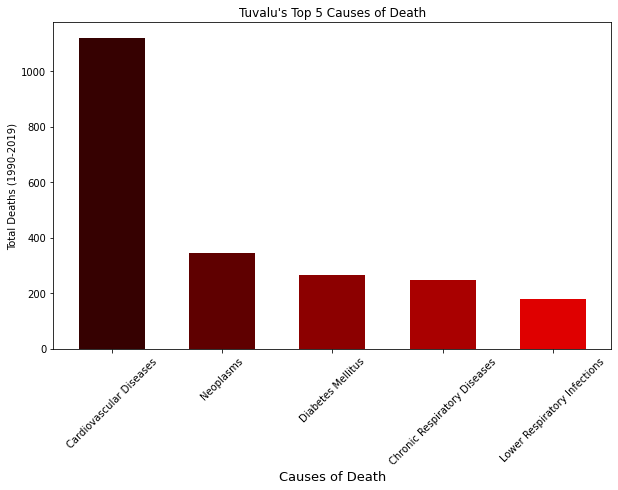

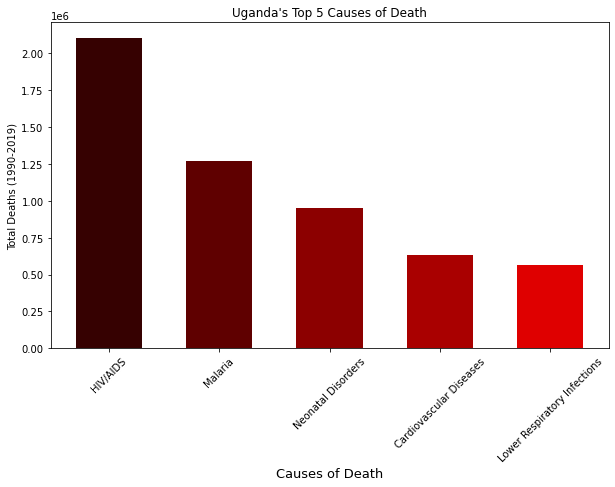

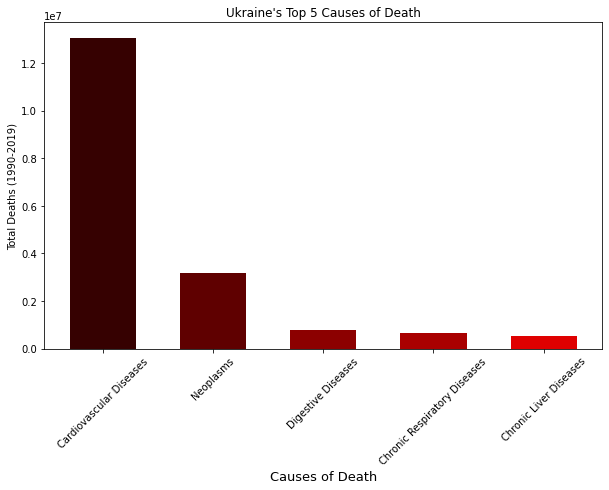

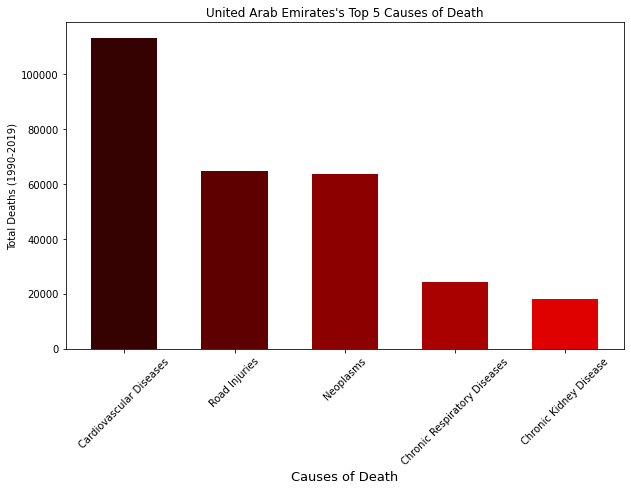

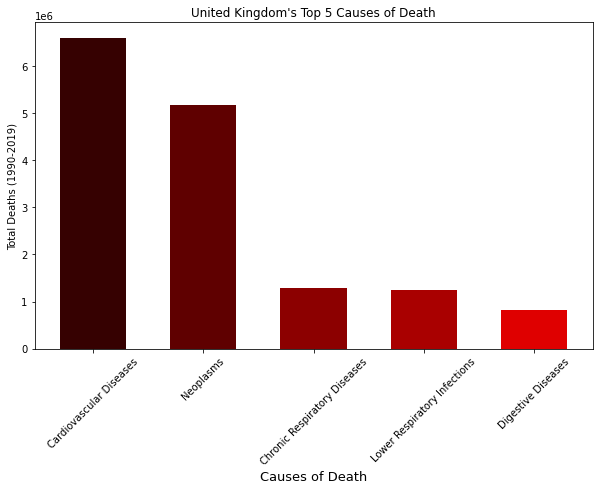

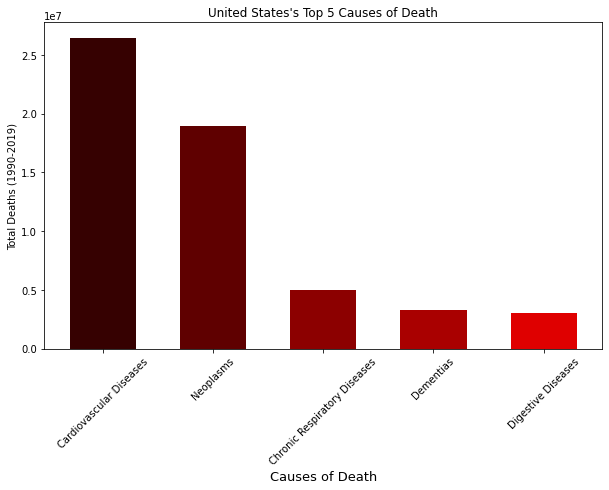

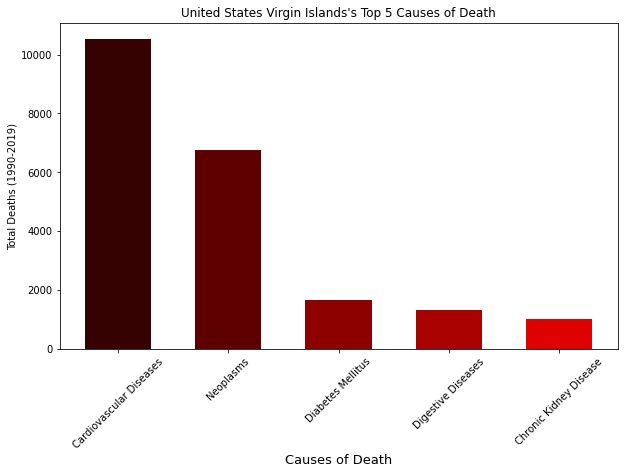

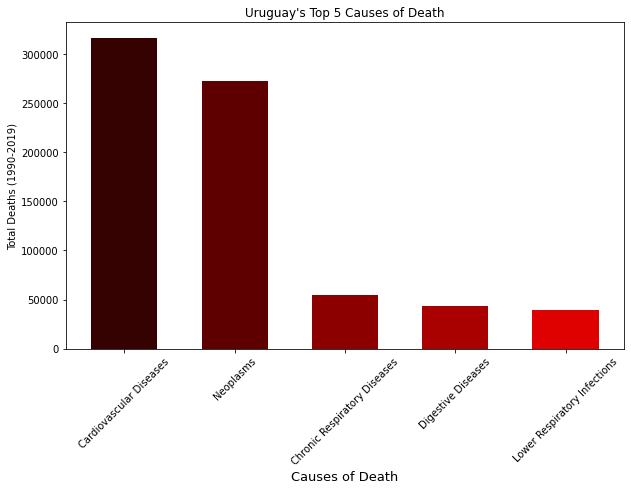

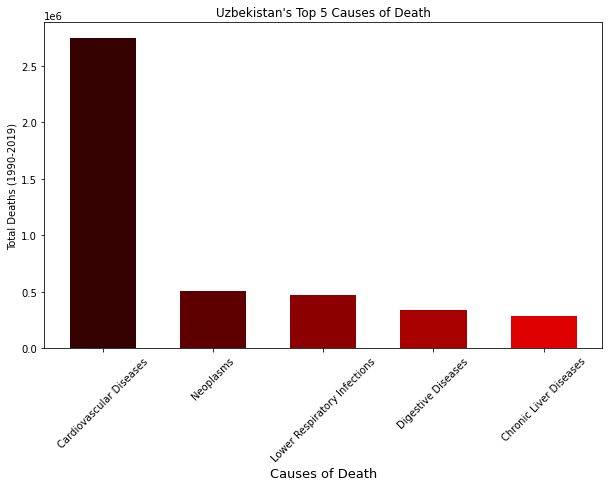

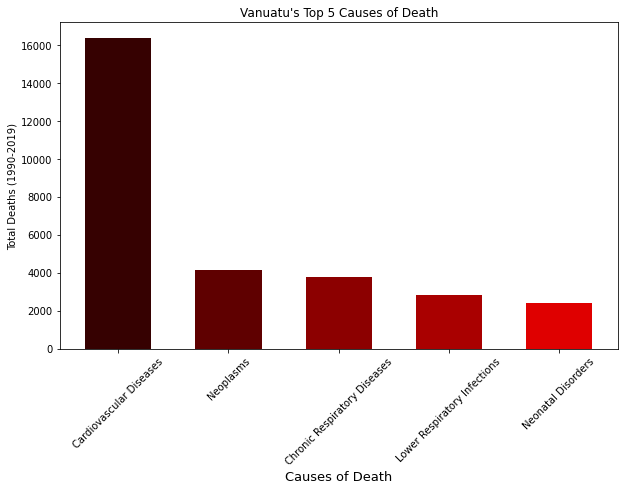

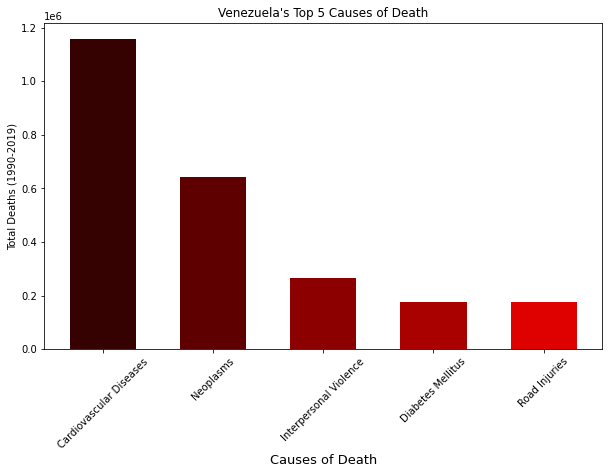

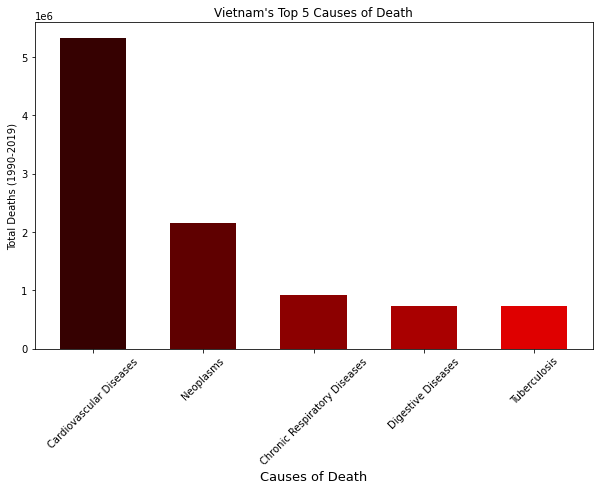

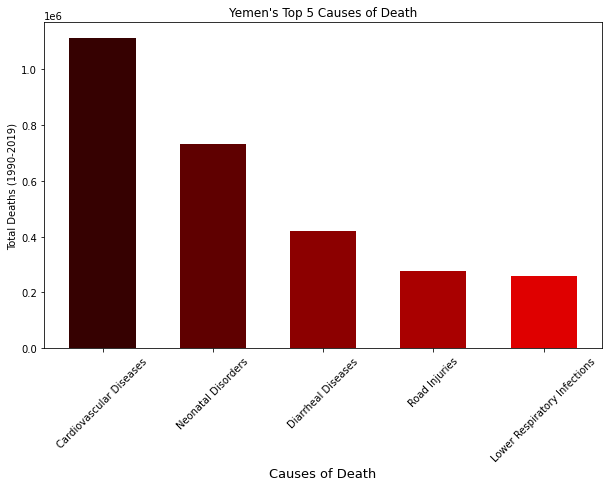

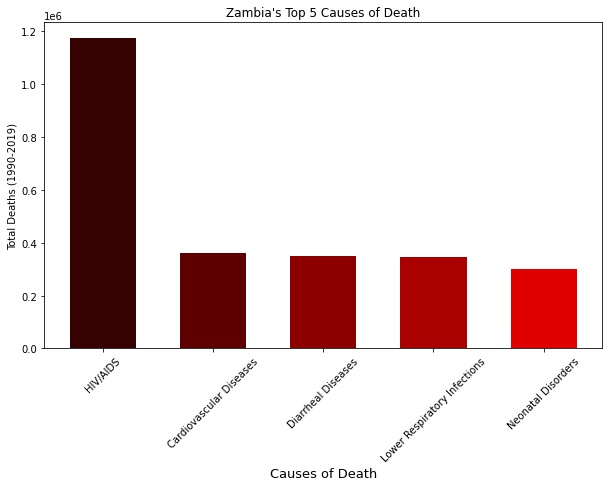

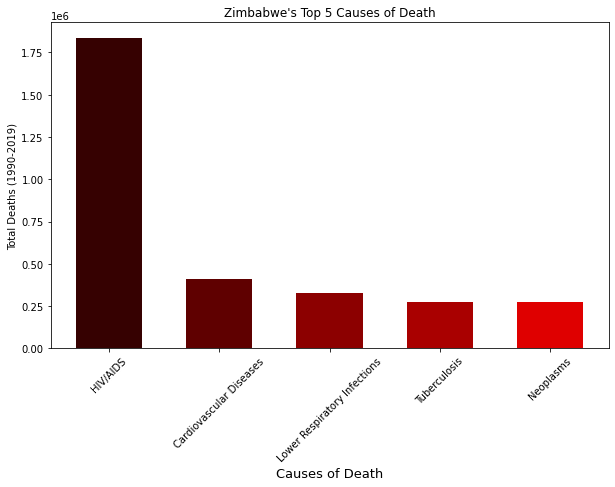

In [183]:
# for Country/Territory in the data set
for x in df2.index:
    # group all the rows by Country/Territory column and grab the 5 highest values
    data = df2.set_index('Country/Territory').iloc[x].nlargest(5)

    y = df2['Country/Territory'].iloc[x]

    # configurations for the bar graphs
    plt.figure(figsize=(10, 6))
    plt.bar(data = data, x = data.index, height = data.values, width=.6, color = ['#360101','#5f0000','#8c0000','#a90000','#df0000'])
    plt.xticks(rotation = 45)
    plt.xlabel('Causes of Death', size= 13)
    plt.ylabel('Total Deaths (1990-2019)')
    plt.title(y + "'s Top 5 Causes of Death")

I want to take a look at the total global deaths and which countries lead in total deaths.

Total Global Deaths from 1990-2019

In [219]:
total_deaths = df3['Total Deaths'].sum()

# total global deaths from 1990-2019: 1,468,134,716
total_deaths

1468134716

Let's make a new column called 'Total Deaths'.

In [198]:
df3 = df2.groupby('Country/Territory').sum().reset_index()

df3['Total Deaths'] = df3.sum(axis=1)

df3.head()

<ipython-input-198-68a6e4c81f52>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3['Total Deaths'] = df3.sum(axis=1)


Country/Territory  Meningitis  Dementias  Parkinson's Disease  \
0       Afghanistan       78666      41998                13397   
1           Albania        1323      16549                 4491   
2           Algeria       15685      86914                22943   
3    American Samoa          30        143                   69   
4           Andorra           0        614                  137   

   Nutritional Deficiencies  Malaria  Drowning  Interpersonal Violence  \
0                     71453    13924     56536                  108228   
1                       569        0      2397                    5242   
2                      7138       70     24273                   16702   
3                        60        0       120                     101   
4                         0        0         0                      15   

   Maternal Disorders  HIV/AIDS  ...  Chronic Kidney Disease  Poisonings  \
0              129621      4282  ...                  134676       14530   
1                 246        57  ...                    7636         500   
2               29475      6101  ...                  154666       12337   
3                  30        15  ...                     512           0   
4                   0        85  ...                     292           0   

   Protein-Energy Malnutrition  Road Injuries  Chronic Respiratory Diseases  \
0                        70163         208331                        209857   
1                          526           8522                         22632   
2                         6407         369395                        168453   
3                           60            164                           612   
4                            0            259                           838   

   Chronic Liver Diseases  Digestive Diseases  Fire, Heat, & Hot Substances  \
0                   98419              186959                         13559   
1                    8717               14907                           636   
2                   91927              146527                         27628   
3                     181                 341                             0   
4                     283                 560                             0   

   Acute Hepatitis  Total Deaths  
0            98108       5982631  
1               44        523545  
2            10492       4601205  
3                0          8619  
4               30         12532  

[5 rows x 33 columns]

Top 10 Countries with the most deaths from 1990-2019


In [218]:
country_total_deaths = df3[['Country/Territory', 'Total Deaths']].sort_values(by='Total Deaths', ascending=False).reset_index(drop=True)

top_10_country_deaths = country_total_deaths[:10]

top_10_country_deaths

Country/Territory  Total Deaths
0             China     265408106
1             India     238158165
2     United States      71197802
3            Russia      59591155
4         Indonesia      44046941
5           Nigeria      43670014
6          Pakistan      38151878
7            Brazil      32674112
8             Japan      31922807
9           Germany      25559667